In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Samplers':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Samplers')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_5210/585937172.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
# Import required packages
import torch
import numpy as np
import normflows as nf

from matplotlib import pyplot as plt

from tqdm import tqdm

In [3]:
# Set up model

# Define 2D Gaussian base distribution
base = nf.distributions.base.DiagGaussian(2)

# Define list of flows
num_layers = 32
flows = []
for i in range(num_layers):
    # Neural network with two hidden layers having 64 units each
    # Last layer is initialized by zeros making training more stable
    param_map = nf.nets.MLP([1, 64, 64, 2], init_zeros=True)
    # Add flow layer
    flows.append(nf.flows.AffineCouplingBlock(param_map))
    # Swap dimensions
    flows.append(nf.flows.Permute(2, mode='swap'))
    
# Construct flow model
model = nf.NormalizingFlow(base, flows)

In [4]:
# Move model on GPU if available
# enable_cuda = True
# device = torch.device('cuda' if torch.cuda.is_available() and enable_cuda else 'cpu')
device = torch.device("mps")
model = model.to(device)

/opt/homebrew/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


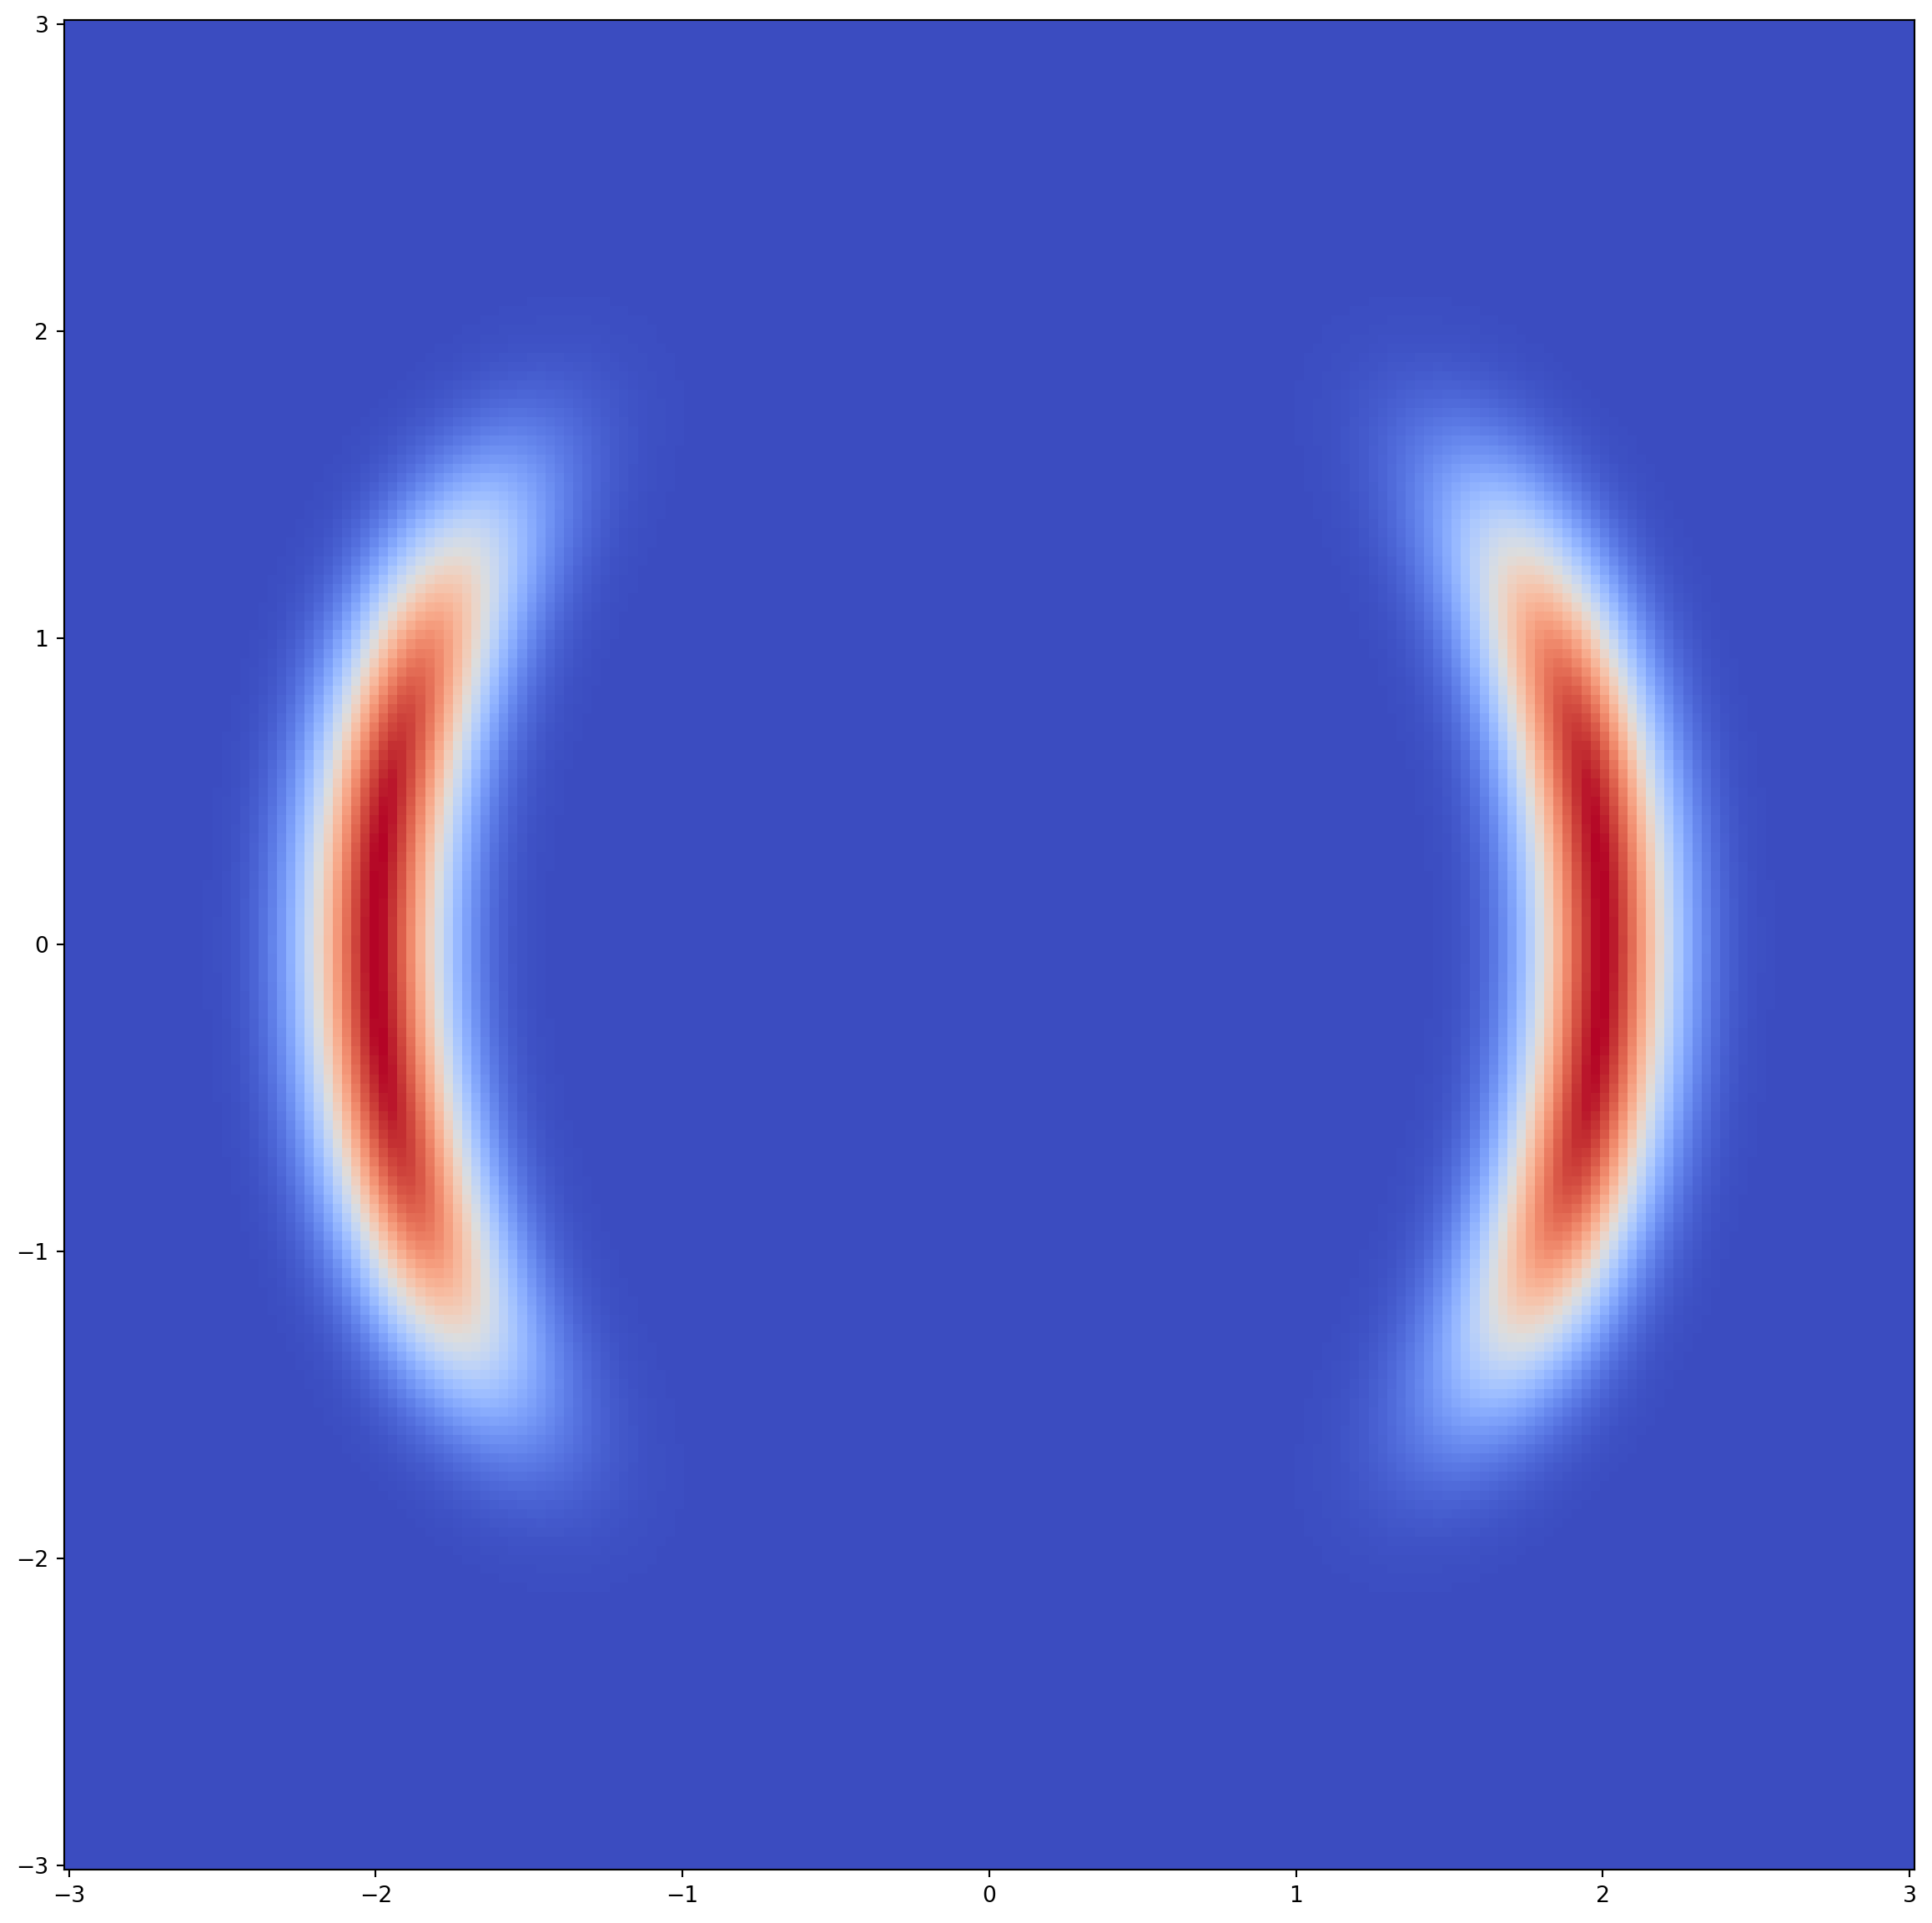

In [5]:
# Define target distribution
target = nf.distributions.TwoMoons()

# Plot target distribution
grid_size = 200
xx, yy = torch.meshgrid(torch.linspace(-3, 3, grid_size), torch.linspace(-3, 3, grid_size))
zz = torch.cat([xx.unsqueeze(2), yy.unsqueeze(2)], 2).view(-1, 2)
zz = zz.to(device)

log_prob = target.log_prob(zz).to('cpu').view(*xx.shape)
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
plt.gca().set_aspect('equal', 'box')
plt.show()

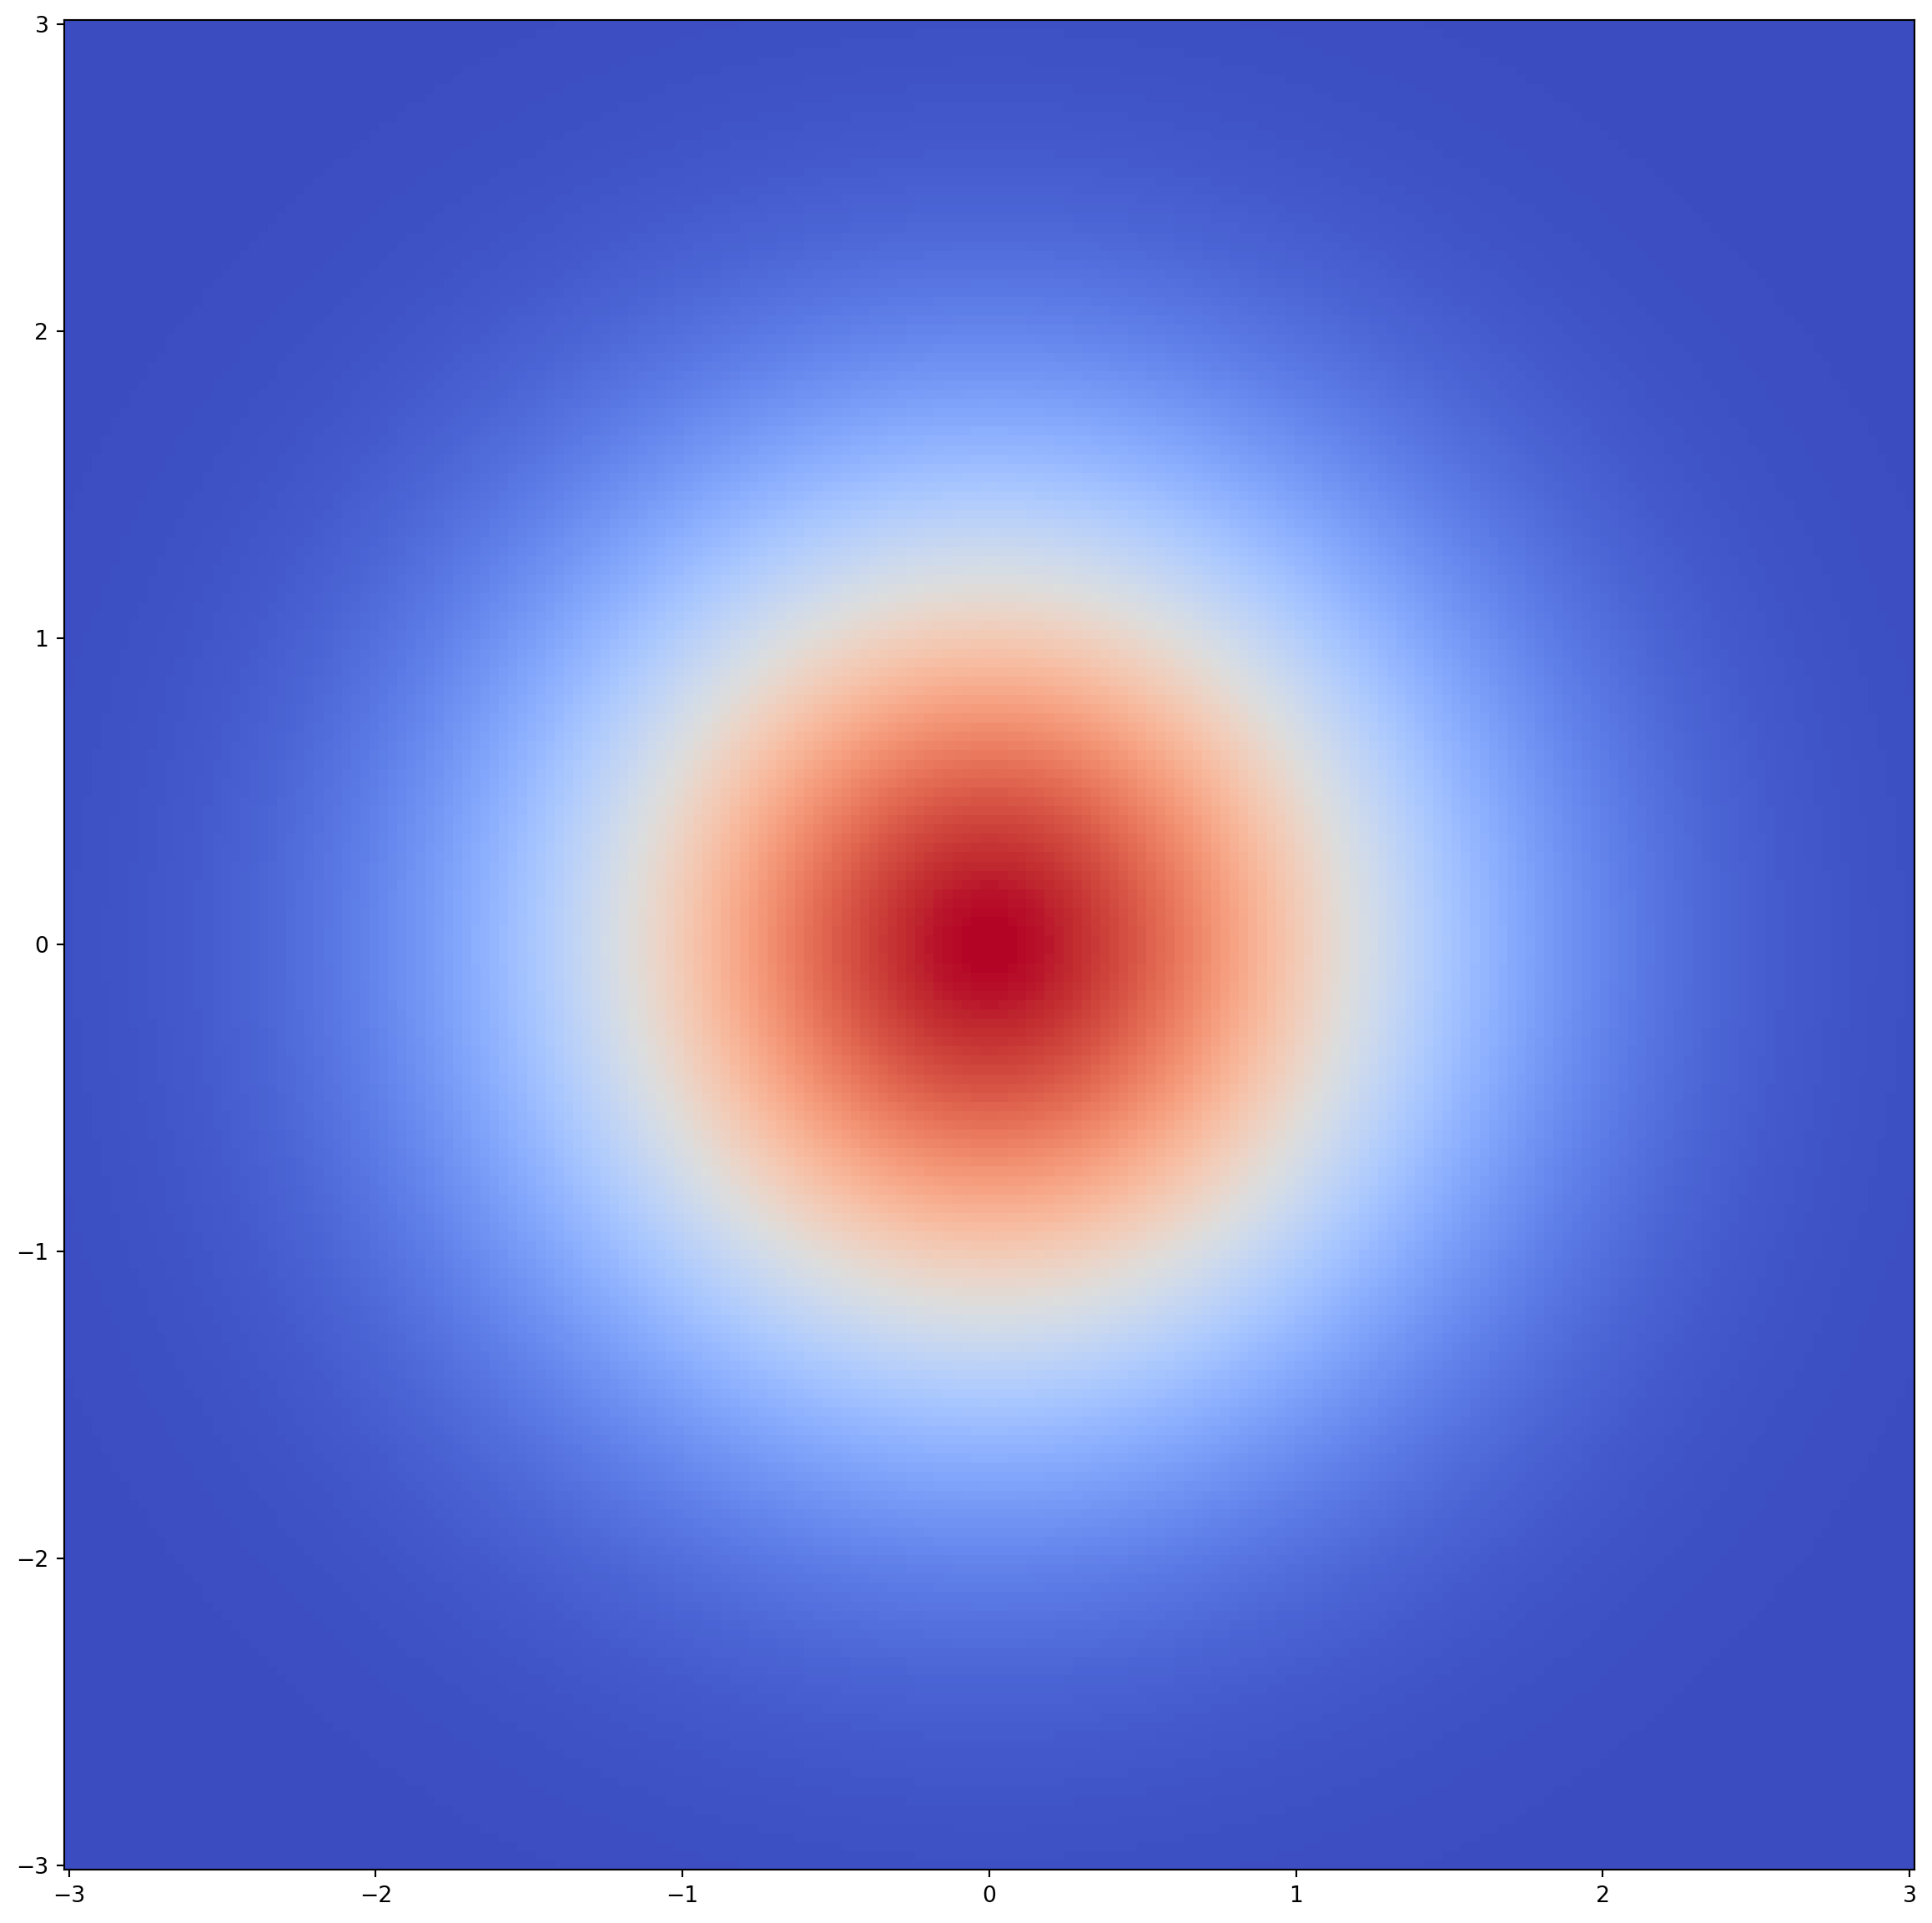

In [6]:
# Plot initial flow distribution
model.eval()
log_prob = model.log_prob(zz).to('cpu').view(*xx.shape)
model.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
plt.gca().set_aspect('equal', 'box')
plt.show()

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 1/4000 [00:00<22:21,  2.98it/s]

  0%|          | 3/4000 [00:00<09:54,  6.72it/s]

  0%|          | 4/4000 [00:00<10:26,  6.38it/s]

  0%|          | 6/4000 [00:00<07:54,  8.42it/s]

  0%|          | 8/4000 [00:00<06:41,  9.94it/s]

  0%|          | 10/4000 [00:01<06:04, 10.95it/s]

  0%|          | 12/4000 [00:01<05:40, 11.70it/s]

  0%|          | 14/4000 [00:01<05:25, 12.26it/s]

  0%|          | 16/4000 [00:01<05:16, 12.59it/s]

  0%|          | 18/4000 [00:01<05:09, 12.85it/s]

  0%|          | 20/4000 [00:01<05:07, 12.95it/s]

  1%|          | 22/4000 [00:02<05:04, 13.07it/s]

  1%|          | 24/4000 [00:02<05:03, 13.12it/s]

  1%|          | 26/4000 [00:02<05:01, 13.20it/s]

  1%|          | 28/4000 [00:02<04:59, 13.24it/s]

  1%|          | 30/4000 [00:02<04:57, 13.32it/s]

  1%|          | 32/4000 [00:02<04:56, 13.36it/s]

  1%|          | 34/4000 [00:02<04:56, 13.39it/s]

  1%|          | 36/4000 [00:03<04:55, 13.43it/s]

  1%|          | 38/4000 [00:03<04:54, 13.43it/s]

  1%|          | 40/4000 [00:03<04:53, 13.49it/s]

  1%|          | 42/4000 [00:03<04:53, 13.47it/s]

  1%|          | 44/4000 [00:03<04:53, 13.47it/s]

  1%|          | 46/4000 [00:03<04:54, 13.44it/s]

  1%|          | 48/4000 [00:03<04:54, 13.40it/s]

  1%|▏         | 50/4000 [00:04<04:54, 13.42it/s]

  1%|▏         | 52/4000 [00:04<04:55, 13.35it/s]

  1%|▏         | 54/4000 [00:04<04:54, 13.38it/s]

  1%|▏         | 56/4000 [00:04<04:57, 13.28it/s]

  1%|▏         | 58/4000 [00:04<04:57, 13.23it/s]

  2%|▏         | 60/4000 [00:04<04:55, 13.31it/s]

  2%|▏         | 62/4000 [00:05<04:55, 13.34it/s]

  2%|▏         | 64/4000 [00:05<04:54, 13.37it/s]

  2%|▏         | 66/4000 [00:05<04:55, 13.32it/s]

  2%|▏         | 68/4000 [00:05<04:55, 13.30it/s]

  2%|▏         | 70/4000 [00:05<04:55, 13.31it/s]

  2%|▏         | 72/4000 [00:05<04:53, 13.38it/s]

  2%|▏         | 74/4000 [00:05<04:55, 13.30it/s]

  2%|▏         | 76/4000 [00:06<04:54, 13.34it/s]

  2%|▏         | 78/4000 [00:06<04:52, 13.42it/s]

  2%|▏         | 80/4000 [00:06<04:50, 13.48it/s]

  2%|▏         | 82/4000 [00:06<04:51, 13.46it/s]

  2%|▏         | 84/4000 [00:06<04:50, 13.49it/s]

  2%|▏         | 86/4000 [00:06<04:49, 13.54it/s]

  2%|▏         | 88/4000 [00:07<05:35, 11.66it/s]

  2%|▏         | 90/4000 [00:07<05:36, 11.62it/s]

  2%|▏         | 92/4000 [00:07<05:29, 11.86it/s]

  2%|▏         | 94/4000 [00:07<05:21, 12.15it/s]

  2%|▏         | 96/4000 [00:07<05:19, 12.23it/s]

  2%|▏         | 98/4000 [00:07<05:17, 12.31it/s]

  2%|▎         | 100/4000 [00:07<05:10, 12.57it/s]

  3%|▎         | 102/4000 [00:08<05:05, 12.77it/s]

  3%|▎         | 104/4000 [00:08<05:01, 12.91it/s]

  3%|▎         | 106/4000 [00:08<04:59, 13.00it/s]

  3%|▎         | 108/4000 [00:08<04:58, 13.02it/s]

  3%|▎         | 110/4000 [00:08<04:55, 13.18it/s]

  3%|▎         | 112/4000 [00:08<04:54, 13.19it/s]

  3%|▎         | 114/4000 [00:09<04:58, 13.03it/s]

  3%|▎         | 116/4000 [00:09<05:02, 12.86it/s]

  3%|▎         | 118/4000 [00:09<05:00, 12.92it/s]

  3%|▎         | 120/4000 [00:09<04:58, 13.01it/s]

  3%|▎         | 122/4000 [00:09<05:00, 12.92it/s]

  3%|▎         | 124/4000 [00:09<04:58, 13.00it/s]

  3%|▎         | 126/4000 [00:09<04:55, 13.11it/s]

  3%|▎         | 128/4000 [00:10<04:53, 13.18it/s]

  3%|▎         | 130/4000 [00:10<04:53, 13.21it/s]

  3%|▎         | 132/4000 [00:10<04:51, 13.27it/s]

  3%|▎         | 134/4000 [00:10<04:53, 13.15it/s]

  3%|▎         | 136/4000 [00:10<06:14, 10.33it/s]

  3%|▎         | 138/4000 [00:11<05:50, 11.02it/s]

  4%|▎         | 140/4000 [00:11<05:33, 11.59it/s]

  4%|▎         | 142/4000 [00:11<05:19, 12.06it/s]

  4%|▎         | 144/4000 [00:11<05:11, 12.39it/s]

  4%|▎         | 146/4000 [00:11<05:06, 12.59it/s]

  4%|▎         | 148/4000 [00:11<05:01, 12.77it/s]

  4%|▍         | 150/4000 [00:11<04:59, 12.86it/s]

  4%|▍         | 152/4000 [00:12<04:56, 12.97it/s]

  4%|▍         | 154/4000 [00:12<04:55, 13.03it/s]

  4%|▍         | 156/4000 [00:12<04:54, 13.06it/s]

  4%|▍         | 158/4000 [00:12<04:58, 12.87it/s]

  4%|▍         | 160/4000 [00:12<04:59, 12.80it/s]

  4%|▍         | 162/4000 [00:12<04:59, 12.81it/s]

  4%|▍         | 164/4000 [00:13<04:56, 12.94it/s]

  4%|▍         | 166/4000 [00:13<04:53, 13.06it/s]

  4%|▍         | 168/4000 [00:13<04:57, 12.88it/s]

  4%|▍         | 170/4000 [00:13<04:59, 12.77it/s]

  4%|▍         | 172/4000 [00:13<05:00, 12.74it/s]

  4%|▍         | 174/4000 [00:13<04:58, 12.81it/s]

  4%|▍         | 176/4000 [00:13<04:56, 12.89it/s]

  4%|▍         | 178/4000 [00:14<04:55, 12.93it/s]

  4%|▍         | 180/4000 [00:14<04:53, 12.99it/s]

  5%|▍         | 182/4000 [00:14<04:51, 13.09it/s]

  5%|▍         | 184/4000 [00:14<04:49, 13.19it/s]

  5%|▍         | 186/4000 [00:14<04:48, 13.22it/s]

  5%|▍         | 188/4000 [00:14<04:48, 13.21it/s]

  5%|▍         | 190/4000 [00:15<04:46, 13.28it/s]

  5%|▍         | 192/4000 [00:15<04:46, 13.30it/s]

  5%|▍         | 194/4000 [00:15<04:48, 13.18it/s]

  5%|▍         | 196/4000 [00:15<04:50, 13.11it/s]

  5%|▍         | 198/4000 [00:15<04:53, 12.94it/s]

  5%|▌         | 200/4000 [00:15<05:40, 11.15it/s]

  5%|▌         | 202/4000 [00:16<05:26, 11.65it/s]

  5%|▌         | 204/4000 [00:16<05:13, 12.09it/s]

  5%|▌         | 206/4000 [00:16<05:04, 12.47it/s]

  5%|▌         | 208/4000 [00:16<04:56, 12.77it/s]

  5%|▌         | 210/4000 [00:16<04:52, 12.96it/s]

  5%|▌         | 212/4000 [00:16<04:54, 12.85it/s]

  5%|▌         | 214/4000 [00:16<04:57, 12.72it/s]

  5%|▌         | 216/4000 [00:17<04:55, 12.79it/s]

  5%|▌         | 218/4000 [00:17<04:51, 12.98it/s]

  6%|▌         | 220/4000 [00:17<04:47, 13.13it/s]

  6%|▌         | 222/4000 [00:17<04:47, 13.14it/s]

  6%|▌         | 224/4000 [00:17<04:46, 13.20it/s]

  6%|▌         | 226/4000 [00:17<04:43, 13.29it/s]

  6%|▌         | 228/4000 [00:17<04:42, 13.36it/s]

  6%|▌         | 230/4000 [00:18<04:43, 13.29it/s]

  6%|▌         | 232/4000 [00:18<04:41, 13.38it/s]

  6%|▌         | 234/4000 [00:18<04:41, 13.39it/s]

  6%|▌         | 236/4000 [00:18<04:39, 13.45it/s]

  6%|▌         | 238/4000 [00:18<04:38, 13.49it/s]

  6%|▌         | 240/4000 [00:18<04:37, 13.53it/s]

  6%|▌         | 242/4000 [00:19<04:37, 13.53it/s]

  6%|▌         | 244/4000 [00:19<04:37, 13.54it/s]

  6%|▌         | 246/4000 [00:19<04:38, 13.49it/s]

  6%|▌         | 248/4000 [00:19<04:37, 13.53it/s]

  6%|▋         | 250/4000 [00:19<04:37, 13.50it/s]

  6%|▋         | 252/4000 [00:19<04:37, 13.52it/s]

  6%|▋         | 254/4000 [00:19<04:39, 13.39it/s]

  6%|▋         | 256/4000 [00:20<04:41, 13.30it/s]

  6%|▋         | 258/4000 [00:20<04:41, 13.28it/s]

  6%|▋         | 260/4000 [00:20<04:50, 12.85it/s]

  7%|▋         | 262/4000 [00:20<04:51, 12.83it/s]

  7%|▋         | 264/4000 [00:20<04:46, 13.03it/s]

  7%|▋         | 266/4000 [00:20<04:44, 13.11it/s]

  7%|▋         | 268/4000 [00:20<04:45, 13.06it/s]

  7%|▋         | 270/4000 [00:21<04:43, 13.15it/s]

  7%|▋         | 272/4000 [00:21<04:42, 13.19it/s]

  7%|▋         | 274/4000 [00:21<04:40, 13.27it/s]

  7%|▋         | 276/4000 [00:21<04:38, 13.36it/s]

  7%|▋         | 278/4000 [00:21<04:37, 13.41it/s]

  7%|▋         | 280/4000 [00:21<04:36, 13.47it/s]

  7%|▋         | 282/4000 [00:22<04:35, 13.49it/s]

  7%|▋         | 284/4000 [00:22<04:37, 13.41it/s]

  7%|▋         | 286/4000 [00:22<04:37, 13.37it/s]

  7%|▋         | 288/4000 [00:22<04:37, 13.37it/s]

  7%|▋         | 290/4000 [00:22<04:38, 13.31it/s]

  7%|▋         | 292/4000 [00:22<04:36, 13.40it/s]

  7%|▋         | 294/4000 [00:22<04:35, 13.43it/s]

  7%|▋         | 296/4000 [00:23<04:36, 13.40it/s]

  7%|▋         | 298/4000 [00:23<04:38, 13.28it/s]

  8%|▊         | 300/4000 [00:23<04:38, 13.26it/s]

  8%|▊         | 302/4000 [00:23<04:38, 13.29it/s]

  8%|▊         | 304/4000 [00:23<04:36, 13.37it/s]

  8%|▊         | 306/4000 [00:23<04:34, 13.44it/s]

  8%|▊         | 308/4000 [00:23<04:35, 13.41it/s]

  8%|▊         | 310/4000 [00:24<04:34, 13.46it/s]

  8%|▊         | 312/4000 [00:24<04:33, 13.48it/s]

  8%|▊         | 314/4000 [00:24<04:32, 13.50it/s]

  8%|▊         | 316/4000 [00:24<04:32, 13.51it/s]

  8%|▊         | 318/4000 [00:24<04:31, 13.57it/s]

  8%|▊         | 320/4000 [00:24<04:30, 13.59it/s]

  8%|▊         | 322/4000 [00:25<04:30, 13.58it/s]

  8%|▊         | 324/4000 [00:25<04:30, 13.58it/s]

  8%|▊         | 326/4000 [00:25<04:32, 13.49it/s]

  8%|▊         | 328/4000 [00:25<04:34, 13.39it/s]

  8%|▊         | 330/4000 [00:25<04:33, 13.43it/s]

  8%|▊         | 332/4000 [00:25<04:32, 13.47it/s]

  8%|▊         | 334/4000 [00:25<04:30, 13.53it/s]

  8%|▊         | 336/4000 [00:26<04:31, 13.52it/s]

  8%|▊         | 338/4000 [00:26<04:30, 13.54it/s]

  8%|▊         | 340/4000 [00:26<04:29, 13.56it/s]

  9%|▊         | 342/4000 [00:26<04:30, 13.54it/s]

  9%|▊         | 344/4000 [00:26<04:29, 13.55it/s]

  9%|▊         | 346/4000 [00:26<04:29, 13.58it/s]

  9%|▊         | 348/4000 [00:26<04:30, 13.51it/s]

  9%|▉         | 350/4000 [00:27<04:32, 13.38it/s]

  9%|▉         | 352/4000 [00:27<04:32, 13.40it/s]

  9%|▉         | 354/4000 [00:27<04:33, 13.35it/s]

  9%|▉         | 356/4000 [00:27<04:35, 13.25it/s]

  9%|▉         | 358/4000 [00:27<04:33, 13.31it/s]

  9%|▉         | 360/4000 [00:27<04:32, 13.36it/s]

  9%|▉         | 362/4000 [00:27<04:30, 13.43it/s]

  9%|▉         | 364/4000 [00:28<04:30, 13.47it/s]

  9%|▉         | 366/4000 [00:28<04:28, 13.52it/s]

  9%|▉         | 368/4000 [00:28<04:28, 13.53it/s]

  9%|▉         | 370/4000 [00:28<04:28, 13.53it/s]

  9%|▉         | 372/4000 [00:28<04:28, 13.52it/s]

  9%|▉         | 374/4000 [00:28<04:27, 13.54it/s]

  9%|▉         | 376/4000 [00:29<04:26, 13.59it/s]

  9%|▉         | 378/4000 [00:29<04:27, 13.54it/s]

 10%|▉         | 380/4000 [00:29<04:28, 13.51it/s]

 10%|▉         | 382/4000 [00:29<04:29, 13.42it/s]

 10%|▉         | 384/4000 [00:29<04:29, 13.42it/s]

 10%|▉         | 386/4000 [00:29<04:27, 13.49it/s]

 10%|▉         | 388/4000 [00:29<04:27, 13.53it/s]

 10%|▉         | 390/4000 [00:30<04:27, 13.49it/s]

 10%|▉         | 392/4000 [00:30<04:26, 13.51it/s]

 10%|▉         | 394/4000 [00:30<04:27, 13.46it/s]

 10%|▉         | 396/4000 [00:30<04:26, 13.51it/s]

 10%|▉         | 398/4000 [00:30<04:26, 13.54it/s]

 10%|█         | 400/4000 [00:30<04:25, 13.58it/s]

 10%|█         | 402/4000 [00:30<04:24, 13.59it/s]

 10%|█         | 404/4000 [00:31<04:25, 13.55it/s]

 10%|█         | 406/4000 [00:31<04:25, 13.55it/s]

 10%|█         | 408/4000 [00:31<04:24, 13.57it/s]

 10%|█         | 410/4000 [00:31<04:24, 13.56it/s]

 10%|█         | 412/4000 [00:31<04:23, 13.60it/s]

 10%|█         | 414/4000 [00:31<04:23, 13.58it/s]

 10%|█         | 416/4000 [00:31<04:24, 13.55it/s]

 10%|█         | 418/4000 [00:32<04:24, 13.54it/s]

 10%|█         | 420/4000 [00:32<04:25, 13.48it/s]

 11%|█         | 422/4000 [00:32<04:27, 13.37it/s]

 11%|█         | 424/4000 [00:32<04:27, 13.38it/s]

 11%|█         | 426/4000 [00:32<04:26, 13.40it/s]

 11%|█         | 428/4000 [00:32<04:26, 13.41it/s]

 11%|█         | 430/4000 [00:33<04:25, 13.44it/s]

 11%|█         | 432/4000 [00:33<04:24, 13.49it/s]

 11%|█         | 434/4000 [00:33<04:23, 13.54it/s]

 11%|█         | 436/4000 [00:33<04:22, 13.59it/s]

 11%|█         | 438/4000 [00:33<04:22, 13.58it/s]

 11%|█         | 440/4000 [00:33<04:22, 13.56it/s]

 11%|█         | 442/4000 [00:33<04:22, 13.57it/s]

 11%|█         | 444/4000 [00:34<04:22, 13.56it/s]

 11%|█         | 446/4000 [00:34<04:23, 13.50it/s]

 11%|█         | 448/4000 [00:34<04:22, 13.51it/s]

 11%|█▏        | 450/4000 [00:34<04:22, 13.51it/s]

 11%|█▏        | 452/4000 [00:34<04:21, 13.55it/s]

 11%|█▏        | 454/4000 [00:34<04:21, 13.54it/s]

 11%|█▏        | 456/4000 [00:34<04:21, 13.57it/s]

 11%|█▏        | 458/4000 [00:35<04:22, 13.51it/s]

 12%|█▏        | 460/4000 [00:35<04:23, 13.45it/s]

 12%|█▏        | 462/4000 [00:35<04:21, 13.54it/s]

 12%|█▏        | 464/4000 [00:35<04:20, 13.56it/s]

 12%|█▏        | 466/4000 [00:35<04:22, 13.47it/s]

 12%|█▏        | 468/4000 [00:35<04:23, 13.42it/s]

 12%|█▏        | 470/4000 [00:35<04:21, 13.50it/s]

 12%|█▏        | 472/4000 [00:36<04:20, 13.54it/s]

 12%|█▏        | 474/4000 [00:36<04:19, 13.58it/s]

 12%|█▏        | 476/4000 [00:36<04:19, 13.60it/s]

 12%|█▏        | 478/4000 [00:36<04:19, 13.59it/s]

 12%|█▏        | 480/4000 [00:36<04:19, 13.57it/s]

 12%|█▏        | 482/4000 [00:36<04:19, 13.53it/s]

 12%|█▏        | 484/4000 [00:37<04:19, 13.54it/s]

 12%|█▏        | 486/4000 [00:37<04:19, 13.56it/s]

 12%|█▏        | 488/4000 [00:37<04:18, 13.59it/s]

 12%|█▏        | 490/4000 [00:37<04:18, 13.55it/s]

 12%|█▏        | 492/4000 [00:37<04:18, 13.55it/s]

 12%|█▏        | 494/4000 [00:37<04:18, 13.57it/s]

 12%|█▏        | 496/4000 [00:37<04:18, 13.55it/s]

 12%|█▏        | 498/4000 [00:38<04:19, 13.51it/s]

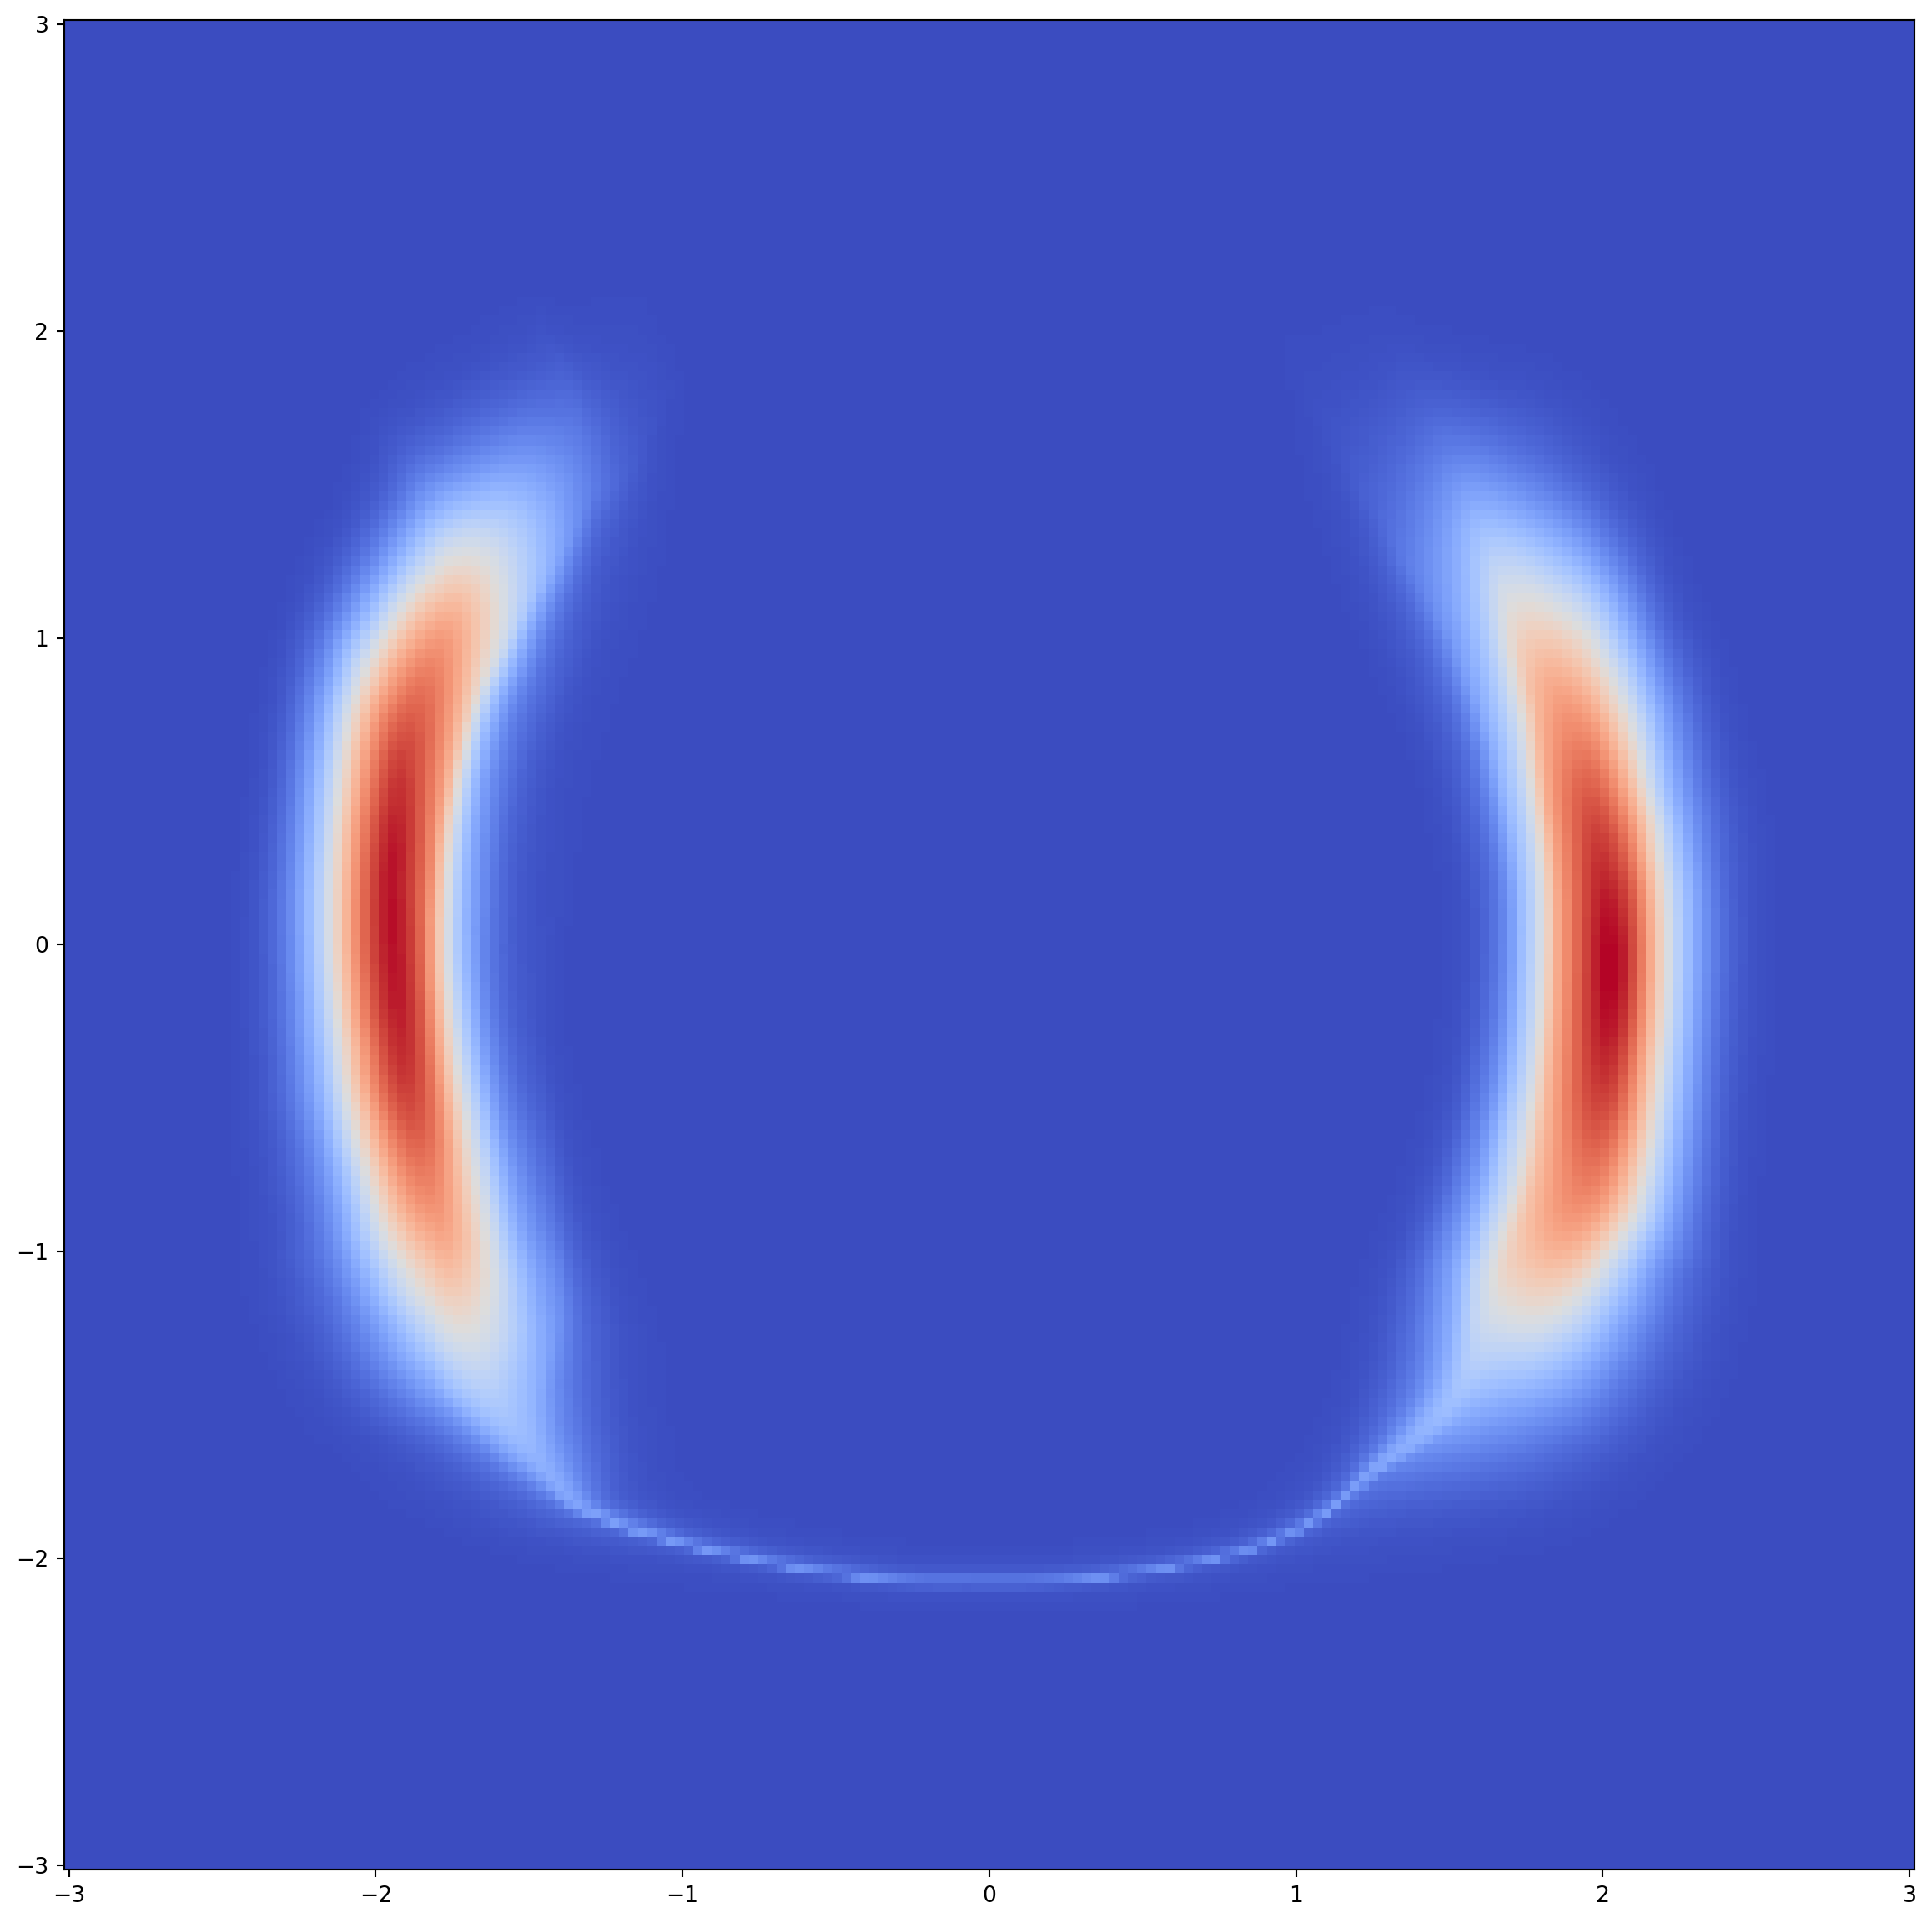

 12%|█▎        | 500/4000 [00:38<10:09,  5.75it/s]

 13%|█▎        | 502/4000 [00:39<08:35,  6.78it/s]

 13%|█▎        | 504/4000 [00:39<07:18,  7.98it/s]

 13%|█▎        | 506/4000 [00:39<06:23,  9.12it/s]

 13%|█▎        | 508/4000 [00:39<05:44, 10.13it/s]

 13%|█▎        | 510/4000 [00:39<05:18, 10.97it/s]

 13%|█▎        | 512/4000 [00:39<05:00, 11.62it/s]

 13%|█▎        | 514/4000 [00:39<04:47, 12.14it/s]

 13%|█▎        | 516/4000 [00:40<04:37, 12.55it/s]

 13%|█▎        | 518/4000 [00:40<04:31, 12.83it/s]

 13%|█▎        | 520/4000 [00:40<04:26, 13.07it/s]

 13%|█▎        | 522/4000 [00:40<04:23, 13.22it/s]

 13%|█▎        | 524/4000 [00:40<04:20, 13.35it/s]

 13%|█▎        | 526/4000 [00:40<04:19, 13.41it/s]

 13%|█▎        | 528/4000 [00:40<04:17, 13.47it/s]

 13%|█▎        | 530/4000 [00:41<04:16, 13.52it/s]

 13%|█▎        | 532/4000 [00:41<04:17, 13.48it/s]

 13%|█▎        | 534/4000 [00:41<04:16, 13.51it/s]

 13%|█▎        | 536/4000 [00:41<04:16, 13.52it/s]

 13%|█▎        | 538/4000 [00:41<04:15, 13.52it/s]

 14%|█▎        | 540/4000 [00:41<04:15, 13.56it/s]

 14%|█▎        | 542/4000 [00:41<04:16, 13.49it/s]

 14%|█▎        | 544/4000 [00:42<04:15, 13.51it/s]

 14%|█▎        | 546/4000 [00:42<04:15, 13.52it/s]

 14%|█▎        | 548/4000 [00:42<04:14, 13.54it/s]

 14%|█▍        | 550/4000 [00:42<04:16, 13.45it/s]

 14%|█▍        | 552/4000 [00:42<04:17, 13.38it/s]

 14%|█▍        | 554/4000 [00:42<04:16, 13.43it/s]

 14%|█▍        | 556/4000 [00:43<04:16, 13.42it/s]

 14%|█▍        | 558/4000 [00:43<04:15, 13.46it/s]

 14%|█▍        | 560/4000 [00:43<04:15, 13.47it/s]

 14%|█▍        | 562/4000 [00:43<04:16, 13.40it/s]

 14%|█▍        | 564/4000 [00:43<04:17, 13.37it/s]

 14%|█▍        | 566/4000 [00:43<04:16, 13.39it/s]

 14%|█▍        | 568/4000 [00:43<04:15, 13.41it/s]

 14%|█▍        | 570/4000 [00:44<04:14, 13.47it/s]

 14%|█▍        | 572/4000 [00:44<04:13, 13.50it/s]

 14%|█▍        | 574/4000 [00:44<04:15, 13.43it/s]

 14%|█▍        | 576/4000 [00:44<04:15, 13.42it/s]

 14%|█▍        | 578/4000 [00:44<04:14, 13.43it/s]

 14%|█▍        | 580/4000 [00:44<04:14, 13.44it/s]

 15%|█▍        | 582/4000 [00:44<04:18, 13.21it/s]

 15%|█▍        | 584/4000 [00:45<04:19, 13.16it/s]

 15%|█▍        | 586/4000 [00:45<04:20, 13.11it/s]

 15%|█▍        | 588/4000 [00:45<04:20, 13.09it/s]

 15%|█▍        | 590/4000 [00:45<04:20, 13.11it/s]

 15%|█▍        | 592/4000 [00:45<04:18, 13.16it/s]

 15%|█▍        | 594/4000 [00:45<04:18, 13.19it/s]

 15%|█▍        | 596/4000 [00:46<04:16, 13.25it/s]

 15%|█▍        | 598/4000 [00:46<04:19, 13.09it/s]

 15%|█▌        | 600/4000 [00:46<04:22, 12.95it/s]

 15%|█▌        | 602/4000 [00:46<04:22, 12.94it/s]

 15%|█▌        | 604/4000 [00:46<04:19, 13.08it/s]

 15%|█▌        | 606/4000 [00:46<04:21, 12.98it/s]

 15%|█▌        | 608/4000 [00:46<04:22, 12.94it/s]

 15%|█▌        | 610/4000 [00:47<04:30, 12.51it/s]

 15%|█▌        | 612/4000 [00:47<04:27, 12.66it/s]

 15%|█▌        | 614/4000 [00:47<04:24, 12.80it/s]

 15%|█▌        | 616/4000 [00:47<04:22, 12.90it/s]

 15%|█▌        | 618/4000 [00:47<04:22, 12.89it/s]

 16%|█▌        | 620/4000 [00:47<04:28, 12.59it/s]

 16%|█▌        | 622/4000 [00:48<04:25, 12.71it/s]

 16%|█▌        | 624/4000 [00:48<04:25, 12.72it/s]

 16%|█▌        | 626/4000 [00:48<04:22, 12.87it/s]

 16%|█▌        | 628/4000 [00:48<04:22, 12.83it/s]

 16%|█▌        | 630/4000 [00:48<04:20, 12.92it/s]

 16%|█▌        | 632/4000 [00:48<04:17, 13.06it/s]

 16%|█▌        | 634/4000 [00:48<04:19, 12.97it/s]

 16%|█▌        | 636/4000 [00:49<04:18, 13.03it/s]

 16%|█▌        | 638/4000 [00:49<04:15, 13.16it/s]

 16%|█▌        | 640/4000 [00:49<04:13, 13.27it/s]

 16%|█▌        | 642/4000 [00:49<04:11, 13.35it/s]

 16%|█▌        | 644/4000 [00:49<04:11, 13.37it/s]

 16%|█▌        | 646/4000 [00:49<04:10, 13.41it/s]

 16%|█▌        | 648/4000 [00:50<04:11, 13.35it/s]

 16%|█▋        | 650/4000 [00:50<04:10, 13.36it/s]

 16%|█▋        | 652/4000 [00:50<04:11, 13.31it/s]

 16%|█▋        | 654/4000 [00:50<04:11, 13.32it/s]

 16%|█▋        | 656/4000 [00:50<04:10, 13.34it/s]

 16%|█▋        | 658/4000 [00:50<04:11, 13.31it/s]

 16%|█▋        | 660/4000 [00:50<04:11, 13.29it/s]

 17%|█▋        | 662/4000 [00:51<04:11, 13.28it/s]

 17%|█▋        | 664/4000 [00:51<04:12, 13.22it/s]

 17%|█▋        | 666/4000 [00:51<04:12, 13.23it/s]

 17%|█▋        | 668/4000 [00:51<04:22, 12.67it/s]

 17%|█▋        | 670/4000 [00:51<04:19, 12.85it/s]

 17%|█▋        | 672/4000 [00:51<04:16, 12.97it/s]

 17%|█▋        | 674/4000 [00:52<04:15, 13.04it/s]

 17%|█▋        | 676/4000 [00:52<04:13, 13.10it/s]

 17%|█▋        | 678/4000 [00:52<04:13, 13.12it/s]

 17%|█▋        | 680/4000 [00:52<04:11, 13.22it/s]

 17%|█▋        | 682/4000 [00:52<04:09, 13.31it/s]

 17%|█▋        | 684/4000 [00:52<04:11, 13.21it/s]

 17%|█▋        | 686/4000 [00:52<04:14, 13.01it/s]

 17%|█▋        | 688/4000 [00:53<04:17, 12.86it/s]

 17%|█▋        | 690/4000 [00:53<04:18, 12.82it/s]

 17%|█▋        | 692/4000 [00:53<04:17, 12.84it/s]

 17%|█▋        | 694/4000 [00:53<04:14, 13.00it/s]

 17%|█▋        | 696/4000 [00:53<04:12, 13.10it/s]

 17%|█▋        | 698/4000 [00:53<04:12, 13.06it/s]

 18%|█▊        | 700/4000 [00:54<04:12, 13.05it/s]

 18%|█▊        | 702/4000 [00:54<04:11, 13.14it/s]

 18%|█▊        | 704/4000 [00:54<04:10, 13.15it/s]

 18%|█▊        | 706/4000 [00:54<04:10, 13.15it/s]

 18%|█▊        | 708/4000 [00:54<04:10, 13.15it/s]

 18%|█▊        | 710/4000 [00:54<04:09, 13.18it/s]

 18%|█▊        | 712/4000 [00:54<04:08, 13.23it/s]

 18%|█▊        | 714/4000 [00:55<04:08, 13.21it/s]

 18%|█▊        | 716/4000 [00:55<04:07, 13.28it/s]

 18%|█▊        | 718/4000 [00:55<04:05, 13.35it/s]

 18%|█▊        | 720/4000 [00:55<04:54, 11.16it/s]

 18%|█▊        | 722/4000 [00:55<04:42, 11.62it/s]

 18%|█▊        | 724/4000 [00:55<04:33, 11.99it/s]

 18%|█▊        | 726/4000 [00:56<04:25, 12.34it/s]

 18%|█▊        | 728/4000 [00:56<04:18, 12.64it/s]

 18%|█▊        | 730/4000 [00:56<04:13, 12.88it/s]

 18%|█▊        | 732/4000 [00:56<04:11, 13.00it/s]

 18%|█▊        | 734/4000 [00:56<04:08, 13.16it/s]

 18%|█▊        | 736/4000 [00:56<04:10, 13.02it/s]

 18%|█▊        | 738/4000 [00:56<04:11, 12.97it/s]

 18%|█▊        | 740/4000 [00:57<04:12, 12.93it/s]

 19%|█▊        | 742/4000 [00:57<04:11, 12.97it/s]

 19%|█▊        | 744/4000 [00:57<04:10, 13.02it/s]

 19%|█▊        | 746/4000 [00:57<04:09, 13.05it/s]

 19%|█▊        | 748/4000 [00:57<04:08, 13.06it/s]

 19%|█▉        | 750/4000 [00:57<04:07, 13.12it/s]

 19%|█▉        | 752/4000 [00:58<04:07, 13.11it/s]

 19%|█▉        | 754/4000 [00:58<04:09, 13.02it/s]

 19%|█▉        | 756/4000 [00:58<04:09, 13.03it/s]

 19%|█▉        | 758/4000 [00:58<04:09, 13.00it/s]

 19%|█▉        | 760/4000 [00:58<04:12, 12.83it/s]

 19%|█▉        | 762/4000 [00:58<04:12, 12.82it/s]

 19%|█▉        | 764/4000 [00:58<04:09, 12.96it/s]

 19%|█▉        | 766/4000 [00:59<04:06, 13.09it/s]

 19%|█▉        | 768/4000 [00:59<04:07, 13.08it/s]

 19%|█▉        | 770/4000 [00:59<04:06, 13.09it/s]

 19%|█▉        | 772/4000 [00:59<04:07, 13.06it/s]

 19%|█▉        | 774/4000 [00:59<04:08, 12.98it/s]

 19%|█▉        | 776/4000 [00:59<04:08, 12.96it/s]

 19%|█▉        | 778/4000 [01:00<04:08, 12.98it/s]

 20%|█▉        | 780/4000 [01:00<04:44, 11.32it/s]

 20%|█▉        | 782/4000 [01:00<04:35, 11.69it/s]

 20%|█▉        | 784/4000 [01:00<04:26, 12.08it/s]

 20%|█▉        | 786/4000 [01:00<04:19, 12.39it/s]

 20%|█▉        | 788/4000 [01:00<04:15, 12.60it/s]

 20%|█▉        | 790/4000 [01:01<04:10, 12.83it/s]

 20%|█▉        | 792/4000 [01:01<04:07, 12.96it/s]

 20%|█▉        | 794/4000 [01:01<04:04, 13.10it/s]

 20%|█▉        | 796/4000 [01:01<04:03, 13.18it/s]

 20%|█▉        | 798/4000 [01:01<04:01, 13.28it/s]

 20%|██        | 800/4000 [01:01<04:00, 13.31it/s]

 20%|██        | 802/4000 [01:01<04:00, 13.32it/s]

 20%|██        | 804/4000 [01:02<03:59, 13.32it/s]

 20%|██        | 806/4000 [01:02<04:00, 13.29it/s]

 20%|██        | 808/4000 [01:02<04:04, 13.08it/s]

 20%|██        | 810/4000 [01:02<04:03, 13.13it/s]

 20%|██        | 812/4000 [01:02<04:00, 13.24it/s]

 20%|██        | 814/4000 [01:02<04:00, 13.24it/s]

 20%|██        | 816/4000 [01:03<04:02, 13.14it/s]

 20%|██        | 818/4000 [01:03<04:04, 13.01it/s]

 20%|██        | 820/4000 [01:03<04:04, 13.02it/s]

 21%|██        | 822/4000 [01:03<04:05, 12.96it/s]

 21%|██        | 824/4000 [01:03<04:04, 13.00it/s]

 21%|██        | 826/4000 [01:03<04:08, 12.79it/s]

 21%|██        | 828/4000 [01:03<04:08, 12.74it/s]

 21%|██        | 830/4000 [01:04<04:07, 12.83it/s]

 21%|██        | 832/4000 [01:04<04:04, 12.97it/s]

 21%|██        | 834/4000 [01:04<04:01, 13.09it/s]

 21%|██        | 836/4000 [01:04<04:01, 13.12it/s]

 21%|██        | 838/4000 [01:04<04:02, 13.02it/s]

 21%|██        | 840/4000 [01:04<04:05, 12.89it/s]

 21%|██        | 842/4000 [01:05<04:03, 12.96it/s]

 21%|██        | 844/4000 [01:05<04:01, 13.10it/s]

 21%|██        | 846/4000 [01:05<03:58, 13.20it/s]

 21%|██        | 848/4000 [01:05<03:57, 13.27it/s]

 21%|██▏       | 850/4000 [01:05<03:56, 13.31it/s]

 21%|██▏       | 852/4000 [01:05<03:55, 13.38it/s]

 21%|██▏       | 854/4000 [01:05<03:57, 13.23it/s]

 21%|██▏       | 856/4000 [01:06<03:58, 13.18it/s]

 21%|██▏       | 858/4000 [01:06<03:56, 13.27it/s]

 22%|██▏       | 860/4000 [01:06<03:57, 13.22it/s]

 22%|██▏       | 862/4000 [01:06<03:59, 13.09it/s]

 22%|██▏       | 864/4000 [01:06<03:58, 13.16it/s]

 22%|██▏       | 866/4000 [01:06<03:59, 13.09it/s]

 22%|██▏       | 868/4000 [01:06<04:00, 13.00it/s]

 22%|██▏       | 870/4000 [01:07<03:59, 13.09it/s]

 22%|██▏       | 872/4000 [01:07<03:58, 13.13it/s]

 22%|██▏       | 874/4000 [01:07<03:57, 13.17it/s]

 22%|██▏       | 876/4000 [01:07<03:57, 13.15it/s]

 22%|██▏       | 878/4000 [01:07<03:57, 13.14it/s]

 22%|██▏       | 880/4000 [01:07<03:58, 13.09it/s]

 22%|██▏       | 882/4000 [01:08<03:56, 13.18it/s]

 22%|██▏       | 884/4000 [01:08<03:54, 13.27it/s]

 22%|██▏       | 886/4000 [01:08<03:53, 13.32it/s]

 22%|██▏       | 888/4000 [01:08<03:55, 13.20it/s]

 22%|██▏       | 890/4000 [01:08<03:55, 13.21it/s]

 22%|██▏       | 892/4000 [01:08<03:54, 13.24it/s]

 22%|██▏       | 894/4000 [01:08<03:53, 13.30it/s]

 22%|██▏       | 896/4000 [01:09<03:53, 13.31it/s]

 22%|██▏       | 898/4000 [01:09<03:52, 13.36it/s]

 22%|██▎       | 900/4000 [01:09<03:53, 13.30it/s]

 23%|██▎       | 902/4000 [01:09<03:53, 13.29it/s]

 23%|██▎       | 904/4000 [01:09<03:52, 13.34it/s]

 23%|██▎       | 906/4000 [01:09<03:51, 13.39it/s]

 23%|██▎       | 908/4000 [01:10<03:51, 13.36it/s]

 23%|██▎       | 910/4000 [01:10<03:50, 13.39it/s]

 23%|██▎       | 912/4000 [01:10<03:51, 13.35it/s]

 23%|██▎       | 914/4000 [01:10<03:53, 13.19it/s]

 23%|██▎       | 916/4000 [01:10<03:55, 13.08it/s]

 23%|██▎       | 918/4000 [01:10<03:56, 13.05it/s]

 23%|██▎       | 920/4000 [01:10<03:57, 12.99it/s]

 23%|██▎       | 922/4000 [01:11<03:56, 13.02it/s]

 23%|██▎       | 924/4000 [01:11<03:55, 13.08it/s]

 23%|██▎       | 926/4000 [01:11<03:53, 13.14it/s]

 23%|██▎       | 928/4000 [01:11<03:51, 13.26it/s]

 23%|██▎       | 930/4000 [01:11<03:50, 13.32it/s]

 23%|██▎       | 932/4000 [01:11<03:49, 13.37it/s]

 23%|██▎       | 934/4000 [01:11<03:48, 13.41it/s]

 23%|██▎       | 936/4000 [01:12<03:48, 13.41it/s]

 23%|██▎       | 938/4000 [01:12<03:48, 13.39it/s]

 24%|██▎       | 940/4000 [01:12<03:48, 13.40it/s]

 24%|██▎       | 942/4000 [01:12<03:51, 13.19it/s]

 24%|██▎       | 944/4000 [01:12<03:50, 13.28it/s]

 24%|██▎       | 946/4000 [01:12<03:49, 13.33it/s]

 24%|██▎       | 948/4000 [01:13<03:52, 13.10it/s]

 24%|██▍       | 950/4000 [01:13<03:54, 12.99it/s]

 24%|██▍       | 952/4000 [01:13<03:57, 12.85it/s]

 24%|██▍       | 954/4000 [01:13<04:29, 11.31it/s]

 24%|██▍       | 956/4000 [01:13<04:18, 11.79it/s]

 24%|██▍       | 958/4000 [01:13<04:10, 12.13it/s]

 24%|██▍       | 960/4000 [01:14<04:04, 12.42it/s]

 24%|██▍       | 962/4000 [01:14<03:59, 12.66it/s]

 24%|██▍       | 964/4000 [01:14<03:59, 12.70it/s]

 24%|██▍       | 966/4000 [01:14<03:56, 12.85it/s]

 24%|██▍       | 968/4000 [01:14<03:54, 12.94it/s]

 24%|██▍       | 970/4000 [01:14<03:54, 12.93it/s]

 24%|██▍       | 972/4000 [01:14<03:55, 12.88it/s]

 24%|██▍       | 974/4000 [01:15<03:53, 12.97it/s]

 24%|██▍       | 976/4000 [01:15<03:53, 12.97it/s]

 24%|██▍       | 978/4000 [01:15<03:53, 12.94it/s]

 24%|██▍       | 980/4000 [01:15<03:50, 13.09it/s]

 25%|██▍       | 982/4000 [01:15<03:51, 13.03it/s]

 25%|██▍       | 984/4000 [01:15<03:54, 12.88it/s]

 25%|██▍       | 986/4000 [01:16<03:54, 12.85it/s]

 25%|██▍       | 988/4000 [01:16<03:51, 13.00it/s]

 25%|██▍       | 990/4000 [01:16<03:49, 13.13it/s]

 25%|██▍       | 992/4000 [01:16<03:53, 12.86it/s]

 25%|██▍       | 994/4000 [01:16<04:24, 11.36it/s]

 25%|██▍       | 996/4000 [01:16<04:13, 11.87it/s]

 25%|██▍       | 998/4000 [01:17<04:06, 12.19it/s]

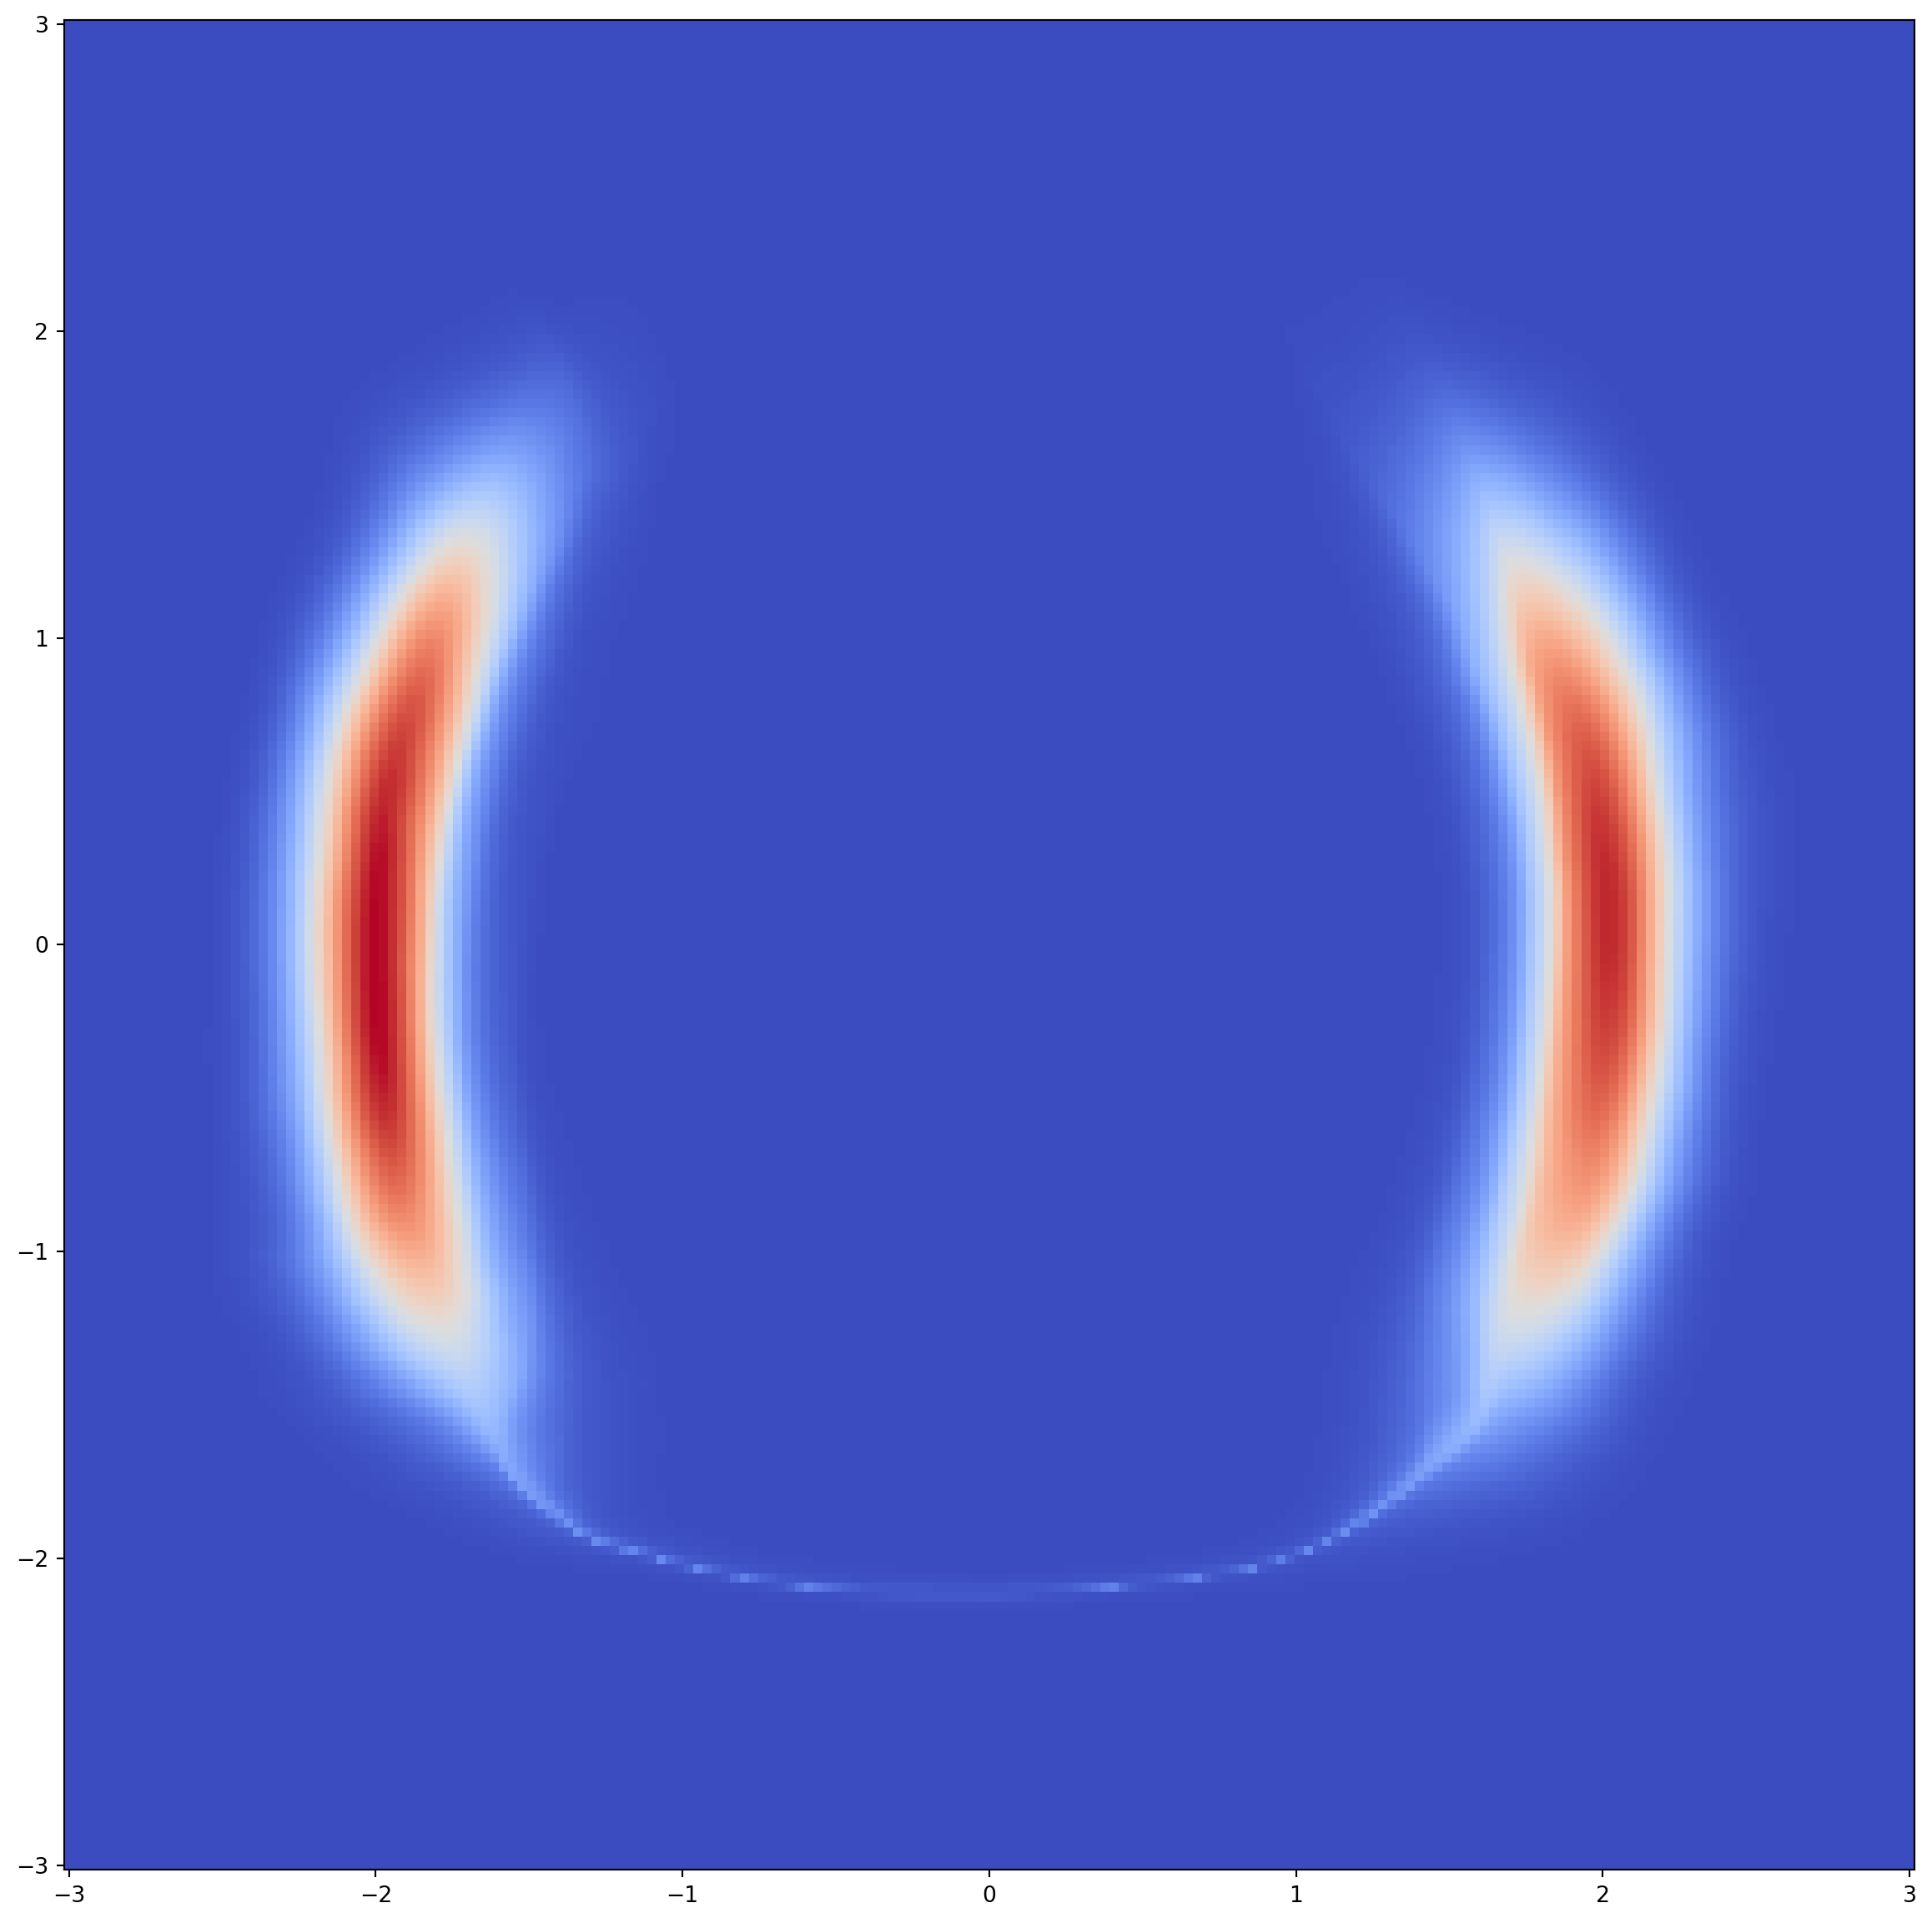

 25%|██▌       | 1000/4000 [01:17<09:08,  5.47it/s]

 25%|██▌       | 1002/4000 [01:18<07:33,  6.61it/s]

 25%|██▌       | 1004/4000 [01:18<06:29,  7.70it/s]

 25%|██▌       | 1006/4000 [01:18<05:39,  8.82it/s]

 25%|██▌       | 1008/4000 [01:18<05:04,  9.83it/s]

 25%|██▌       | 1010/4000 [01:18<04:39, 10.71it/s]

 25%|██▌       | 1012/4000 [01:18<04:23, 11.34it/s]

 25%|██▌       | 1014/4000 [01:18<04:12, 11.81it/s]

 25%|██▌       | 1016/4000 [01:19<04:03, 12.27it/s]

 25%|██▌       | 1018/4000 [01:19<03:55, 12.64it/s]

 26%|██▌       | 1020/4000 [01:19<03:51, 12.86it/s]

 26%|██▌       | 1022/4000 [01:19<03:47, 13.08it/s]

 26%|██▌       | 1024/4000 [01:19<03:44, 13.26it/s]

 26%|██▌       | 1026/4000 [01:19<03:44, 13.22it/s]

 26%|██▌       | 1028/4000 [01:19<03:47, 13.07it/s]

 26%|██▌       | 1030/4000 [01:20<03:48, 13.01it/s]

 26%|██▌       | 1032/4000 [01:20<03:45, 13.15it/s]

 26%|██▌       | 1034/4000 [01:20<03:43, 13.28it/s]

 26%|██▌       | 1036/4000 [01:20<03:42, 13.34it/s]

 26%|██▌       | 1038/4000 [01:20<03:41, 13.37it/s]

 26%|██▌       | 1040/4000 [01:20<03:41, 13.36it/s]

 26%|██▌       | 1042/4000 [01:21<03:43, 13.26it/s]

 26%|██▌       | 1044/4000 [01:21<03:43, 13.22it/s]

 26%|██▌       | 1046/4000 [01:21<03:43, 13.24it/s]

 26%|██▌       | 1048/4000 [01:21<03:41, 13.32it/s]

 26%|██▋       | 1050/4000 [01:21<03:40, 13.41it/s]

 26%|██▋       | 1052/4000 [01:21<03:39, 13.44it/s]

 26%|██▋       | 1054/4000 [01:21<03:39, 13.44it/s]

 26%|██▋       | 1056/4000 [01:22<03:44, 13.11it/s]

 26%|██▋       | 1058/4000 [01:22<03:42, 13.22it/s]

 26%|██▋       | 1060/4000 [01:22<03:40, 13.31it/s]

 27%|██▋       | 1062/4000 [01:22<03:38, 13.42it/s]

 27%|██▋       | 1064/4000 [01:22<03:38, 13.41it/s]

 27%|██▋       | 1066/4000 [01:22<03:37, 13.46it/s]

 27%|██▋       | 1068/4000 [01:22<03:37, 13.48it/s]

 27%|██▋       | 1070/4000 [01:23<03:37, 13.49it/s]

 27%|██▋       | 1072/4000 [01:23<03:40, 13.29it/s]

 27%|██▋       | 1074/4000 [01:23<03:40, 13.26it/s]

 27%|██▋       | 1076/4000 [01:23<03:41, 13.19it/s]

 27%|██▋       | 1078/4000 [01:23<03:41, 13.18it/s]

 27%|██▋       | 1080/4000 [01:23<03:43, 13.09it/s]

 27%|██▋       | 1082/4000 [01:24<03:43, 13.04it/s]

 27%|██▋       | 1084/4000 [01:24<03:41, 13.18it/s]

 27%|██▋       | 1086/4000 [01:24<03:40, 13.23it/s]

 27%|██▋       | 1088/4000 [01:24<03:38, 13.30it/s]

 27%|██▋       | 1090/4000 [01:24<03:38, 13.32it/s]

 27%|██▋       | 1092/4000 [01:24<03:37, 13.39it/s]

 27%|██▋       | 1094/4000 [01:24<03:37, 13.39it/s]

 27%|██▋       | 1096/4000 [01:25<03:36, 13.44it/s]

 27%|██▋       | 1098/4000 [01:25<03:35, 13.49it/s]

 28%|██▊       | 1100/4000 [01:25<03:35, 13.47it/s]

 28%|██▊       | 1102/4000 [01:25<03:35, 13.48it/s]

 28%|██▊       | 1104/4000 [01:25<03:34, 13.50it/s]

 28%|██▊       | 1106/4000 [01:25<03:34, 13.52it/s]

 28%|██▊       | 1108/4000 [01:25<03:34, 13.48it/s]

 28%|██▊       | 1110/4000 [01:26<03:34, 13.50it/s]

 28%|██▊       | 1112/4000 [01:26<03:34, 13.46it/s]

 28%|██▊       | 1114/4000 [01:26<03:34, 13.47it/s]

 28%|██▊       | 1116/4000 [01:26<03:33, 13.48it/s]

 28%|██▊       | 1118/4000 [01:26<03:39, 13.13it/s]

 28%|██▊       | 1120/4000 [01:26<03:40, 13.05it/s]

 28%|██▊       | 1122/4000 [01:27<03:40, 13.08it/s]

 28%|██▊       | 1124/4000 [01:27<03:39, 13.13it/s]

 28%|██▊       | 1126/4000 [01:27<03:38, 13.14it/s]

 28%|██▊       | 1128/4000 [01:27<03:37, 13.19it/s]

 28%|██▊       | 1130/4000 [01:27<03:37, 13.19it/s]

 28%|██▊       | 1132/4000 [01:27<03:36, 13.24it/s]

 28%|██▊       | 1134/4000 [01:27<03:36, 13.27it/s]

 28%|██▊       | 1136/4000 [01:28<03:36, 13.23it/s]

 28%|██▊       | 1138/4000 [01:28<03:35, 13.25it/s]

 28%|██▊       | 1140/4000 [01:28<03:35, 13.26it/s]

 29%|██▊       | 1142/4000 [01:28<03:35, 13.28it/s]

 29%|██▊       | 1144/4000 [01:28<03:34, 13.35it/s]

 29%|██▊       | 1146/4000 [01:28<03:35, 13.27it/s]

 29%|██▊       | 1148/4000 [01:28<03:34, 13.30it/s]

 29%|██▉       | 1150/4000 [01:29<03:34, 13.27it/s]

 29%|██▉       | 1152/4000 [01:29<03:34, 13.27it/s]

 29%|██▉       | 1154/4000 [01:29<03:34, 13.24it/s]

 29%|██▉       | 1156/4000 [01:29<03:34, 13.25it/s]

 29%|██▉       | 1158/4000 [01:29<03:35, 13.17it/s]

 29%|██▉       | 1160/4000 [01:29<03:34, 13.25it/s]

 29%|██▉       | 1162/4000 [01:30<03:32, 13.34it/s]

 29%|██▉       | 1164/4000 [01:30<03:31, 13.41it/s]

 29%|██▉       | 1166/4000 [01:30<03:30, 13.47it/s]

 29%|██▉       | 1168/4000 [01:30<03:30, 13.49it/s]

 29%|██▉       | 1170/4000 [01:30<03:29, 13.51it/s]

 29%|██▉       | 1172/4000 [01:30<03:34, 13.15it/s]

 29%|██▉       | 1174/4000 [01:30<03:35, 13.12it/s]

 29%|██▉       | 1176/4000 [01:31<03:35, 13.13it/s]

 29%|██▉       | 1178/4000 [01:31<03:33, 13.20it/s]

 30%|██▉       | 1180/4000 [01:31<03:32, 13.28it/s]

 30%|██▉       | 1182/4000 [01:31<03:31, 13.33it/s]

 30%|██▉       | 1184/4000 [01:31<03:31, 13.33it/s]

 30%|██▉       | 1186/4000 [01:31<03:30, 13.34it/s]

 30%|██▉       | 1188/4000 [01:32<03:34, 13.12it/s]

 30%|██▉       | 1190/4000 [01:32<03:34, 13.08it/s]

 30%|██▉       | 1192/4000 [01:32<03:33, 13.13it/s]

 30%|██▉       | 1194/4000 [01:32<03:32, 13.18it/s]

 30%|██▉       | 1196/4000 [01:32<03:32, 13.22it/s]

 30%|██▉       | 1198/4000 [01:32<03:31, 13.26it/s]

 30%|███       | 1200/4000 [01:32<03:30, 13.32it/s]

 30%|███       | 1202/4000 [01:33<03:31, 13.23it/s]

 30%|███       | 1204/4000 [01:33<03:30, 13.29it/s]

 30%|███       | 1206/4000 [01:33<03:28, 13.37it/s]

 30%|███       | 1208/4000 [01:33<03:27, 13.44it/s]

 30%|███       | 1210/4000 [01:33<03:32, 13.13it/s]

 30%|███       | 1212/4000 [01:33<03:33, 13.07it/s]

 30%|███       | 1214/4000 [01:33<03:32, 13.09it/s]

 30%|███       | 1216/4000 [01:34<03:31, 13.17it/s]

 30%|███       | 1218/4000 [01:34<03:30, 13.22it/s]

 30%|███       | 1220/4000 [01:34<03:31, 13.14it/s]

 31%|███       | 1222/4000 [01:34<03:33, 13.04it/s]

 31%|███       | 1224/4000 [01:34<03:31, 13.10it/s]

 31%|███       | 1226/4000 [01:34<03:30, 13.15it/s]

 31%|███       | 1228/4000 [01:35<03:32, 13.05it/s]

 31%|███       | 1230/4000 [01:35<03:31, 13.07it/s]

 31%|███       | 1232/4000 [01:35<03:30, 13.15it/s]

 31%|███       | 1234/4000 [01:35<03:29, 13.19it/s]

 31%|███       | 1236/4000 [01:35<03:28, 13.24it/s]

 31%|███       | 1238/4000 [01:35<03:31, 13.08it/s]

 31%|███       | 1240/4000 [01:35<03:30, 13.11it/s]

 31%|███       | 1242/4000 [01:36<03:28, 13.23it/s]

 31%|███       | 1244/4000 [01:36<03:29, 13.16it/s]

 31%|███       | 1246/4000 [01:36<03:29, 13.16it/s]

 31%|███       | 1248/4000 [01:36<03:28, 13.19it/s]

 31%|███▏      | 1250/4000 [01:36<03:28, 13.20it/s]

 31%|███▏      | 1252/4000 [01:36<03:28, 13.18it/s]

 31%|███▏      | 1254/4000 [01:37<03:31, 13.00it/s]

 31%|███▏      | 1256/4000 [01:37<03:30, 13.01it/s]

 31%|███▏      | 1258/4000 [01:37<03:29, 13.07it/s]

 32%|███▏      | 1260/4000 [01:37<03:29, 13.07it/s]

 32%|███▏      | 1262/4000 [01:37<03:29, 13.09it/s]

 32%|███▏      | 1264/4000 [01:37<03:28, 13.13it/s]

 32%|███▏      | 1266/4000 [01:37<03:26, 13.22it/s]

 32%|███▏      | 1268/4000 [01:38<03:25, 13.28it/s]

 32%|███▏      | 1270/4000 [01:38<03:25, 13.26it/s]

 32%|███▏      | 1272/4000 [01:38<03:24, 13.32it/s]

 32%|███▏      | 1274/4000 [01:38<03:23, 13.40it/s]

 32%|███▏      | 1276/4000 [01:38<03:26, 13.22it/s]

 32%|███▏      | 1278/4000 [01:38<03:58, 11.41it/s]

 32%|███▏      | 1280/4000 [01:39<03:49, 11.83it/s]

 32%|███▏      | 1282/4000 [01:39<03:43, 12.18it/s]

 32%|███▏      | 1284/4000 [01:39<03:39, 12.38it/s]

 32%|███▏      | 1286/4000 [01:39<03:35, 12.58it/s]

 32%|███▏      | 1288/4000 [01:39<03:32, 12.79it/s]

 32%|███▏      | 1290/4000 [01:39<03:29, 12.92it/s]

 32%|███▏      | 1292/4000 [01:39<03:27, 13.04it/s]

 32%|███▏      | 1294/4000 [01:40<03:25, 13.16it/s]

 32%|███▏      | 1296/4000 [01:40<03:24, 13.20it/s]

 32%|███▏      | 1298/4000 [01:40<03:24, 13.22it/s]

 32%|███▎      | 1300/4000 [01:40<03:38, 12.33it/s]

 33%|███▎      | 1302/4000 [01:40<03:33, 12.63it/s]

 33%|███▎      | 1304/4000 [01:40<03:30, 12.83it/s]

 33%|███▎      | 1306/4000 [01:41<03:26, 13.02it/s]

 33%|███▎      | 1308/4000 [01:41<03:24, 13.15it/s]

 33%|███▎      | 1310/4000 [01:41<03:23, 13.24it/s]

 33%|███▎      | 1312/4000 [01:41<03:22, 13.30it/s]

 33%|███▎      | 1314/4000 [01:41<03:21, 13.33it/s]

 33%|███▎      | 1316/4000 [01:41<03:20, 13.37it/s]

 33%|███▎      | 1318/4000 [01:41<03:20, 13.36it/s]

 33%|███▎      | 1320/4000 [01:42<03:25, 13.06it/s]

 33%|███▎      | 1322/4000 [01:42<03:24, 13.09it/s]

 33%|███▎      | 1324/4000 [01:42<03:22, 13.20it/s]

 33%|███▎      | 1326/4000 [01:42<03:21, 13.28it/s]

 33%|███▎      | 1328/4000 [01:42<03:20, 13.33it/s]

 33%|███▎      | 1330/4000 [01:42<03:19, 13.39it/s]

 33%|███▎      | 1332/4000 [01:43<03:18, 13.43it/s]

 33%|███▎      | 1334/4000 [01:43<03:18, 13.44it/s]

 33%|███▎      | 1336/4000 [01:43<03:18, 13.41it/s]

 33%|███▎      | 1338/4000 [01:43<03:18, 13.43it/s]

 34%|███▎      | 1340/4000 [01:43<03:17, 13.47it/s]

 34%|███▎      | 1342/4000 [01:43<03:17, 13.43it/s]

 34%|███▎      | 1344/4000 [01:43<03:17, 13.42it/s]

 34%|███▎      | 1346/4000 [01:44<03:18, 13.38it/s]

 34%|███▎      | 1348/4000 [01:44<03:17, 13.42it/s]

 34%|███▍      | 1350/4000 [01:44<03:17, 13.41it/s]

 34%|███▍      | 1352/4000 [01:44<03:17, 13.43it/s]

 34%|███▍      | 1354/4000 [01:44<03:17, 13.42it/s]

 34%|███▍      | 1356/4000 [01:44<03:16, 13.43it/s]

 34%|███▍      | 1358/4000 [01:44<03:16, 13.45it/s]

 34%|███▍      | 1360/4000 [01:45<03:15, 13.49it/s]

 34%|███▍      | 1362/4000 [01:45<03:14, 13.53it/s]

 34%|███▍      | 1364/4000 [01:45<03:15, 13.51it/s]

 34%|███▍      | 1366/4000 [01:45<03:15, 13.50it/s]

 34%|███▍      | 1368/4000 [01:45<03:14, 13.51it/s]

 34%|███▍      | 1370/4000 [01:45<03:14, 13.50it/s]

 34%|███▍      | 1372/4000 [01:45<03:14, 13.50it/s]

 34%|███▍      | 1374/4000 [01:46<03:14, 13.51it/s]

 34%|███▍      | 1376/4000 [01:46<03:14, 13.50it/s]

 34%|███▍      | 1378/4000 [01:46<03:14, 13.51it/s]

 34%|███▍      | 1380/4000 [01:46<03:14, 13.48it/s]

 35%|███▍      | 1382/4000 [01:46<03:14, 13.44it/s]

 35%|███▍      | 1384/4000 [01:46<03:15, 13.39it/s]

 35%|███▍      | 1386/4000 [01:47<03:15, 13.34it/s]

 35%|███▍      | 1388/4000 [01:47<03:19, 13.12it/s]

 35%|███▍      | 1390/4000 [01:47<03:20, 13.02it/s]

 35%|███▍      | 1392/4000 [01:47<03:19, 13.05it/s]

 35%|███▍      | 1394/4000 [01:47<03:19, 13.07it/s]

 35%|███▍      | 1396/4000 [01:47<03:19, 13.06it/s]

 35%|███▍      | 1398/4000 [01:47<03:20, 13.00it/s]

 35%|███▌      | 1400/4000 [01:48<03:18, 13.09it/s]

 35%|███▌      | 1402/4000 [01:48<03:18, 13.09it/s]

 35%|███▌      | 1404/4000 [01:48<03:18, 13.09it/s]

 35%|███▌      | 1406/4000 [01:48<03:18, 13.04it/s]

 35%|███▌      | 1408/4000 [01:48<03:20, 12.93it/s]

 35%|███▌      | 1410/4000 [01:48<03:21, 12.84it/s]

 35%|███▌      | 1412/4000 [01:49<03:22, 12.77it/s]

 35%|███▌      | 1414/4000 [01:49<03:21, 12.82it/s]

 35%|███▌      | 1416/4000 [01:49<03:19, 12.96it/s]

 35%|███▌      | 1418/4000 [01:49<03:20, 12.86it/s]

 36%|███▌      | 1420/4000 [01:49<03:23, 12.70it/s]

 36%|███▌      | 1422/4000 [01:49<03:22, 12.71it/s]

 36%|███▌      | 1424/4000 [01:49<03:21, 12.80it/s]

 36%|███▌      | 1426/4000 [01:50<03:19, 12.87it/s]

 36%|███▌      | 1428/4000 [01:50<03:18, 12.98it/s]

 36%|███▌      | 1430/4000 [01:50<03:17, 13.01it/s]

 36%|███▌      | 1432/4000 [01:50<03:16, 13.06it/s]

 36%|███▌      | 1434/4000 [01:50<03:15, 13.10it/s]

 36%|███▌      | 1436/4000 [01:50<03:14, 13.18it/s]

 36%|███▌      | 1438/4000 [01:51<03:14, 13.21it/s]

 36%|███▌      | 1440/4000 [01:51<03:12, 13.28it/s]

 36%|███▌      | 1442/4000 [01:51<03:13, 13.23it/s]

 36%|███▌      | 1444/4000 [01:51<03:20, 12.75it/s]

 36%|███▌      | 1446/4000 [01:51<03:19, 12.78it/s]

 36%|███▌      | 1448/4000 [01:51<03:20, 12.74it/s]

 36%|███▋      | 1450/4000 [01:51<03:18, 12.88it/s]

 36%|███▋      | 1452/4000 [01:52<03:16, 12.94it/s]

 36%|███▋      | 1454/4000 [01:52<03:14, 13.06it/s]

 36%|███▋      | 1456/4000 [01:52<03:13, 13.18it/s]

 36%|███▋      | 1458/4000 [01:52<03:11, 13.26it/s]

 36%|███▋      | 1460/4000 [01:52<03:10, 13.34it/s]

 37%|███▋      | 1462/4000 [01:52<03:13, 13.10it/s]

 37%|███▋      | 1464/4000 [01:53<03:12, 13.15it/s]

 37%|███▋      | 1466/4000 [01:53<03:11, 13.21it/s]

 37%|███▋      | 1468/4000 [01:53<03:10, 13.30it/s]

 37%|███▋      | 1470/4000 [01:53<03:09, 13.39it/s]

 37%|███▋      | 1472/4000 [01:53<03:08, 13.39it/s]

 37%|███▋      | 1474/4000 [01:53<03:08, 13.39it/s]

 37%|███▋      | 1476/4000 [01:53<03:08, 13.42it/s]

 37%|███▋      | 1478/4000 [01:54<03:07, 13.42it/s]

 37%|███▋      | 1480/4000 [01:54<03:07, 13.44it/s]

 37%|███▋      | 1482/4000 [01:54<03:06, 13.47it/s]

 37%|███▋      | 1484/4000 [01:54<03:06, 13.49it/s]

 37%|███▋      | 1486/4000 [01:54<03:06, 13.47it/s]

 37%|███▋      | 1488/4000 [01:54<03:07, 13.37it/s]

 37%|███▋      | 1490/4000 [01:54<03:08, 13.31it/s]

 37%|███▋      | 1492/4000 [01:55<03:09, 13.21it/s]

 37%|███▋      | 1494/4000 [01:55<03:10, 13.19it/s]

 37%|███▋      | 1496/4000 [01:55<03:09, 13.20it/s]

 37%|███▋      | 1498/4000 [01:55<03:08, 13.28it/s]

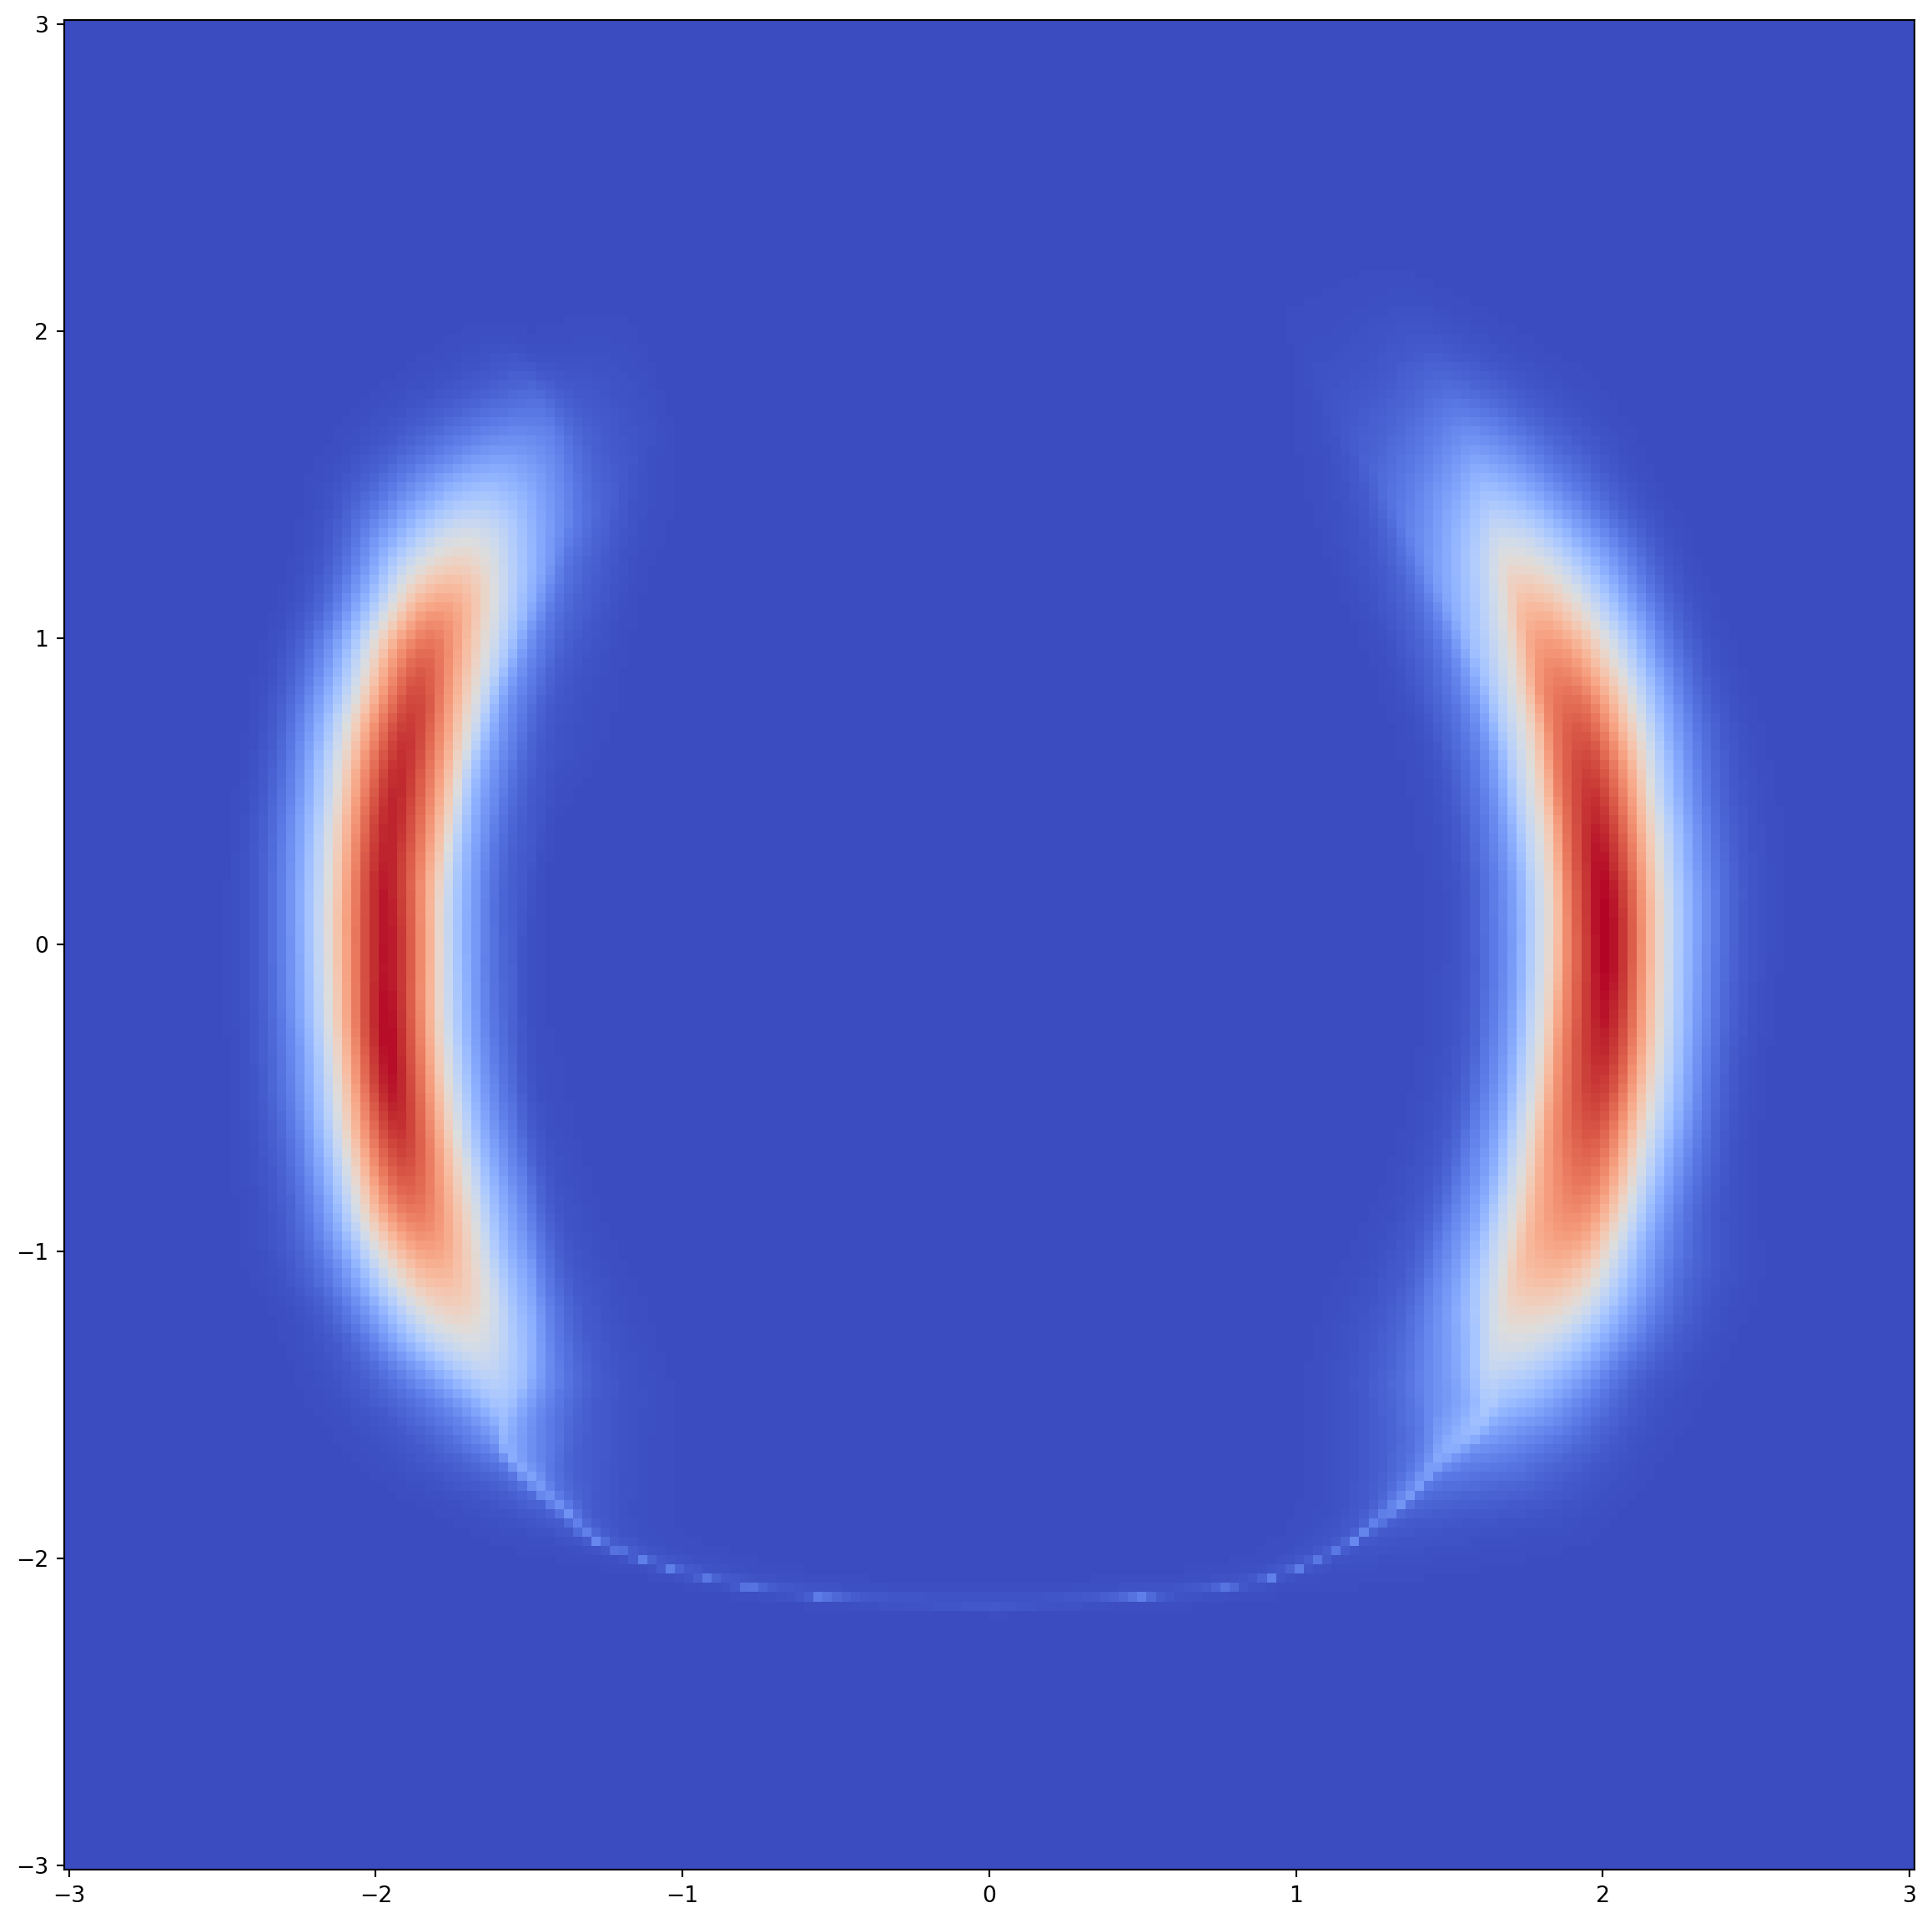

 38%|███▊      | 1500/4000 [01:56<07:09,  5.82it/s]

 38%|███▊      | 1502/4000 [01:56<05:59,  6.96it/s]

 38%|███▊      | 1504/4000 [01:56<05:10,  8.05it/s]

 38%|███▊      | 1506/4000 [01:56<05:01,  8.28it/s]

 38%|███▊      | 1508/4000 [01:57<04:27,  9.32it/s]

 38%|███▊      | 1510/4000 [01:57<04:04, 10.19it/s]

 38%|███▊      | 1512/4000 [01:57<03:46, 10.97it/s]

 38%|███▊      | 1514/4000 [01:57<03:34, 11.58it/s]

 38%|███▊      | 1516/4000 [01:57<03:27, 11.98it/s]

 38%|███▊      | 1518/4000 [01:57<03:20, 12.38it/s]

 38%|███▊      | 1520/4000 [01:57<03:15, 12.67it/s]

 38%|███▊      | 1522/4000 [01:58<03:14, 12.71it/s]

 38%|███▊      | 1524/4000 [01:58<03:13, 12.82it/s]

 38%|███▊      | 1526/4000 [01:58<03:11, 12.89it/s]

 38%|███▊      | 1528/4000 [01:58<03:12, 12.85it/s]

 38%|███▊      | 1530/4000 [01:58<03:12, 12.80it/s]

 38%|███▊      | 1532/4000 [01:58<03:13, 12.75it/s]

 38%|███▊      | 1534/4000 [01:59<03:12, 12.79it/s]

 38%|███▊      | 1536/4000 [01:59<03:14, 12.67it/s]

 38%|███▊      | 1538/4000 [01:59<03:15, 12.58it/s]

 38%|███▊      | 1540/4000 [01:59<03:14, 12.64it/s]

 39%|███▊      | 1542/4000 [01:59<03:13, 12.71it/s]

 39%|███▊      | 1544/4000 [01:59<03:11, 12.82it/s]

 39%|███▊      | 1546/4000 [02:00<03:14, 12.63it/s]

 39%|███▊      | 1548/4000 [02:00<03:15, 12.56it/s]

 39%|███▉      | 1550/4000 [02:00<03:12, 12.70it/s]

 39%|███▉      | 1552/4000 [02:00<03:11, 12.76it/s]

 39%|███▉      | 1554/4000 [02:00<03:09, 12.88it/s]

 39%|███▉      | 1556/4000 [02:00<03:08, 12.94it/s]

 39%|███▉      | 1558/4000 [02:00<03:07, 13.00it/s]

 39%|███▉      | 1560/4000 [02:01<03:06, 13.10it/s]

 39%|███▉      | 1562/4000 [02:01<03:04, 13.20it/s]

 39%|███▉      | 1564/4000 [02:01<03:03, 13.29it/s]

 39%|███▉      | 1566/4000 [02:01<03:05, 13.13it/s]

 39%|███▉      | 1568/4000 [02:01<03:08, 12.89it/s]

 39%|███▉      | 1570/4000 [02:01<03:33, 11.36it/s]

 39%|███▉      | 1572/4000 [02:02<03:25, 11.80it/s]

 39%|███▉      | 1574/4000 [02:02<03:22, 11.99it/s]

 39%|███▉      | 1576/4000 [02:02<03:18, 12.20it/s]

 39%|███▉      | 1578/4000 [02:02<03:16, 12.35it/s]

 40%|███▉      | 1580/4000 [02:02<03:12, 12.55it/s]

 40%|███▉      | 1582/4000 [02:02<03:10, 12.67it/s]

 40%|███▉      | 1584/4000 [02:03<03:11, 12.62it/s]

 40%|███▉      | 1586/4000 [02:03<03:11, 12.59it/s]

 40%|███▉      | 1588/4000 [02:03<03:09, 12.72it/s]

 40%|███▉      | 1590/4000 [02:03<03:07, 12.89it/s]

 40%|███▉      | 1592/4000 [02:03<03:04, 13.04it/s]

 40%|███▉      | 1594/4000 [02:03<03:04, 13.04it/s]

 40%|███▉      | 1596/4000 [02:03<03:05, 12.98it/s]

 40%|███▉      | 1598/4000 [02:04<03:04, 13.05it/s]

 40%|████      | 1600/4000 [02:04<03:03, 13.07it/s]

 40%|████      | 1602/4000 [02:04<03:01, 13.20it/s]

 40%|████      | 1604/4000 [02:04<03:00, 13.25it/s]

 40%|████      | 1606/4000 [02:04<03:00, 13.23it/s]

 40%|████      | 1608/4000 [02:04<02:59, 13.29it/s]

 40%|████      | 1610/4000 [02:05<03:00, 13.27it/s]

 40%|████      | 1612/4000 [02:05<03:04, 12.95it/s]

 40%|████      | 1614/4000 [02:05<03:04, 12.96it/s]

 40%|████      | 1616/4000 [02:05<03:03, 12.99it/s]

 40%|████      | 1618/4000 [02:05<03:02, 13.02it/s]

 40%|████      | 1620/4000 [02:05<03:03, 12.96it/s]

 41%|████      | 1622/4000 [02:05<03:01, 13.12it/s]

 41%|████      | 1624/4000 [02:06<02:59, 13.20it/s]

 41%|████      | 1626/4000 [02:06<02:59, 13.22it/s]

 41%|████      | 1628/4000 [02:06<02:59, 13.20it/s]

 41%|████      | 1630/4000 [02:06<02:58, 13.28it/s]

 41%|████      | 1632/4000 [02:06<02:57, 13.31it/s]

 41%|████      | 1634/4000 [02:06<03:00, 13.13it/s]

 41%|████      | 1636/4000 [02:06<03:00, 13.11it/s]

 41%|████      | 1638/4000 [02:07<03:01, 13.04it/s]

 41%|████      | 1640/4000 [02:07<03:02, 12.95it/s]

 41%|████      | 1642/4000 [02:07<03:00, 13.04it/s]

 41%|████      | 1644/4000 [02:07<02:59, 13.13it/s]

 41%|████      | 1646/4000 [02:07<02:58, 13.16it/s]

 41%|████      | 1648/4000 [02:07<02:58, 13.19it/s]

 41%|████▏     | 1650/4000 [02:08<02:58, 13.13it/s]

 41%|████▏     | 1652/4000 [02:08<02:57, 13.20it/s]

 41%|████▏     | 1654/4000 [02:08<02:58, 13.13it/s]

 41%|████▏     | 1656/4000 [02:08<02:57, 13.18it/s]

 41%|████▏     | 1658/4000 [02:08<02:57, 13.21it/s]

 42%|████▏     | 1660/4000 [02:08<02:56, 13.26it/s]

 42%|████▏     | 1662/4000 [02:08<02:56, 13.25it/s]

 42%|████▏     | 1664/4000 [02:09<02:55, 13.29it/s]

 42%|████▏     | 1666/4000 [02:09<02:55, 13.28it/s]

 42%|████▏     | 1668/4000 [02:09<02:55, 13.31it/s]

 42%|████▏     | 1670/4000 [02:09<02:54, 13.38it/s]

 42%|████▏     | 1672/4000 [02:09<02:53, 13.43it/s]

 42%|████▏     | 1674/4000 [02:09<02:53, 13.39it/s]

 42%|████▏     | 1676/4000 [02:10<02:53, 13.39it/s]

 42%|████▏     | 1678/4000 [02:10<02:56, 13.17it/s]

 42%|████▏     | 1680/4000 [02:10<02:57, 13.10it/s]

 42%|████▏     | 1682/4000 [02:10<02:56, 13.14it/s]

 42%|████▏     | 1684/4000 [02:10<02:55, 13.18it/s]

 42%|████▏     | 1686/4000 [02:10<02:54, 13.24it/s]

 42%|████▏     | 1688/4000 [02:10<02:53, 13.29it/s]

 42%|████▏     | 1690/4000 [02:11<02:53, 13.33it/s]

 42%|████▏     | 1692/4000 [02:11<02:53, 13.28it/s]

 42%|████▏     | 1694/4000 [02:11<02:53, 13.31it/s]

 42%|████▏     | 1696/4000 [02:11<02:52, 13.32it/s]

 42%|████▏     | 1698/4000 [02:11<02:52, 13.35it/s]

 42%|████▎     | 1700/4000 [02:11<02:51, 13.37it/s]

 43%|████▎     | 1702/4000 [02:11<02:51, 13.38it/s]

 43%|████▎     | 1704/4000 [02:12<02:51, 13.40it/s]

 43%|████▎     | 1706/4000 [02:12<02:51, 13.41it/s]

 43%|████▎     | 1708/4000 [02:12<02:50, 13.41it/s]

 43%|████▎     | 1710/4000 [02:12<02:50, 13.43it/s]

 43%|████▎     | 1712/4000 [02:12<02:50, 13.39it/s]

 43%|████▎     | 1714/4000 [02:12<02:51, 13.35it/s]

 43%|████▎     | 1716/4000 [02:13<02:51, 13.34it/s]

 43%|████▎     | 1718/4000 [02:13<02:51, 13.34it/s]

 43%|████▎     | 1720/4000 [02:13<02:54, 13.09it/s]

 43%|████▎     | 1722/4000 [02:13<02:54, 13.08it/s]

 43%|████▎     | 1724/4000 [02:13<02:53, 13.11it/s]

 43%|████▎     | 1726/4000 [02:13<02:53, 13.10it/s]

 43%|████▎     | 1728/4000 [02:13<02:53, 13.13it/s]

 43%|████▎     | 1730/4000 [02:14<02:55, 12.90it/s]

 43%|████▎     | 1732/4000 [02:14<02:55, 12.89it/s]

 43%|████▎     | 1734/4000 [02:14<02:54, 12.97it/s]

 43%|████▎     | 1736/4000 [02:14<02:53, 13.03it/s]

 43%|████▎     | 1738/4000 [02:14<02:52, 13.10it/s]

 44%|████▎     | 1740/4000 [02:14<02:51, 13.16it/s]

 44%|████▎     | 1742/4000 [02:15<02:51, 13.17it/s]

 44%|████▎     | 1744/4000 [02:15<02:51, 13.17it/s]

 44%|████▎     | 1746/4000 [02:15<02:50, 13.18it/s]

 44%|████▎     | 1748/4000 [02:15<02:53, 13.00it/s]

 44%|████▍     | 1750/4000 [02:15<02:53, 12.99it/s]

 44%|████▍     | 1752/4000 [02:15<02:53, 12.98it/s]

 44%|████▍     | 1754/4000 [02:15<02:54, 12.86it/s]

 44%|████▍     | 1756/4000 [02:16<02:54, 12.86it/s]

 44%|████▍     | 1758/4000 [02:16<02:53, 12.89it/s]

 44%|████▍     | 1760/4000 [02:16<02:53, 12.94it/s]

 44%|████▍     | 1762/4000 [02:16<02:51, 13.07it/s]

 44%|████▍     | 1764/4000 [02:16<02:49, 13.17it/s]

 44%|████▍     | 1766/4000 [02:16<02:48, 13.24it/s]

 44%|████▍     | 1768/4000 [02:16<02:48, 13.24it/s]

 44%|████▍     | 1770/4000 [02:17<02:48, 13.22it/s]

 44%|████▍     | 1772/4000 [02:17<02:49, 13.13it/s]

 44%|████▍     | 1774/4000 [02:17<02:49, 13.09it/s]

 44%|████▍     | 1776/4000 [02:17<02:49, 13.13it/s]

 44%|████▍     | 1778/4000 [02:17<02:50, 13.02it/s]

 44%|████▍     | 1780/4000 [02:17<02:49, 13.06it/s]

 45%|████▍     | 1782/4000 [02:18<02:48, 13.16it/s]

 45%|████▍     | 1784/4000 [02:18<02:48, 13.12it/s]

 45%|████▍     | 1786/4000 [02:18<02:47, 13.21it/s]

 45%|████▍     | 1788/4000 [02:18<02:47, 13.24it/s]

 45%|████▍     | 1790/4000 [02:18<02:46, 13.30it/s]

 45%|████▍     | 1792/4000 [02:18<02:46, 13.24it/s]

 45%|████▍     | 1794/4000 [02:18<02:48, 13.13it/s]

 45%|████▍     | 1796/4000 [02:19<02:48, 13.10it/s]

 45%|████▍     | 1798/4000 [02:19<02:48, 13.09it/s]

 45%|████▌     | 1800/4000 [02:19<02:47, 13.15it/s]

 45%|████▌     | 1802/4000 [02:19<02:45, 13.24it/s]

 45%|████▌     | 1804/4000 [02:19<02:46, 13.21it/s]

 45%|████▌     | 1806/4000 [02:19<02:45, 13.22it/s]

 45%|████▌     | 1808/4000 [02:20<02:45, 13.24it/s]

 45%|████▌     | 1810/4000 [02:20<02:44, 13.28it/s]

 45%|████▌     | 1812/4000 [02:20<02:44, 13.32it/s]

 45%|████▌     | 1814/4000 [02:20<02:43, 13.37it/s]

 45%|████▌     | 1816/4000 [02:20<02:43, 13.38it/s]

 45%|████▌     | 1818/4000 [02:20<02:43, 13.35it/s]

 46%|████▌     | 1820/4000 [02:20<02:43, 13.36it/s]

 46%|████▌     | 1822/4000 [02:21<02:43, 13.32it/s]

 46%|████▌     | 1824/4000 [02:21<02:45, 13.15it/s]

 46%|████▌     | 1826/4000 [02:21<02:46, 13.09it/s]

 46%|████▌     | 1828/4000 [02:21<02:44, 13.17it/s]

 46%|████▌     | 1830/4000 [02:21<02:44, 13.22it/s]

 46%|████▌     | 1832/4000 [02:21<02:43, 13.27it/s]

 46%|████▌     | 1834/4000 [02:21<02:42, 13.29it/s]

 46%|████▌     | 1836/4000 [02:22<02:42, 13.35it/s]

 46%|████▌     | 1838/4000 [02:22<02:42, 13.32it/s]

 46%|████▌     | 1840/4000 [02:22<02:43, 13.18it/s]

 46%|████▌     | 1842/4000 [02:22<02:44, 13.11it/s]

 46%|████▌     | 1844/4000 [02:22<02:44, 13.12it/s]

 46%|████▌     | 1846/4000 [02:22<02:43, 13.19it/s]

 46%|████▌     | 1848/4000 [02:23<02:42, 13.25it/s]

 46%|████▋     | 1850/4000 [02:23<02:41, 13.30it/s]

 46%|████▋     | 1852/4000 [02:23<02:42, 13.25it/s]

 46%|████▋     | 1854/4000 [02:23<02:44, 13.08it/s]

 46%|████▋     | 1856/4000 [02:23<02:44, 13.02it/s]

 46%|████▋     | 1858/4000 [02:23<02:43, 13.11it/s]

 46%|████▋     | 1860/4000 [02:23<02:42, 13.21it/s]

 47%|████▋     | 1862/4000 [02:24<02:41, 13.27it/s]

 47%|████▋     | 1864/4000 [02:24<02:40, 13.31it/s]

 47%|████▋     | 1866/4000 [02:24<02:40, 13.33it/s]

 47%|████▋     | 1868/4000 [02:24<02:39, 13.36it/s]

 47%|████▋     | 1870/4000 [02:24<02:39, 13.36it/s]

 47%|████▋     | 1872/4000 [02:24<02:39, 13.35it/s]

 47%|████▋     | 1874/4000 [02:25<02:39, 13.31it/s]

 47%|████▋     | 1876/4000 [02:25<02:39, 13.28it/s]

 47%|████▋     | 1878/4000 [02:25<02:39, 13.27it/s]

 47%|████▋     | 1880/4000 [02:25<02:39, 13.28it/s]

 47%|████▋     | 1882/4000 [02:25<02:38, 13.34it/s]

 47%|████▋     | 1884/4000 [02:25<02:38, 13.37it/s]

 47%|████▋     | 1886/4000 [02:25<02:37, 13.41it/s]

 47%|████▋     | 1888/4000 [02:26<02:37, 13.43it/s]

 47%|████▋     | 1890/4000 [02:26<02:37, 13.41it/s]

 47%|████▋     | 1892/4000 [02:26<02:39, 13.25it/s]

 47%|████▋     | 1894/4000 [02:26<02:38, 13.25it/s]

 47%|████▋     | 1896/4000 [02:26<02:38, 13.28it/s]

 47%|████▋     | 1898/4000 [02:26<02:39, 13.22it/s]

 48%|████▊     | 1900/4000 [02:26<02:39, 13.16it/s]

 48%|████▊     | 1902/4000 [02:27<02:39, 13.19it/s]

 48%|████▊     | 1904/4000 [02:27<02:38, 13.22it/s]

 48%|████▊     | 1906/4000 [02:27<02:37, 13.26it/s]

 48%|████▊     | 1908/4000 [02:27<02:37, 13.30it/s]

 48%|████▊     | 1910/4000 [02:27<02:36, 13.33it/s]

 48%|████▊     | 1912/4000 [02:27<02:36, 13.37it/s]

 48%|████▊     | 1914/4000 [02:28<02:35, 13.38it/s]

 48%|████▊     | 1916/4000 [02:28<02:35, 13.39it/s]

 48%|████▊     | 1918/4000 [02:28<02:35, 13.36it/s]

 48%|████▊     | 1920/4000 [02:28<02:35, 13.39it/s]

 48%|████▊     | 1922/4000 [02:28<02:35, 13.38it/s]

 48%|████▊     | 1924/4000 [02:28<02:34, 13.43it/s]

 48%|████▊     | 1926/4000 [02:28<02:34, 13.45it/s]

 48%|████▊     | 1928/4000 [02:29<02:34, 13.42it/s]

 48%|████▊     | 1930/4000 [02:29<02:35, 13.27it/s]

 48%|████▊     | 1932/4000 [02:29<02:35, 13.32it/s]

 48%|████▊     | 1934/4000 [02:29<02:35, 13.32it/s]

 48%|████▊     | 1936/4000 [02:29<02:34, 13.36it/s]

 48%|████▊     | 1938/4000 [02:29<02:34, 13.38it/s]

 48%|████▊     | 1940/4000 [02:29<02:34, 13.36it/s]

 49%|████▊     | 1942/4000 [02:30<02:33, 13.39it/s]

 49%|████▊     | 1944/4000 [02:30<02:33, 13.40it/s]

 49%|████▊     | 1946/4000 [02:30<02:33, 13.42it/s]

 49%|████▊     | 1948/4000 [02:30<02:33, 13.40it/s]

 49%|████▉     | 1950/4000 [02:30<02:32, 13.42it/s]

 49%|████▉     | 1952/4000 [02:30<02:32, 13.40it/s]

 49%|████▉     | 1954/4000 [02:31<02:32, 13.39it/s]

 49%|████▉     | 1956/4000 [02:31<02:33, 13.35it/s]

 49%|████▉     | 1958/4000 [02:31<02:32, 13.37it/s]

 49%|████▉     | 1960/4000 [02:31<03:09, 10.78it/s]

 49%|████▉     | 1962/4000 [02:31<02:59, 11.33it/s]

 49%|████▉     | 1964/4000 [02:31<02:51, 11.84it/s]

 49%|████▉     | 1966/4000 [02:32<02:46, 12.24it/s]

 49%|████▉     | 1968/4000 [02:32<02:41, 12.56it/s]

 49%|████▉     | 1970/4000 [02:32<02:38, 12.79it/s]

 49%|████▉     | 1972/4000 [02:32<02:36, 12.94it/s]

 49%|████▉     | 1974/4000 [02:32<02:35, 13.05it/s]

 49%|████▉     | 1976/4000 [02:32<02:33, 13.16it/s]

 49%|████▉     | 1978/4000 [02:32<02:33, 13.20it/s]

 50%|████▉     | 1980/4000 [02:33<02:32, 13.26it/s]

 50%|████▉     | 1982/4000 [02:33<02:31, 13.29it/s]

 50%|████▉     | 1984/4000 [02:33<02:31, 13.32it/s]

 50%|████▉     | 1986/4000 [02:33<02:31, 13.33it/s]

 50%|████▉     | 1988/4000 [02:33<02:30, 13.38it/s]

 50%|████▉     | 1990/4000 [02:33<02:30, 13.40it/s]

 50%|████▉     | 1992/4000 [02:33<02:29, 13.42it/s]

 50%|████▉     | 1994/4000 [02:34<02:29, 13.45it/s]

 50%|████▉     | 1996/4000 [02:34<02:29, 13.43it/s]

 50%|████▉     | 1998/4000 [02:34<02:29, 13.44it/s]

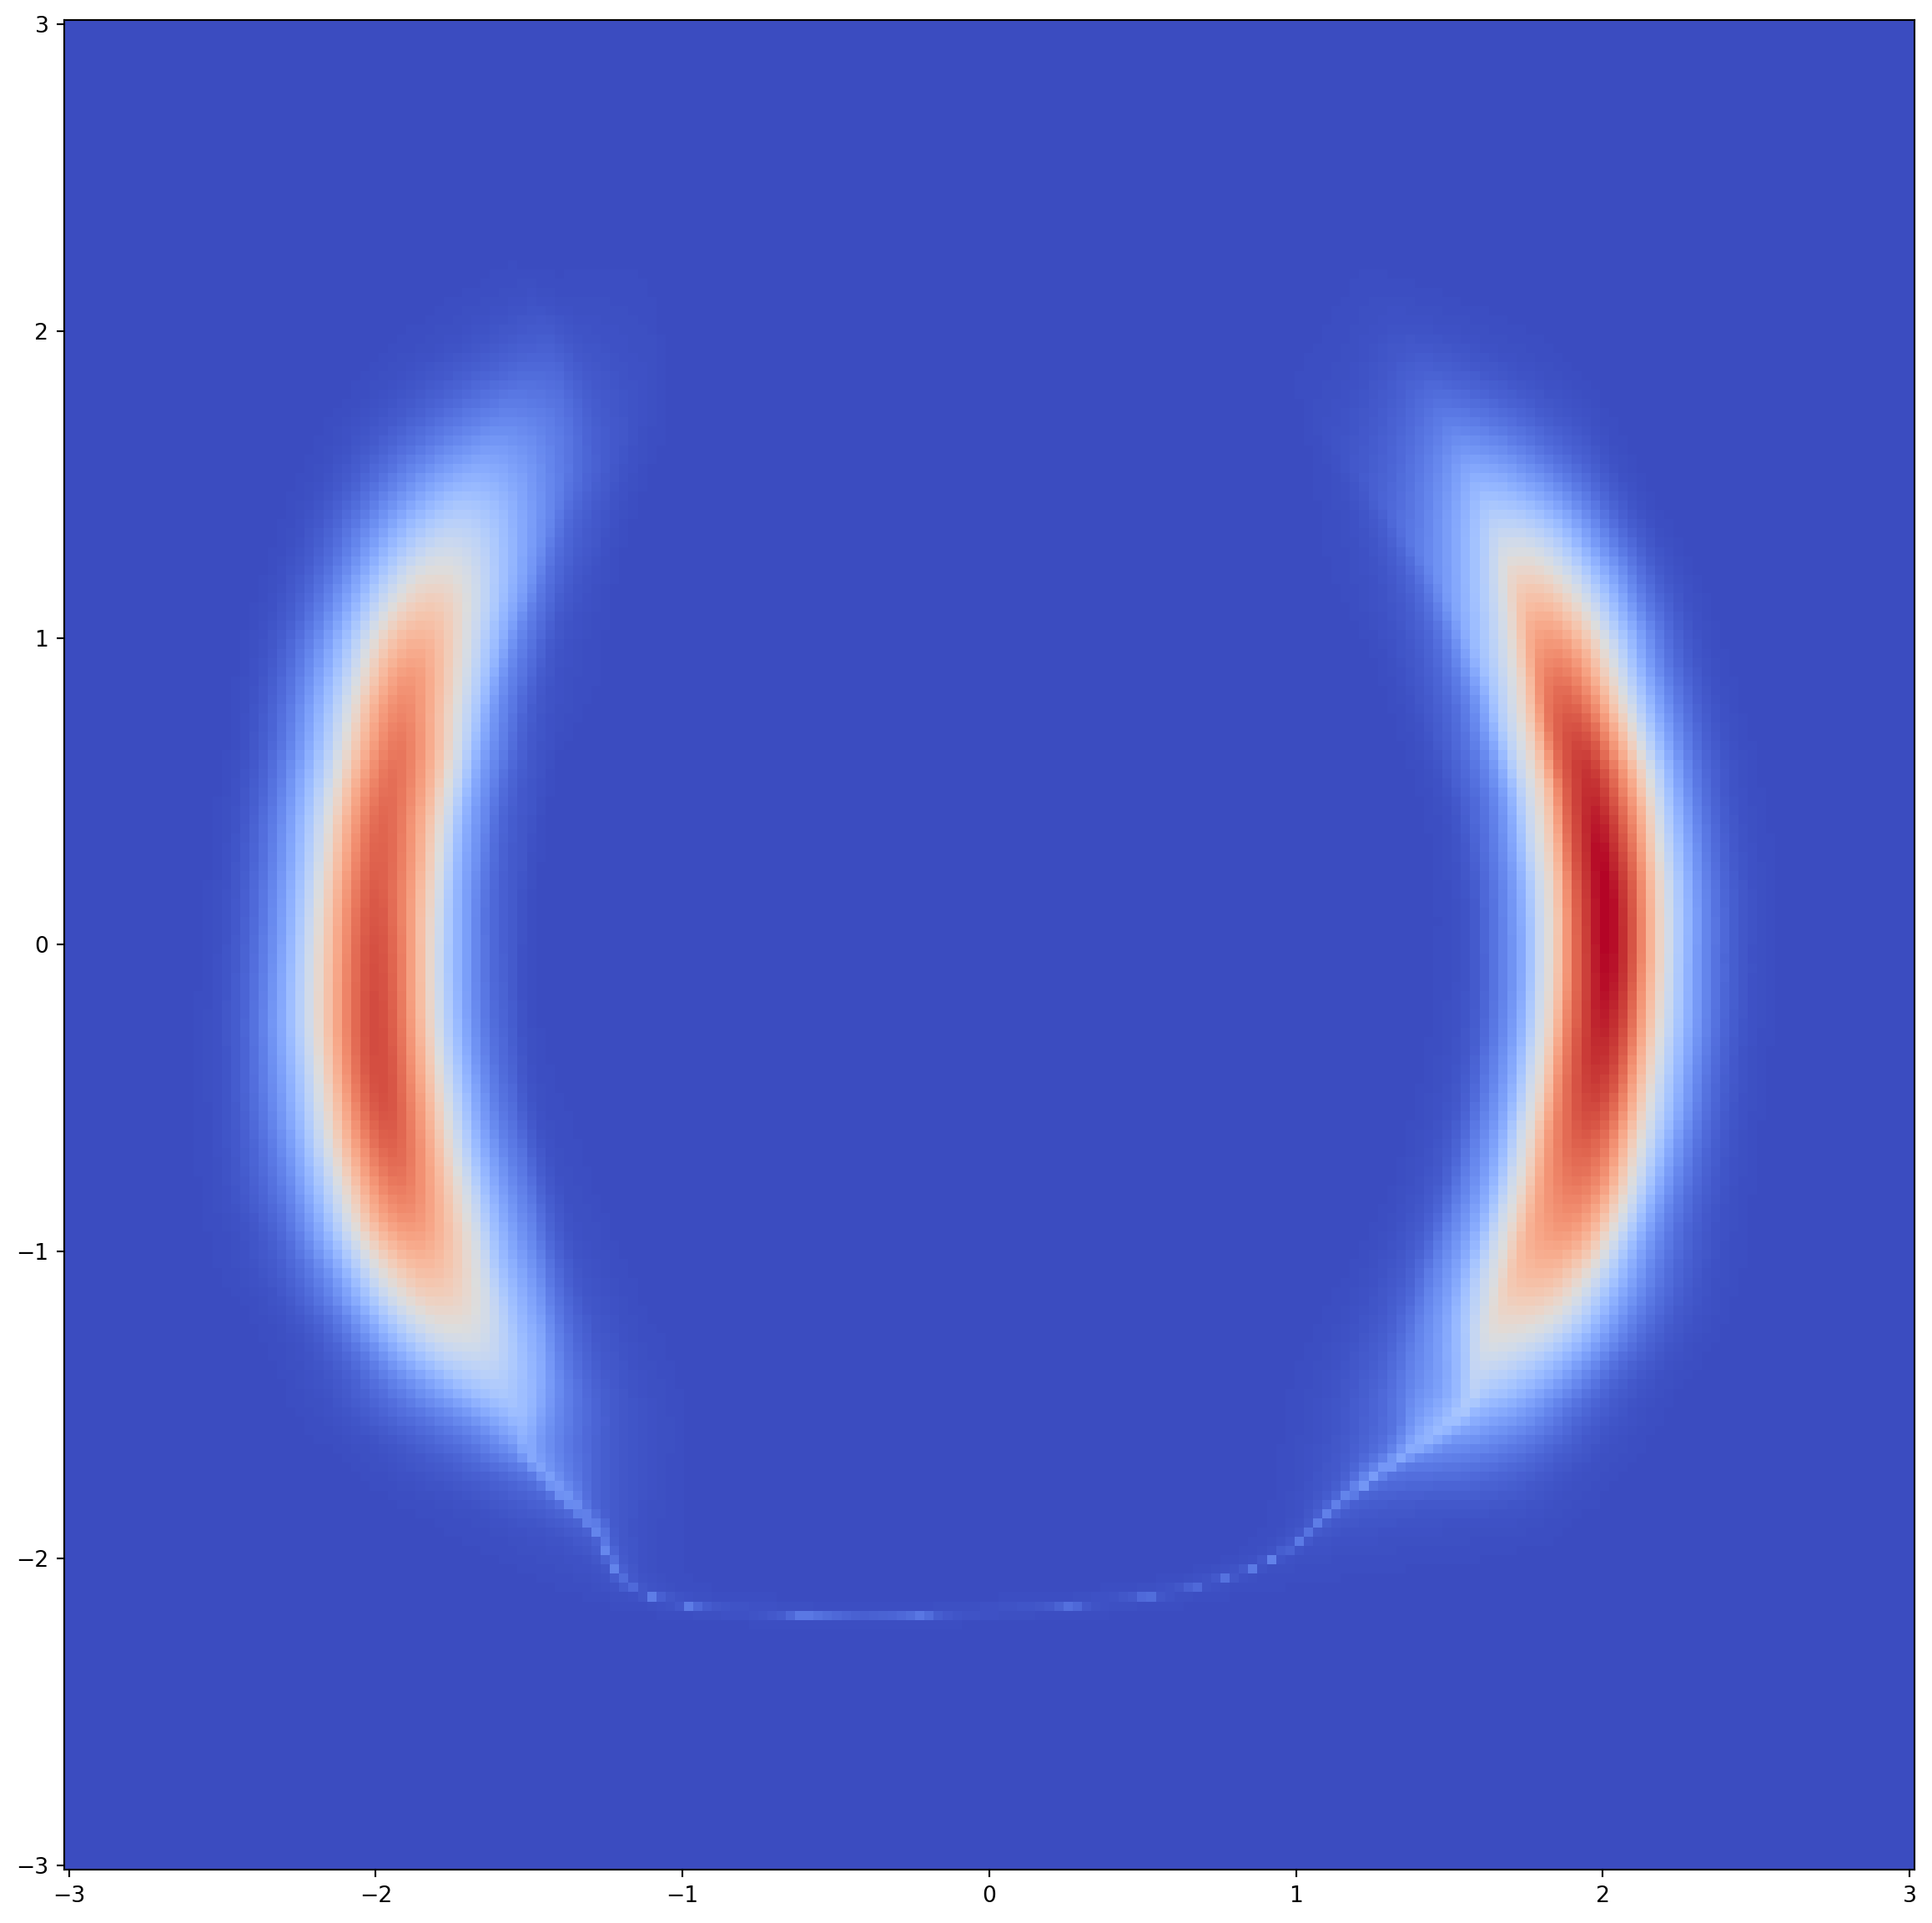

 50%|█████     | 2000/4000 [02:35<05:44,  5.80it/s]

 50%|█████     | 2002/4000 [02:35<04:47,  6.95it/s]

 50%|█████     | 2004/4000 [02:35<04:05,  8.12it/s]

 50%|█████     | 2006/4000 [02:35<03:36,  9.21it/s]

 50%|█████     | 2008/4000 [02:35<03:15, 10.18it/s]

 50%|█████     | 2010/4000 [02:35<03:01, 10.98it/s]

 50%|█████     | 2012/4000 [02:36<02:51, 11.62it/s]

 50%|█████     | 2014/4000 [02:36<02:44, 12.11it/s]

 50%|█████     | 2016/4000 [02:36<02:39, 12.47it/s]

 50%|█████     | 2018/4000 [02:36<02:35, 12.73it/s]

 50%|█████     | 2020/4000 [02:36<02:33, 12.92it/s]

 51%|█████     | 2022/4000 [02:36<02:31, 13.06it/s]

 51%|█████     | 2024/4000 [02:37<02:30, 13.15it/s]

 51%|█████     | 2026/4000 [02:37<02:29, 13.21it/s]

 51%|█████     | 2028/4000 [02:37<02:33, 12.85it/s]

 51%|█████     | 2030/4000 [02:37<02:31, 12.97it/s]

 51%|█████     | 2032/4000 [02:37<02:30, 13.12it/s]

 51%|█████     | 2034/4000 [02:37<02:28, 13.21it/s]

 51%|█████     | 2036/4000 [02:37<02:27, 13.28it/s]

 51%|█████     | 2038/4000 [02:38<02:27, 13.32it/s]

 51%|█████     | 2040/4000 [02:38<02:27, 13.32it/s]

 51%|█████     | 2042/4000 [02:38<02:26, 13.36it/s]

 51%|█████     | 2044/4000 [02:38<02:26, 13.36it/s]

 51%|█████     | 2046/4000 [02:38<02:27, 13.24it/s]

 51%|█████     | 2048/4000 [02:38<02:27, 13.23it/s]

 51%|█████▏    | 2050/4000 [02:38<02:26, 13.27it/s]

 51%|█████▏    | 2052/4000 [02:39<02:26, 13.29it/s]

 51%|█████▏    | 2054/4000 [02:39<02:25, 13.34it/s]

 51%|█████▏    | 2056/4000 [02:39<02:25, 13.36it/s]

 51%|█████▏    | 2058/4000 [02:39<02:25, 13.37it/s]

 52%|█████▏    | 2060/4000 [02:39<02:25, 13.37it/s]

 52%|█████▏    | 2062/4000 [02:39<02:24, 13.37it/s]

 52%|█████▏    | 2064/4000 [02:40<02:27, 13.16it/s]

 52%|█████▏    | 2066/4000 [02:40<02:28, 13.03it/s]

 52%|█████▏    | 2068/4000 [02:40<02:27, 13.11it/s]

 52%|█████▏    | 2070/4000 [02:40<02:26, 13.15it/s]

 52%|█████▏    | 2072/4000 [02:40<02:25, 13.23it/s]

 52%|█████▏    | 2074/4000 [02:40<02:25, 13.23it/s]

 52%|█████▏    | 2076/4000 [02:40<02:24, 13.28it/s]

 52%|█████▏    | 2078/4000 [02:41<02:24, 13.26it/s]

 52%|█████▏    | 2080/4000 [02:41<02:24, 13.27it/s]

 52%|█████▏    | 2082/4000 [02:41<02:24, 13.26it/s]

 52%|█████▏    | 2084/4000 [02:41<02:26, 13.05it/s]

 52%|█████▏    | 2086/4000 [02:41<02:26, 13.04it/s]

 52%|█████▏    | 2088/4000 [02:41<02:25, 13.10it/s]

 52%|█████▏    | 2090/4000 [02:42<02:25, 13.11it/s]

 52%|█████▏    | 2092/4000 [02:42<02:25, 13.07it/s]

 52%|█████▏    | 2094/4000 [02:42<02:26, 13.00it/s]

 52%|█████▏    | 2096/4000 [02:42<02:26, 12.98it/s]

 52%|█████▏    | 2098/4000 [02:42<02:25, 13.07it/s]

 52%|█████▎    | 2100/4000 [02:42<02:25, 13.07it/s]

 53%|█████▎    | 2102/4000 [02:42<02:24, 13.14it/s]

 53%|█████▎    | 2104/4000 [02:43<02:23, 13.19it/s]

 53%|█████▎    | 2106/4000 [02:43<02:23, 13.16it/s]

 53%|█████▎    | 2108/4000 [02:43<02:23, 13.22it/s]

 53%|█████▎    | 2110/4000 [02:43<02:23, 13.20it/s]

 53%|█████▎    | 2112/4000 [02:43<02:22, 13.27it/s]

 53%|█████▎    | 2114/4000 [02:43<02:45, 11.42it/s]

 53%|█████▎    | 2116/4000 [02:44<02:39, 11.80it/s]

 53%|█████▎    | 2118/4000 [02:44<02:34, 12.22it/s]

 53%|█████▎    | 2120/4000 [02:44<02:31, 12.40it/s]

 53%|█████▎    | 2122/4000 [02:44<02:28, 12.68it/s]

 53%|█████▎    | 2124/4000 [02:44<02:25, 12.90it/s]

 53%|█████▎    | 2126/4000 [02:44<02:23, 13.05it/s]

 53%|█████▎    | 2128/4000 [02:44<02:21, 13.19it/s]

 53%|█████▎    | 2130/4000 [02:45<02:21, 13.25it/s]

 53%|█████▎    | 2132/4000 [02:45<02:20, 13.31it/s]

 53%|█████▎    | 2134/4000 [02:45<02:19, 13.35it/s]

 53%|█████▎    | 2136/4000 [02:45<02:19, 13.37it/s]

 53%|█████▎    | 2138/4000 [02:45<02:19, 13.39it/s]

 54%|█████▎    | 2140/4000 [02:45<02:18, 13.40it/s]

 54%|█████▎    | 2142/4000 [02:46<02:18, 13.43it/s]

 54%|█████▎    | 2144/4000 [02:46<02:17, 13.45it/s]

 54%|█████▎    | 2146/4000 [02:46<02:19, 13.26it/s]

 54%|█████▎    | 2148/4000 [02:46<02:20, 13.15it/s]

 54%|█████▍    | 2150/4000 [02:46<02:20, 13.19it/s]

 54%|█████▍    | 2152/4000 [02:46<02:20, 13.17it/s]

 54%|█████▍    | 2154/4000 [02:46<02:19, 13.23it/s]

 54%|█████▍    | 2156/4000 [02:47<02:20, 13.09it/s]

 54%|█████▍    | 2158/4000 [02:47<02:21, 13.01it/s]

 54%|█████▍    | 2160/4000 [02:47<02:22, 12.92it/s]

 54%|█████▍    | 2162/4000 [02:47<02:21, 13.01it/s]

 54%|█████▍    | 2164/4000 [02:47<02:19, 13.14it/s]

 54%|█████▍    | 2166/4000 [02:47<02:18, 13.25it/s]

 54%|█████▍    | 2168/4000 [02:47<02:17, 13.32it/s]

 54%|█████▍    | 2170/4000 [02:48<02:16, 13.38it/s]

 54%|█████▍    | 2172/4000 [02:48<02:16, 13.36it/s]

 54%|█████▍    | 2174/4000 [02:48<02:16, 13.38it/s]

 54%|█████▍    | 2176/4000 [02:48<02:16, 13.35it/s]

 54%|█████▍    | 2178/4000 [02:48<02:16, 13.34it/s]

 55%|█████▍    | 2180/4000 [02:48<02:16, 13.31it/s]

 55%|█████▍    | 2182/4000 [02:49<02:16, 13.34it/s]

 55%|█████▍    | 2184/4000 [02:49<02:16, 13.35it/s]

 55%|█████▍    | 2186/4000 [02:49<02:15, 13.36it/s]

 55%|█████▍    | 2188/4000 [02:49<02:15, 13.38it/s]

 55%|█████▍    | 2190/4000 [02:49<02:16, 13.30it/s]

 55%|█████▍    | 2192/4000 [02:49<02:16, 13.29it/s]

 55%|█████▍    | 2194/4000 [02:49<02:16, 13.28it/s]

 55%|█████▍    | 2196/4000 [02:50<02:15, 13.30it/s]

 55%|█████▍    | 2198/4000 [02:50<02:15, 13.26it/s]

 55%|█████▌    | 2200/4000 [02:50<02:16, 13.19it/s]

 55%|█████▌    | 2202/4000 [02:50<02:16, 13.19it/s]

 55%|█████▌    | 2204/4000 [02:50<02:15, 13.22it/s]

 55%|█████▌    | 2206/4000 [02:50<02:16, 13.15it/s]

 55%|█████▌    | 2208/4000 [02:51<02:17, 13.02it/s]

 55%|█████▌    | 2210/4000 [02:51<02:16, 13.10it/s]

 55%|█████▌    | 2212/4000 [02:51<02:15, 13.18it/s]

 55%|█████▌    | 2214/4000 [02:51<02:16, 13.08it/s]

 55%|█████▌    | 2216/4000 [02:51<02:16, 13.07it/s]

 55%|█████▌    | 2218/4000 [02:51<02:15, 13.14it/s]

 56%|█████▌    | 2220/4000 [02:52<02:41, 11.05it/s]

 56%|█████▌    | 2222/4000 [02:52<02:35, 11.47it/s]

 56%|█████▌    | 2224/4000 [02:52<02:28, 11.93it/s]

 56%|█████▌    | 2226/4000 [02:52<02:24, 12.28it/s]

 56%|█████▌    | 2228/4000 [02:52<02:21, 12.49it/s]

 56%|█████▌    | 2230/4000 [02:52<02:21, 12.53it/s]

 56%|█████▌    | 2232/4000 [02:52<02:20, 12.63it/s]

 56%|█████▌    | 2234/4000 [02:53<02:17, 12.80it/s]

 56%|█████▌    | 2236/4000 [02:53<02:16, 12.90it/s]

 56%|█████▌    | 2238/4000 [02:53<02:15, 13.04it/s]

 56%|█████▌    | 2240/4000 [02:53<02:15, 12.99it/s]

 56%|█████▌    | 2242/4000 [02:53<02:14, 13.04it/s]

 56%|█████▌    | 2244/4000 [02:53<02:15, 12.96it/s]

 56%|█████▌    | 2246/4000 [02:54<02:14, 13.02it/s]

 56%|█████▌    | 2248/4000 [02:54<02:15, 12.92it/s]

 56%|█████▋    | 2250/4000 [02:54<02:16, 12.85it/s]

 56%|█████▋    | 2252/4000 [02:54<02:15, 12.88it/s]

 56%|█████▋    | 2254/4000 [02:54<02:15, 12.89it/s]

 56%|█████▋    | 2256/4000 [02:54<02:15, 12.91it/s]

 56%|█████▋    | 2258/4000 [02:54<02:15, 12.88it/s]

 56%|█████▋    | 2260/4000 [02:55<02:17, 12.67it/s]

 57%|█████▋    | 2262/4000 [02:55<02:18, 12.59it/s]

 57%|█████▋    | 2264/4000 [02:55<02:18, 12.57it/s]

 57%|█████▋    | 2266/4000 [02:55<02:38, 10.95it/s]

 57%|█████▋    | 2268/4000 [02:55<02:31, 11.41it/s]

 57%|█████▋    | 2270/4000 [02:55<02:26, 11.80it/s]

 57%|█████▋    | 2272/4000 [02:56<02:22, 12.10it/s]

 57%|█████▋    | 2274/4000 [02:56<02:20, 12.25it/s]

 57%|█████▋    | 2276/4000 [02:56<02:19, 12.38it/s]

 57%|█████▋    | 2278/4000 [02:56<02:18, 12.47it/s]

 57%|█████▋    | 2280/4000 [02:56<02:19, 12.34it/s]

 57%|█████▋    | 2282/4000 [02:56<02:17, 12.46it/s]

 57%|█████▋    | 2284/4000 [02:57<02:15, 12.67it/s]

 57%|█████▋    | 2286/4000 [02:57<02:13, 12.81it/s]

 57%|█████▋    | 2288/4000 [02:57<02:13, 12.80it/s]

 57%|█████▋    | 2290/4000 [02:57<02:14, 12.73it/s]

 57%|█████▋    | 2292/4000 [02:57<02:14, 12.74it/s]

 57%|█████▋    | 2294/4000 [02:57<02:31, 11.25it/s]

 57%|█████▋    | 2296/4000 [02:58<02:27, 11.57it/s]

 57%|█████▋    | 2298/4000 [02:58<02:22, 11.94it/s]

 57%|█████▊    | 2300/4000 [02:58<02:19, 12.21it/s]

 58%|█████▊    | 2302/4000 [02:58<02:17, 12.36it/s]

 58%|█████▊    | 2304/4000 [02:58<02:15, 12.53it/s]

 58%|█████▊    | 2306/4000 [02:58<02:14, 12.60it/s]

 58%|█████▊    | 2308/4000 [02:59<02:13, 12.72it/s]

 58%|█████▊    | 2310/4000 [02:59<02:13, 12.70it/s]

 58%|█████▊    | 2312/4000 [02:59<02:13, 12.65it/s]

 58%|█████▊    | 2314/4000 [02:59<02:12, 12.77it/s]

 58%|█████▊    | 2316/4000 [02:59<02:10, 12.86it/s]

 58%|█████▊    | 2318/4000 [02:59<02:09, 12.95it/s]

 58%|█████▊    | 2320/4000 [02:59<02:08, 13.06it/s]

 58%|█████▊    | 2322/4000 [03:00<02:07, 13.12it/s]

 58%|█████▊    | 2324/4000 [03:00<02:10, 12.81it/s]

 58%|█████▊    | 2326/4000 [03:00<02:10, 12.87it/s]

 58%|█████▊    | 2328/4000 [03:00<02:08, 13.01it/s]

 58%|█████▊    | 2330/4000 [03:00<02:07, 13.10it/s]

 58%|█████▊    | 2332/4000 [03:00<02:06, 13.19it/s]

 58%|█████▊    | 2334/4000 [03:01<02:05, 13.26it/s]

 58%|█████▊    | 2336/4000 [03:01<02:05, 13.31it/s]

 58%|█████▊    | 2338/4000 [03:01<02:05, 13.29it/s]

 58%|█████▊    | 2340/4000 [03:01<02:04, 13.30it/s]

 59%|█████▊    | 2342/4000 [03:01<02:04, 13.29it/s]

 59%|█████▊    | 2344/4000 [03:01<02:04, 13.33it/s]

 59%|█████▊    | 2346/4000 [03:01<02:03, 13.36it/s]

 59%|█████▊    | 2348/4000 [03:02<02:03, 13.39it/s]

 59%|█████▉    | 2350/4000 [03:02<02:03, 13.41it/s]

 59%|█████▉    | 2352/4000 [03:02<02:02, 13.40it/s]

 59%|█████▉    | 2354/4000 [03:02<02:02, 13.42it/s]

 59%|█████▉    | 2356/4000 [03:02<02:02, 13.39it/s]

 59%|█████▉    | 2358/4000 [03:02<02:02, 13.40it/s]

 59%|█████▉    | 2360/4000 [03:02<02:02, 13.37it/s]

 59%|█████▉    | 2362/4000 [03:03<02:02, 13.37it/s]

 59%|█████▉    | 2364/4000 [03:03<02:02, 13.36it/s]

 59%|█████▉    | 2366/4000 [03:03<02:01, 13.43it/s]

 59%|█████▉    | 2368/4000 [03:03<02:01, 13.41it/s]

 59%|█████▉    | 2370/4000 [03:03<02:01, 13.40it/s]

 59%|█████▉    | 2372/4000 [03:03<02:01, 13.43it/s]

 59%|█████▉    | 2374/4000 [03:04<02:01, 13.42it/s]

 59%|█████▉    | 2376/4000 [03:04<02:00, 13.44it/s]

 59%|█████▉    | 2378/4000 [03:04<02:01, 13.37it/s]

 60%|█████▉    | 2380/4000 [03:04<02:02, 13.25it/s]

 60%|█████▉    | 2382/4000 [03:04<02:02, 13.25it/s]

 60%|█████▉    | 2384/4000 [03:04<02:03, 13.09it/s]

 60%|█████▉    | 2386/4000 [03:04<02:04, 12.97it/s]

 60%|█████▉    | 2388/4000 [03:05<02:04, 13.00it/s]

 60%|█████▉    | 2390/4000 [03:05<02:03, 13.05it/s]

 60%|█████▉    | 2392/4000 [03:05<02:05, 12.81it/s]

 60%|█████▉    | 2394/4000 [03:05<02:04, 12.91it/s]

 60%|█████▉    | 2396/4000 [03:05<02:03, 13.03it/s]

 60%|█████▉    | 2398/4000 [03:05<02:01, 13.15it/s]

 60%|██████    | 2400/4000 [03:06<02:01, 13.21it/s]

 60%|██████    | 2402/4000 [03:06<02:00, 13.21it/s]

 60%|██████    | 2404/4000 [03:06<02:00, 13.24it/s]

 60%|██████    | 2406/4000 [03:06<02:00, 13.27it/s]

 60%|██████    | 2408/4000 [03:06<01:59, 13.31it/s]

 60%|██████    | 2410/4000 [03:06<01:59, 13.29it/s]

 60%|██████    | 2412/4000 [03:06<02:01, 13.12it/s]

 60%|██████    | 2414/4000 [03:07<02:00, 13.13it/s]

 60%|██████    | 2416/4000 [03:07<02:00, 13.15it/s]

 60%|██████    | 2418/4000 [03:07<02:00, 13.17it/s]

 60%|██████    | 2420/4000 [03:07<02:02, 12.87it/s]

 61%|██████    | 2422/4000 [03:07<02:02, 12.92it/s]

 61%|██████    | 2424/4000 [03:07<02:01, 13.01it/s]

 61%|██████    | 2426/4000 [03:07<02:00, 13.09it/s]

 61%|██████    | 2428/4000 [03:08<01:59, 13.12it/s]

 61%|██████    | 2430/4000 [03:08<01:59, 13.10it/s]

 61%|██████    | 2432/4000 [03:08<01:59, 13.08it/s]

 61%|██████    | 2434/4000 [03:08<02:00, 13.02it/s]

 61%|██████    | 2436/4000 [03:08<01:59, 13.08it/s]

 61%|██████    | 2438/4000 [03:08<01:58, 13.20it/s]

 61%|██████    | 2440/4000 [03:09<01:57, 13.30it/s]

 61%|██████    | 2442/4000 [03:09<01:56, 13.32it/s]

 61%|██████    | 2444/4000 [03:09<01:56, 13.34it/s]

 61%|██████    | 2446/4000 [03:09<01:57, 13.23it/s]

 61%|██████    | 2448/4000 [03:09<01:57, 13.21it/s]

 61%|██████▏   | 2450/4000 [03:09<01:56, 13.27it/s]

 61%|██████▏   | 2452/4000 [03:09<01:56, 13.31it/s]

 61%|██████▏   | 2454/4000 [03:10<01:55, 13.37it/s]

 61%|██████▏   | 2456/4000 [03:10<01:55, 13.38it/s]

 61%|██████▏   | 2458/4000 [03:10<01:54, 13.44it/s]

 62%|██████▏   | 2460/4000 [03:10<01:54, 13.42it/s]

 62%|██████▏   | 2462/4000 [03:10<01:54, 13.42it/s]

 62%|██████▏   | 2464/4000 [03:10<01:54, 13.43it/s]

 62%|██████▏   | 2466/4000 [03:11<01:55, 13.31it/s]

 62%|██████▏   | 2468/4000 [03:11<01:54, 13.33it/s]

 62%|██████▏   | 2470/4000 [03:11<01:55, 13.30it/s]

 62%|██████▏   | 2472/4000 [03:11<01:55, 13.22it/s]

 62%|██████▏   | 2474/4000 [03:11<01:55, 13.24it/s]

 62%|██████▏   | 2476/4000 [03:11<01:54, 13.27it/s]

 62%|██████▏   | 2478/4000 [03:11<01:54, 13.33it/s]

 62%|██████▏   | 2480/4000 [03:12<01:53, 13.35it/s]

 62%|██████▏   | 2482/4000 [03:12<01:53, 13.32it/s]

 62%|██████▏   | 2484/4000 [03:12<01:54, 13.20it/s]

 62%|██████▏   | 2486/4000 [03:12<01:54, 13.23it/s]

 62%|██████▏   | 2488/4000 [03:12<01:53, 13.26it/s]

 62%|██████▏   | 2490/4000 [03:12<01:53, 13.31it/s]

 62%|██████▏   | 2492/4000 [03:13<02:02, 12.33it/s]

 62%|██████▏   | 2494/4000 [03:13<02:00, 12.52it/s]

 62%|██████▏   | 2496/4000 [03:13<01:57, 12.76it/s]

 62%|██████▏   | 2498/4000 [03:13<01:56, 12.88it/s]

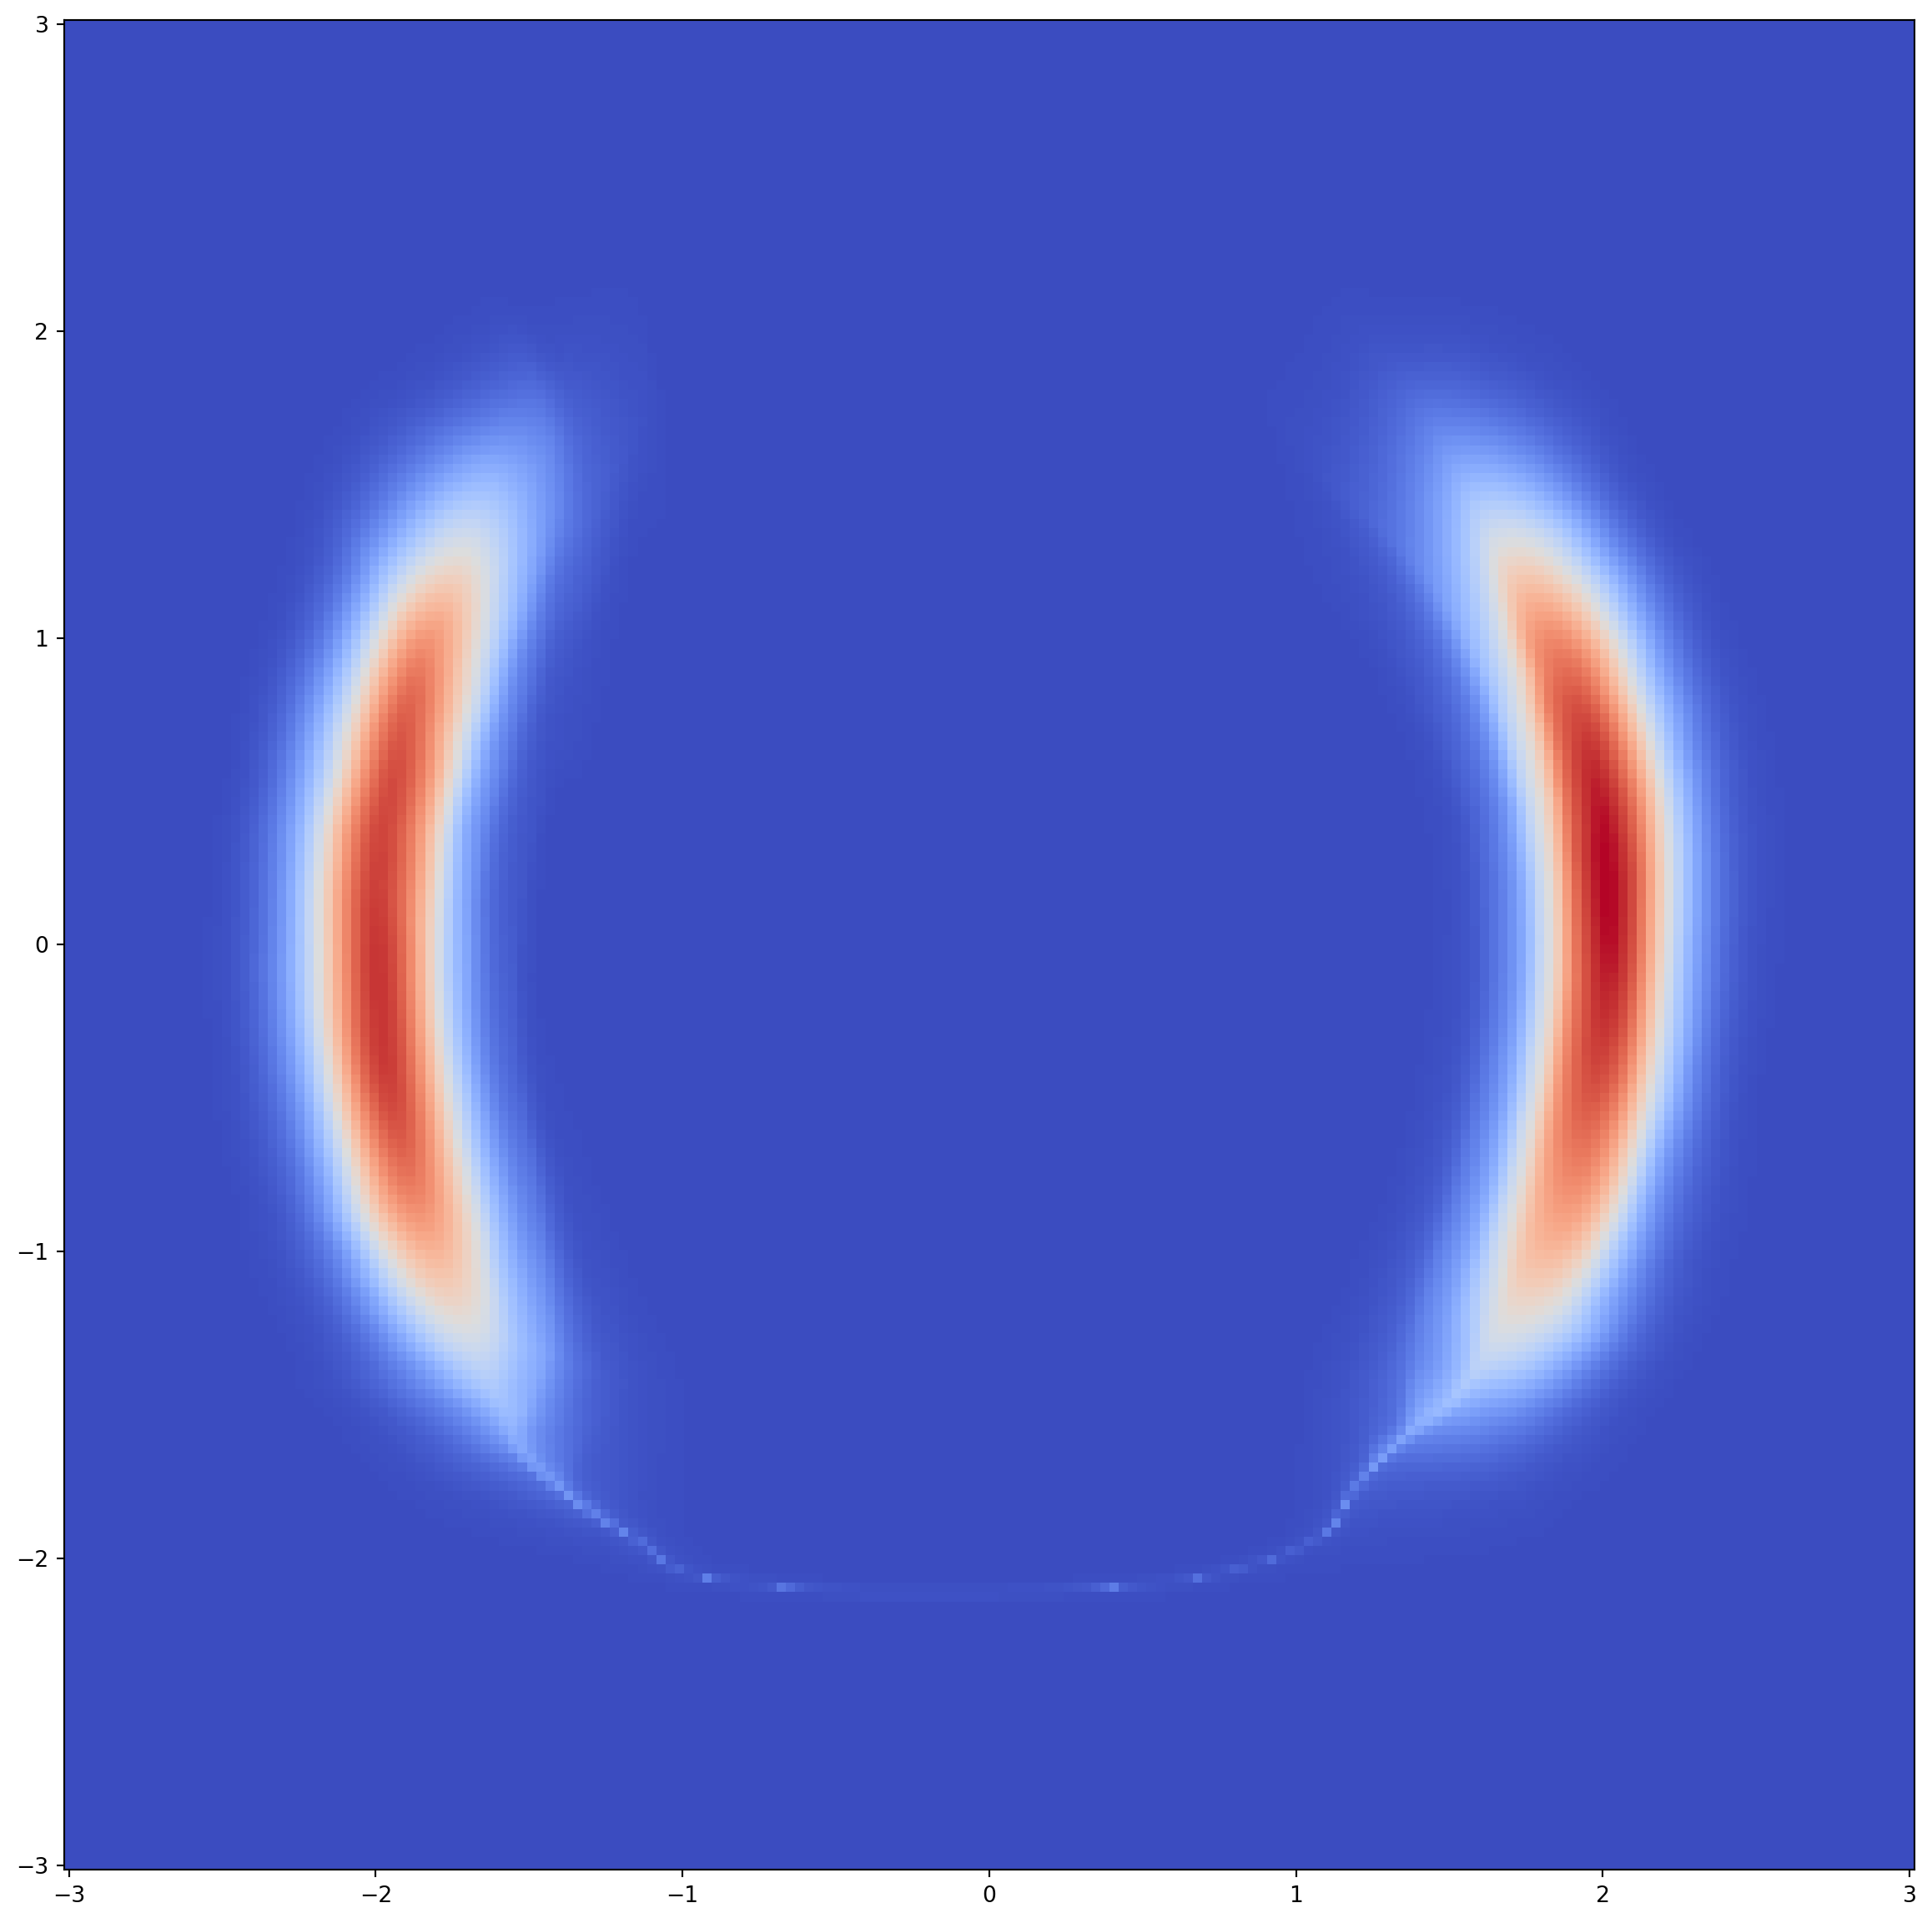

 62%|██████▎   | 2500/4000 [03:14<04:21,  5.74it/s]

 63%|██████▎   | 2502/4000 [03:14<03:37,  6.89it/s]

 63%|██████▎   | 2504/4000 [03:14<03:17,  7.59it/s]

 63%|██████▎   | 2506/4000 [03:14<02:52,  8.67it/s]

 63%|██████▎   | 2508/4000 [03:14<02:35,  9.62it/s]

 63%|██████▎   | 2510/4000 [03:15<02:23, 10.41it/s]

 63%|██████▎   | 2512/4000 [03:15<02:17, 10.80it/s]

 63%|██████▎   | 2514/4000 [03:15<02:11, 11.32it/s]

 63%|██████▎   | 2516/4000 [03:15<02:05, 11.80it/s]

 63%|██████▎   | 2518/4000 [03:15<02:08, 11.56it/s]

 63%|██████▎   | 2520/4000 [03:15<02:04, 11.92it/s]

 63%|██████▎   | 2522/4000 [03:16<02:01, 12.19it/s]

 63%|██████▎   | 2524/4000 [03:16<02:28,  9.97it/s]

 63%|██████▎   | 2526/4000 [03:16<02:16, 10.76it/s]

 63%|██████▎   | 2528/4000 [03:16<02:08, 11.44it/s]

 63%|██████▎   | 2530/4000 [03:16<02:03, 11.93it/s]

 63%|██████▎   | 2532/4000 [03:16<01:58, 12.36it/s]

 63%|██████▎   | 2534/4000 [03:17<02:01, 12.06it/s]

 63%|██████▎   | 2536/4000 [03:17<01:59, 12.27it/s]

 63%|██████▎   | 2538/4000 [03:17<01:57, 12.47it/s]

 64%|██████▎   | 2540/4000 [03:17<01:55, 12.66it/s]

 64%|██████▎   | 2542/4000 [03:17<01:54, 12.73it/s]

 64%|██████▎   | 2544/4000 [03:17<01:55, 12.65it/s]

 64%|██████▎   | 2546/4000 [03:18<01:56, 12.51it/s]

 64%|██████▎   | 2548/4000 [03:18<01:54, 12.71it/s]

 64%|██████▍   | 2550/4000 [03:18<01:52, 12.92it/s]

 64%|██████▍   | 2552/4000 [03:18<01:51, 13.03it/s]

 64%|██████▍   | 2554/4000 [03:18<01:49, 13.16it/s]

 64%|██████▍   | 2556/4000 [03:18<01:54, 12.62it/s]

 64%|██████▍   | 2558/4000 [03:18<01:53, 12.68it/s]

 64%|██████▍   | 2560/4000 [03:19<01:52, 12.85it/s]

 64%|██████▍   | 2562/4000 [03:19<01:52, 12.80it/s]

 64%|██████▍   | 2564/4000 [03:19<01:53, 12.68it/s]

 64%|██████▍   | 2566/4000 [03:19<01:52, 12.74it/s]

 64%|██████▍   | 2568/4000 [03:19<01:51, 12.89it/s]

 64%|██████▍   | 2570/4000 [03:19<01:49, 13.02it/s]

 64%|██████▍   | 2572/4000 [03:20<01:49, 13.01it/s]

 64%|██████▍   | 2574/4000 [03:20<01:49, 13.07it/s]

 64%|██████▍   | 2576/4000 [03:20<01:49, 13.00it/s]

 64%|██████▍   | 2578/4000 [03:20<01:49, 12.94it/s]

 64%|██████▍   | 2580/4000 [03:20<01:49, 12.96it/s]

 65%|██████▍   | 2582/4000 [03:20<01:48, 13.10it/s]

 65%|██████▍   | 2584/4000 [03:20<01:48, 13.11it/s]

 65%|██████▍   | 2586/4000 [03:21<01:48, 13.05it/s]

 65%|██████▍   | 2588/4000 [03:21<01:48, 13.06it/s]

 65%|██████▍   | 2590/4000 [03:21<01:47, 13.16it/s]

 65%|██████▍   | 2592/4000 [03:21<01:46, 13.26it/s]

 65%|██████▍   | 2594/4000 [03:21<01:45, 13.35it/s]

 65%|██████▍   | 2596/4000 [03:21<01:47, 13.10it/s]

 65%|██████▍   | 2598/4000 [03:22<01:48, 12.93it/s]

 65%|██████▌   | 2600/4000 [03:22<01:48, 12.85it/s]

 65%|██████▌   | 2602/4000 [03:22<01:49, 12.76it/s]

 65%|██████▌   | 2604/4000 [03:22<01:49, 12.72it/s]

 65%|██████▌   | 2606/4000 [03:22<01:51, 12.56it/s]

 65%|██████▌   | 2608/4000 [03:22<01:50, 12.58it/s]

 65%|██████▌   | 2610/4000 [03:23<01:53, 12.26it/s]

 65%|██████▌   | 2612/4000 [03:23<01:53, 12.27it/s]

 65%|██████▌   | 2614/4000 [03:23<01:53, 12.17it/s]

 65%|██████▌   | 2616/4000 [03:23<01:53, 12.20it/s]

 65%|██████▌   | 2618/4000 [03:23<01:55, 11.98it/s]

 66%|██████▌   | 2620/4000 [03:23<01:52, 12.25it/s]

 66%|██████▌   | 2622/4000 [03:23<01:49, 12.56it/s]

 66%|██████▌   | 2624/4000 [03:24<01:47, 12.79it/s]

 66%|██████▌   | 2626/4000 [03:24<01:45, 12.98it/s]

 66%|██████▌   | 2628/4000 [03:24<01:44, 13.08it/s]

 66%|██████▌   | 2630/4000 [03:24<01:43, 13.20it/s]

 66%|██████▌   | 2632/4000 [03:24<01:43, 13.26it/s]

 66%|██████▌   | 2634/4000 [03:24<01:42, 13.27it/s]

 66%|██████▌   | 2636/4000 [03:25<01:44, 13.03it/s]

 66%|██████▌   | 2638/4000 [03:25<01:44, 13.05it/s]

 66%|██████▌   | 2640/4000 [03:25<01:43, 13.17it/s]

 66%|██████▌   | 2642/4000 [03:25<01:43, 13.12it/s]

 66%|██████▌   | 2644/4000 [03:25<01:43, 13.16it/s]

 66%|██████▌   | 2646/4000 [03:25<01:42, 13.21it/s]

 66%|██████▌   | 2648/4000 [03:25<01:43, 13.09it/s]

 66%|██████▋   | 2650/4000 [03:26<01:43, 13.09it/s]

 66%|██████▋   | 2652/4000 [03:26<01:45, 12.83it/s]

 66%|██████▋   | 2654/4000 [03:26<01:47, 12.56it/s]

 66%|██████▋   | 2656/4000 [03:26<01:47, 12.53it/s]

 66%|██████▋   | 2658/4000 [03:26<01:46, 12.57it/s]

 66%|██████▋   | 2660/4000 [03:26<01:45, 12.74it/s]

 67%|██████▋   | 2662/4000 [03:27<01:44, 12.83it/s]

 67%|██████▋   | 2664/4000 [03:27<01:42, 12.98it/s]

 67%|██████▋   | 2666/4000 [03:27<01:41, 13.11it/s]

 67%|██████▋   | 2668/4000 [03:27<01:40, 13.24it/s]

 67%|██████▋   | 2670/4000 [03:27<01:39, 13.31it/s]

 67%|██████▋   | 2672/4000 [03:27<01:40, 13.17it/s]

 67%|██████▋   | 2674/4000 [03:27<01:40, 13.23it/s]

 67%|██████▋   | 2676/4000 [03:28<01:39, 13.26it/s]

 67%|██████▋   | 2678/4000 [03:28<01:39, 13.34it/s]

 67%|██████▋   | 2680/4000 [03:28<01:38, 13.35it/s]

 67%|██████▋   | 2682/4000 [03:28<01:38, 13.31it/s]

 67%|██████▋   | 2684/4000 [03:28<01:38, 13.37it/s]

 67%|██████▋   | 2686/4000 [03:28<01:38, 13.40it/s]

 67%|██████▋   | 2688/4000 [03:29<01:37, 13.42it/s]

 67%|██████▋   | 2690/4000 [03:29<01:37, 13.44it/s]

 67%|██████▋   | 2692/4000 [03:29<01:37, 13.45it/s]

 67%|██████▋   | 2694/4000 [03:29<01:37, 13.39it/s]

 67%|██████▋   | 2696/4000 [03:29<01:37, 13.36it/s]

 67%|██████▋   | 2698/4000 [03:29<01:37, 13.30it/s]

 68%|██████▊   | 2700/4000 [03:29<01:37, 13.35it/s]

 68%|██████▊   | 2702/4000 [03:30<01:37, 13.36it/s]

 68%|██████▊   | 2704/4000 [03:30<01:42, 12.69it/s]

 68%|██████▊   | 2706/4000 [03:30<01:42, 12.65it/s]

 68%|██████▊   | 2708/4000 [03:30<01:41, 12.79it/s]

 68%|██████▊   | 2710/4000 [03:30<01:39, 12.96it/s]

 68%|██████▊   | 2712/4000 [03:30<01:38, 13.08it/s]

 68%|██████▊   | 2714/4000 [03:30<01:37, 13.19it/s]

 68%|██████▊   | 2716/4000 [03:31<01:37, 13.20it/s]

 68%|██████▊   | 2718/4000 [03:31<01:36, 13.25it/s]

 68%|██████▊   | 2720/4000 [03:31<01:36, 13.22it/s]

 68%|██████▊   | 2722/4000 [03:31<01:36, 13.30it/s]

 68%|██████▊   | 2724/4000 [03:31<01:35, 13.33it/s]

 68%|██████▊   | 2726/4000 [03:31<01:35, 13.36it/s]

 68%|██████▊   | 2728/4000 [03:32<01:35, 13.37it/s]

 68%|██████▊   | 2730/4000 [03:32<01:35, 13.33it/s]

 68%|██████▊   | 2732/4000 [03:32<01:35, 13.31it/s]

 68%|██████▊   | 2734/4000 [03:32<01:35, 13.32it/s]

 68%|██████▊   | 2736/4000 [03:32<01:34, 13.31it/s]

 68%|██████▊   | 2738/4000 [03:32<01:35, 13.28it/s]

 68%|██████▊   | 2740/4000 [03:32<01:35, 13.23it/s]

 69%|██████▊   | 2742/4000 [03:33<01:34, 13.25it/s]

 69%|██████▊   | 2744/4000 [03:33<01:34, 13.27it/s]

 69%|██████▊   | 2746/4000 [03:33<01:34, 13.30it/s]

 69%|██████▊   | 2748/4000 [03:33<01:34, 13.20it/s]

 69%|██████▉   | 2750/4000 [03:33<01:35, 13.11it/s]

 69%|██████▉   | 2752/4000 [03:33<01:34, 13.18it/s]

 69%|██████▉   | 2754/4000 [03:34<01:34, 13.25it/s]

 69%|██████▉   | 2756/4000 [03:34<01:33, 13.31it/s]

 69%|██████▉   | 2758/4000 [03:34<01:33, 13.34it/s]

 69%|██████▉   | 2760/4000 [03:34<01:32, 13.40it/s]

 69%|██████▉   | 2762/4000 [03:34<01:32, 13.43it/s]

 69%|██████▉   | 2764/4000 [03:34<01:32, 13.43it/s]

 69%|██████▉   | 2766/4000 [03:34<01:32, 13.39it/s]

 69%|██████▉   | 2768/4000 [03:35<01:31, 13.39it/s]

 69%|██████▉   | 2770/4000 [03:35<01:31, 13.42it/s]

 69%|██████▉   | 2772/4000 [03:35<01:31, 13.44it/s]

 69%|██████▉   | 2774/4000 [03:35<01:31, 13.46it/s]

 69%|██████▉   | 2776/4000 [03:35<01:30, 13.45it/s]

 69%|██████▉   | 2778/4000 [03:35<01:30, 13.47it/s]

 70%|██████▉   | 2780/4000 [03:35<01:30, 13.41it/s]

 70%|██████▉   | 2782/4000 [03:36<01:30, 13.46it/s]

 70%|██████▉   | 2784/4000 [03:36<01:30, 13.46it/s]

 70%|██████▉   | 2786/4000 [03:36<01:30, 13.46it/s]

 70%|██████▉   | 2788/4000 [03:36<01:29, 13.48it/s]

 70%|██████▉   | 2790/4000 [03:36<01:29, 13.47it/s]

 70%|██████▉   | 2792/4000 [03:36<01:29, 13.45it/s]

 70%|██████▉   | 2794/4000 [03:36<01:29, 13.44it/s]

 70%|██████▉   | 2796/4000 [03:37<01:29, 13.46it/s]

 70%|██████▉   | 2798/4000 [03:37<01:29, 13.39it/s]

 70%|███████   | 2800/4000 [03:37<01:30, 13.24it/s]

 70%|███████   | 2802/4000 [03:37<01:30, 13.26it/s]

 70%|███████   | 2804/4000 [03:37<01:29, 13.34it/s]

 70%|███████   | 2806/4000 [03:37<01:29, 13.37it/s]

 70%|███████   | 2808/4000 [03:38<01:28, 13.43it/s]

 70%|███████   | 2810/4000 [03:38<01:28, 13.41it/s]

 70%|███████   | 2812/4000 [03:38<01:28, 13.44it/s]

 70%|███████   | 2814/4000 [03:38<01:28, 13.47it/s]

 70%|███████   | 2816/4000 [03:38<01:27, 13.48it/s]

 70%|███████   | 2818/4000 [03:38<01:27, 13.48it/s]

 70%|███████   | 2820/4000 [03:38<01:27, 13.45it/s]

 71%|███████   | 2822/4000 [03:39<01:27, 13.50it/s]

 71%|███████   | 2824/4000 [03:39<01:27, 13.51it/s]

 71%|███████   | 2826/4000 [03:39<01:27, 13.47it/s]

 71%|███████   | 2828/4000 [03:39<01:26, 13.47it/s]

 71%|███████   | 2830/4000 [03:39<01:26, 13.46it/s]

 71%|███████   | 2832/4000 [03:39<01:27, 13.40it/s]

 71%|███████   | 2834/4000 [03:39<01:27, 13.32it/s]

 71%|███████   | 2836/4000 [03:40<01:27, 13.33it/s]

 71%|███████   | 2838/4000 [03:40<01:26, 13.37it/s]

 71%|███████   | 2840/4000 [03:40<01:26, 13.40it/s]

 71%|███████   | 2842/4000 [03:40<01:26, 13.37it/s]

 71%|███████   | 2844/4000 [03:40<01:26, 13.35it/s]

 71%|███████   | 2846/4000 [03:40<01:26, 13.38it/s]

 71%|███████   | 2848/4000 [03:41<01:25, 13.44it/s]

 71%|███████▏  | 2850/4000 [03:41<01:25, 13.38it/s]

 71%|███████▏  | 2852/4000 [03:41<01:25, 13.39it/s]

 71%|███████▏  | 2854/4000 [03:41<01:25, 13.40it/s]

 71%|███████▏  | 2856/4000 [03:41<01:25, 13.38it/s]

 71%|███████▏  | 2858/4000 [03:41<01:25, 13.32it/s]

 72%|███████▏  | 2860/4000 [03:41<01:25, 13.36it/s]

 72%|███████▏  | 2862/4000 [03:42<01:25, 13.38it/s]

 72%|███████▏  | 2864/4000 [03:42<01:24, 13.40it/s]

 72%|███████▏  | 2866/4000 [03:42<01:24, 13.37it/s]

 72%|███████▏  | 2868/4000 [03:42<01:24, 13.38it/s]

 72%|███████▏  | 2870/4000 [03:42<01:24, 13.41it/s]

 72%|███████▏  | 2872/4000 [03:42<01:24, 13.42it/s]

 72%|███████▏  | 2874/4000 [03:42<01:23, 13.44it/s]

 72%|███████▏  | 2876/4000 [03:43<01:23, 13.42it/s]

 72%|███████▏  | 2878/4000 [03:43<01:23, 13.44it/s]

 72%|███████▏  | 2880/4000 [03:43<01:23, 13.45it/s]

 72%|███████▏  | 2882/4000 [03:43<01:22, 13.48it/s]

 72%|███████▏  | 2884/4000 [03:43<01:22, 13.50it/s]

 72%|███████▏  | 2886/4000 [03:43<01:22, 13.43it/s]

 72%|███████▏  | 2888/4000 [03:43<01:22, 13.43it/s]

 72%|███████▏  | 2890/4000 [03:44<01:22, 13.44it/s]

 72%|███████▏  | 2892/4000 [03:44<01:22, 13.45it/s]

 72%|███████▏  | 2894/4000 [03:44<01:22, 13.44it/s]

 72%|███████▏  | 2896/4000 [03:44<01:22, 13.44it/s]

 72%|███████▏  | 2898/4000 [03:44<01:22, 13.43it/s]

 72%|███████▎  | 2900/4000 [03:44<01:21, 13.47it/s]

 73%|███████▎  | 2902/4000 [03:45<01:21, 13.49it/s]

 73%|███████▎  | 2904/4000 [03:45<01:21, 13.50it/s]

 73%|███████▎  | 2906/4000 [03:45<01:21, 13.47it/s]

 73%|███████▎  | 2908/4000 [03:45<01:21, 13.48it/s]

 73%|███████▎  | 2910/4000 [03:45<01:20, 13.49it/s]

 73%|███████▎  | 2912/4000 [03:45<01:20, 13.47it/s]

 73%|███████▎  | 2914/4000 [03:45<01:20, 13.48it/s]

 73%|███████▎  | 2916/4000 [03:46<01:20, 13.51it/s]

 73%|███████▎  | 2918/4000 [03:46<01:19, 13.54it/s]

 73%|███████▎  | 2920/4000 [03:46<01:19, 13.51it/s]

 73%|███████▎  | 2922/4000 [03:46<01:19, 13.53it/s]

 73%|███████▎  | 2924/4000 [03:46<01:19, 13.54it/s]

 73%|███████▎  | 2926/4000 [03:46<01:19, 13.53it/s]

 73%|███████▎  | 2928/4000 [03:46<01:19, 13.47it/s]

 73%|███████▎  | 2930/4000 [03:47<01:19, 13.38it/s]

 73%|███████▎  | 2932/4000 [03:47<01:20, 13.29it/s]

 73%|███████▎  | 2934/4000 [03:47<01:19, 13.34it/s]

 73%|███████▎  | 2936/4000 [03:47<01:19, 13.36it/s]

 73%|███████▎  | 2938/4000 [03:47<01:19, 13.39it/s]

 74%|███████▎  | 2940/4000 [03:47<01:19, 13.34it/s]

 74%|███████▎  | 2942/4000 [03:48<01:19, 13.38it/s]

 74%|███████▎  | 2944/4000 [03:48<01:18, 13.40it/s]

 74%|███████▎  | 2946/4000 [03:48<01:18, 13.42it/s]

 74%|███████▎  | 2948/4000 [03:48<01:18, 13.44it/s]

 74%|███████▍  | 2950/4000 [03:48<01:18, 13.45it/s]

 74%|███████▍  | 2952/4000 [03:48<01:17, 13.46it/s]

 74%|███████▍  | 2954/4000 [03:48<01:17, 13.43it/s]

 74%|███████▍  | 2956/4000 [03:49<01:17, 13.45it/s]

 74%|███████▍  | 2958/4000 [03:49<01:17, 13.43it/s]

 74%|███████▍  | 2960/4000 [03:49<01:17, 13.42it/s]

 74%|███████▍  | 2962/4000 [03:49<01:17, 13.41it/s]

 74%|███████▍  | 2964/4000 [03:49<01:17, 13.42it/s]

 74%|███████▍  | 2966/4000 [03:49<01:17, 13.42it/s]

 74%|███████▍  | 2968/4000 [03:49<01:16, 13.42it/s]

 74%|███████▍  | 2970/4000 [03:50<01:16, 13.42it/s]

 74%|███████▍  | 2972/4000 [03:50<01:16, 13.43it/s]

 74%|███████▍  | 2974/4000 [03:50<01:16, 13.43it/s]

 74%|███████▍  | 2976/4000 [03:50<01:16, 13.44it/s]

 74%|███████▍  | 2978/4000 [03:50<01:15, 13.47it/s]

 74%|███████▍  | 2980/4000 [03:50<01:15, 13.44it/s]

 75%|███████▍  | 2982/4000 [03:50<01:16, 13.39it/s]

 75%|███████▍  | 2984/4000 [03:51<01:15, 13.42it/s]

 75%|███████▍  | 2986/4000 [03:51<01:15, 13.42it/s]

 75%|███████▍  | 2988/4000 [03:51<01:15, 13.44it/s]

 75%|███████▍  | 2990/4000 [03:51<01:16, 13.28it/s]

 75%|███████▍  | 2992/4000 [03:51<01:15, 13.33it/s]

 75%|███████▍  | 2994/4000 [03:51<01:15, 13.36it/s]

 75%|███████▍  | 2996/4000 [03:52<01:14, 13.43it/s]

 75%|███████▍  | 2998/4000 [03:52<01:14, 13.46it/s]

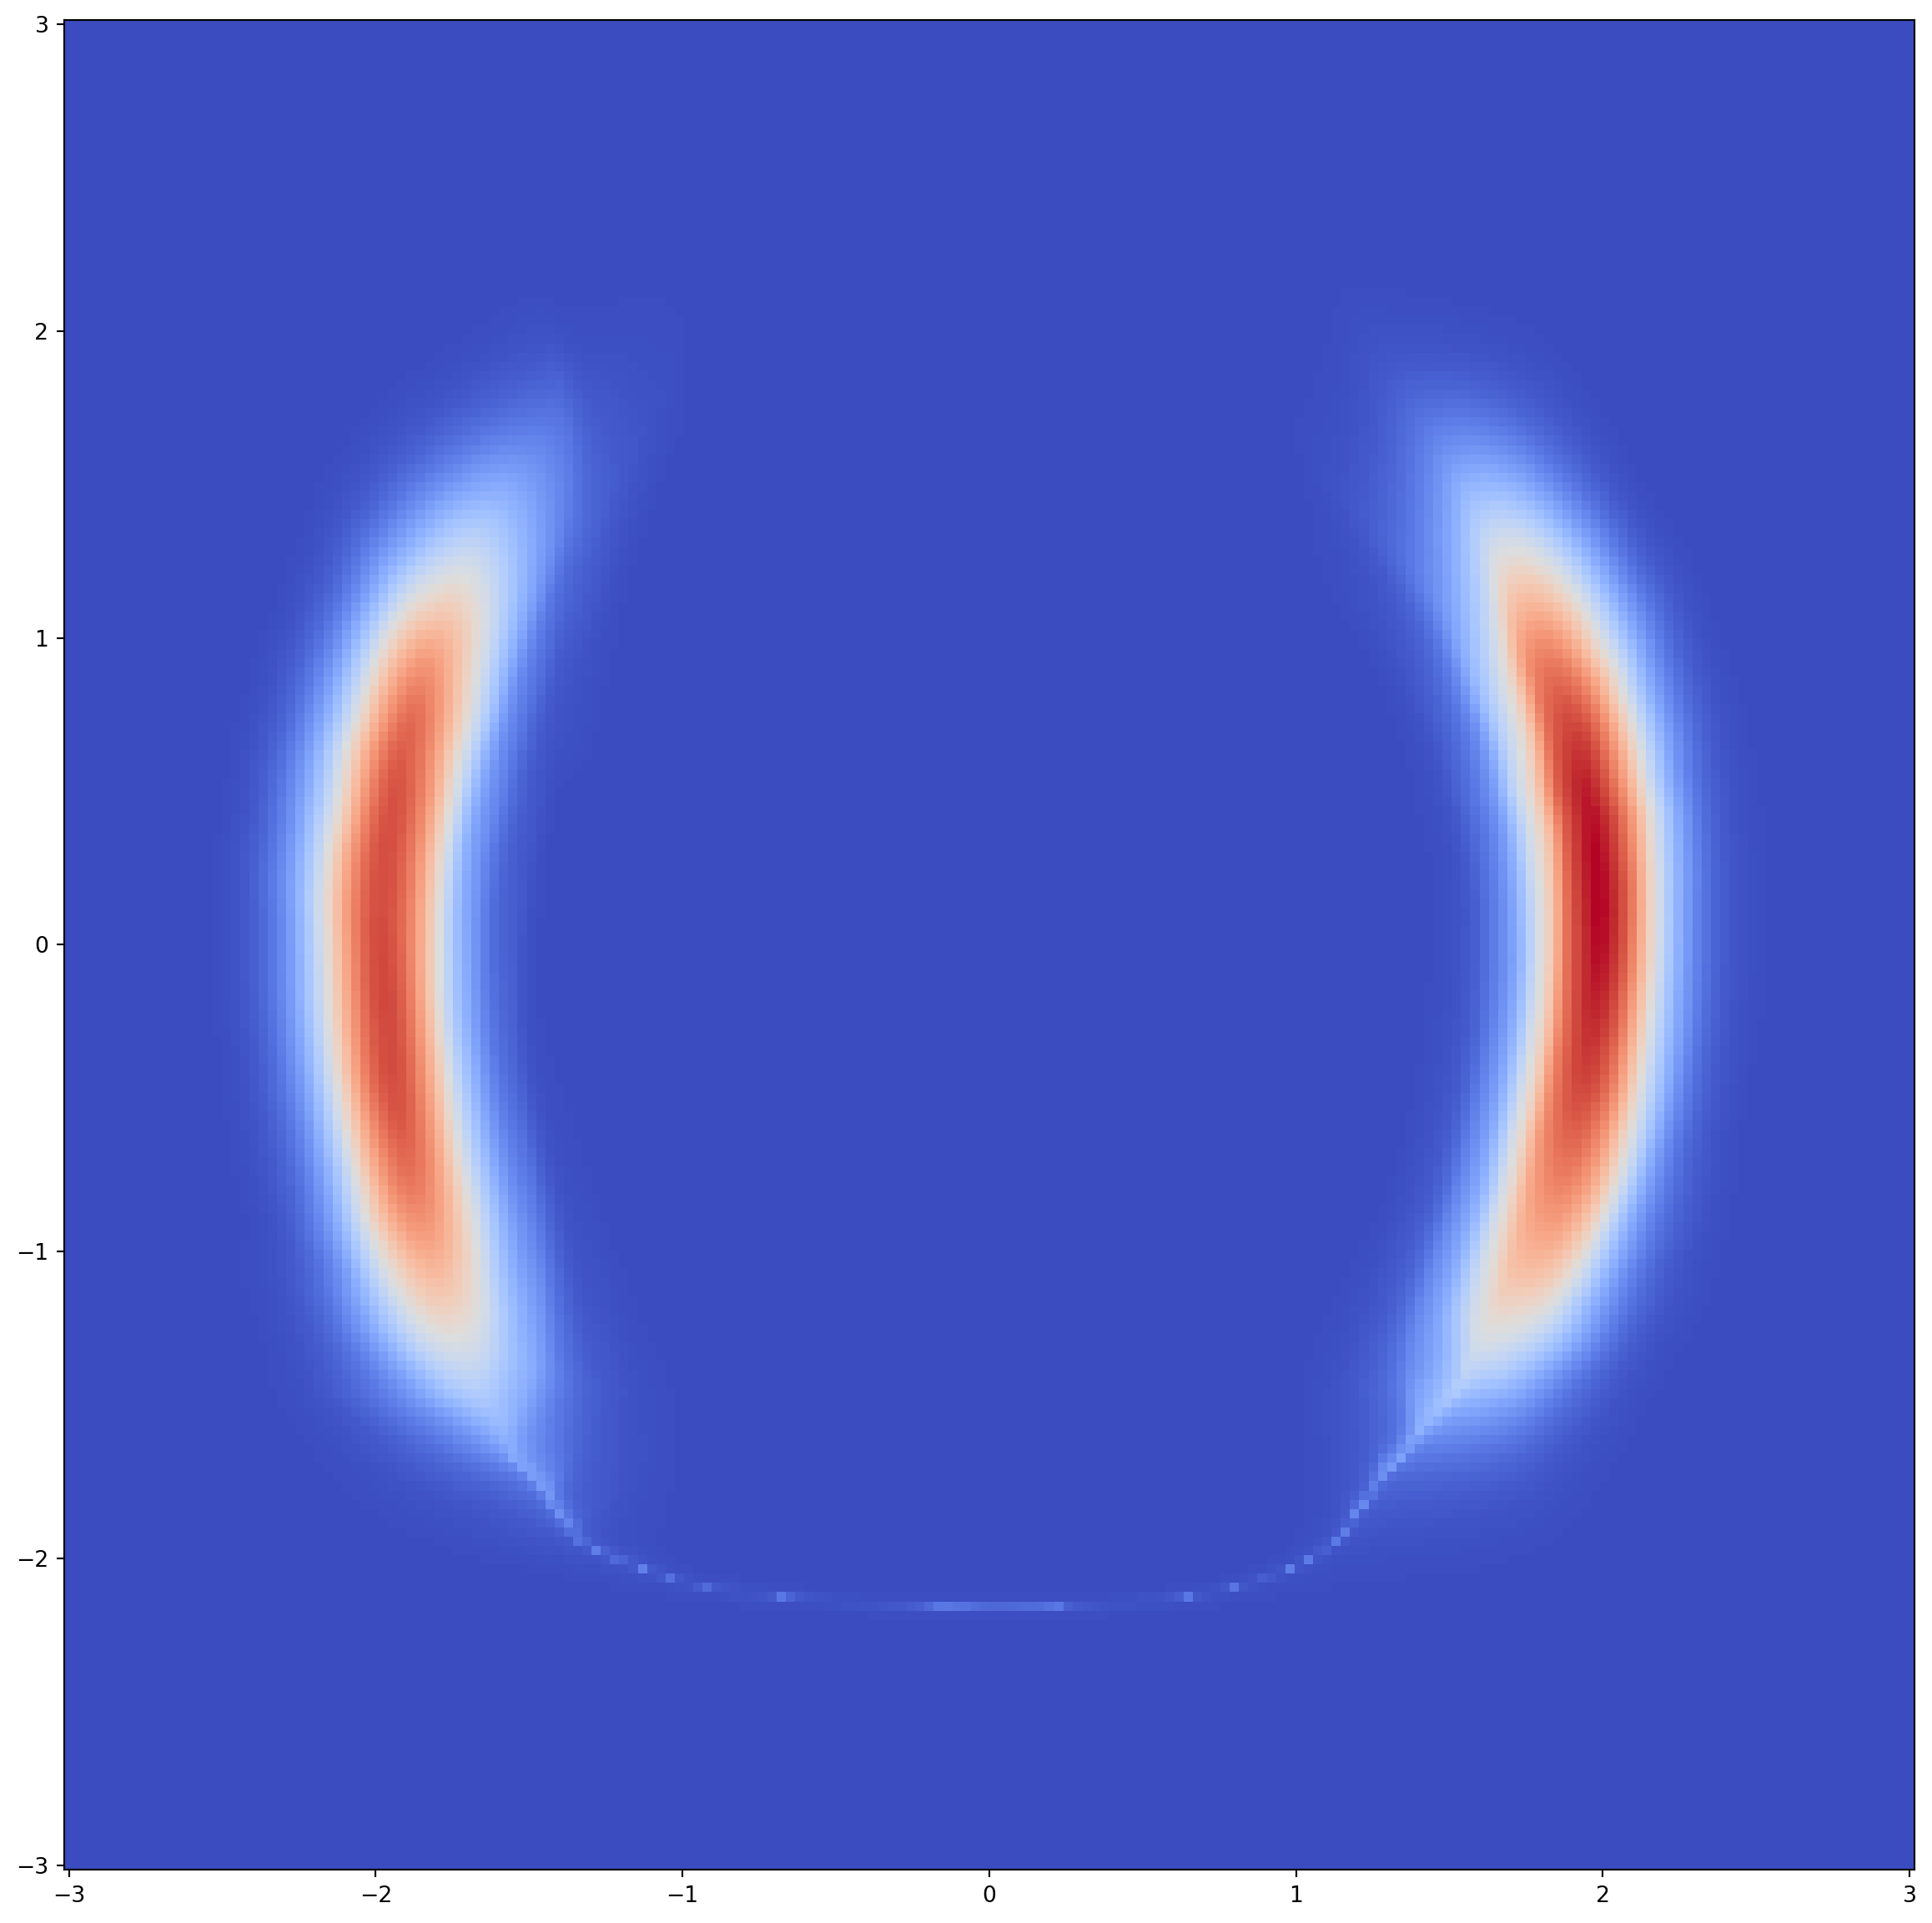

 75%|███████▌  | 3000/4000 [03:52<02:54,  5.72it/s]

 75%|███████▌  | 3002/4000 [03:53<02:25,  6.84it/s]

 75%|███████▌  | 3004/4000 [03:53<02:05,  7.92it/s]

 75%|███████▌  | 3006/4000 [03:53<01:51,  8.92it/s]

 75%|███████▌  | 3008/4000 [03:53<01:40,  9.85it/s]

 75%|███████▌  | 3010/4000 [03:53<01:32, 10.68it/s]

 75%|███████▌  | 3012/4000 [03:53<01:26, 11.37it/s]

 75%|███████▌  | 3014/4000 [03:54<01:22, 11.92it/s]

 75%|███████▌  | 3016/4000 [03:54<01:20, 12.30it/s]

 75%|███████▌  | 3018/4000 [03:54<01:18, 12.46it/s]

 76%|███████▌  | 3020/4000 [03:54<01:18, 12.50it/s]

 76%|███████▌  | 3022/4000 [03:54<01:16, 12.70it/s]

 76%|███████▌  | 3024/4000 [03:54<01:15, 12.88it/s]

 76%|███████▌  | 3026/4000 [03:54<01:14, 13.06it/s]

 76%|███████▌  | 3028/4000 [03:55<01:13, 13.17it/s]

 76%|███████▌  | 3030/4000 [03:55<01:13, 13.23it/s]

 76%|███████▌  | 3032/4000 [03:55<01:12, 13.26it/s]

 76%|███████▌  | 3034/4000 [03:55<01:12, 13.28it/s]

 76%|███████▌  | 3036/4000 [03:55<01:12, 13.30it/s]

 76%|███████▌  | 3038/4000 [03:55<01:12, 13.35it/s]

 76%|███████▌  | 3040/4000 [03:56<01:11, 13.36it/s]

 76%|███████▌  | 3042/4000 [03:56<01:11, 13.37it/s]

 76%|███████▌  | 3044/4000 [03:56<01:11, 13.37it/s]

 76%|███████▌  | 3046/4000 [03:56<01:11, 13.42it/s]

 76%|███████▌  | 3048/4000 [03:56<01:11, 13.39it/s]

 76%|███████▋  | 3050/4000 [03:56<01:11, 13.35it/s]

 76%|███████▋  | 3052/4000 [03:56<01:11, 13.35it/s]

 76%|███████▋  | 3054/4000 [03:57<01:10, 13.40it/s]

 76%|███████▋  | 3056/4000 [03:57<01:10, 13.42it/s]

 76%|███████▋  | 3058/4000 [03:57<01:10, 13.41it/s]

 76%|███████▋  | 3060/4000 [03:57<01:10, 13.40it/s]

 77%|███████▋  | 3062/4000 [03:57<01:10, 13.39it/s]

 77%|███████▋  | 3064/4000 [03:57<01:09, 13.42it/s]

 77%|███████▋  | 3066/4000 [03:57<01:09, 13.43it/s]

 77%|███████▋  | 3068/4000 [03:58<01:09, 13.43it/s]

 77%|███████▋  | 3070/4000 [03:58<01:09, 13.41it/s]

 77%|███████▋  | 3072/4000 [03:58<01:12, 12.84it/s]

 77%|███████▋  | 3074/4000 [03:58<01:15, 12.28it/s]

 77%|███████▋  | 3076/4000 [03:58<01:13, 12.56it/s]

 77%|███████▋  | 3078/4000 [03:58<01:12, 12.75it/s]

 77%|███████▋  | 3080/4000 [03:59<01:11, 12.85it/s]

 77%|███████▋  | 3082/4000 [03:59<01:10, 12.94it/s]

 77%|███████▋  | 3084/4000 [03:59<01:10, 12.93it/s]

 77%|███████▋  | 3086/4000 [03:59<01:10, 13.02it/s]

 77%|███████▋  | 3088/4000 [03:59<01:09, 13.11it/s]

 77%|███████▋  | 3090/4000 [03:59<01:08, 13.19it/s]

 77%|███████▋  | 3092/4000 [03:59<01:08, 13.21it/s]

 77%|███████▋  | 3094/4000 [04:00<01:08, 13.25it/s]

 77%|███████▋  | 3096/4000 [04:00<01:08, 13.29it/s]

 77%|███████▋  | 3098/4000 [04:00<01:08, 13.21it/s]

 78%|███████▊  | 3100/4000 [04:00<01:08, 13.22it/s]

 78%|███████▊  | 3102/4000 [04:00<01:07, 13.26it/s]

 78%|███████▊  | 3104/4000 [04:00<01:08, 13.11it/s]

 78%|███████▊  | 3106/4000 [04:01<01:07, 13.18it/s]

 78%|███████▊  | 3108/4000 [04:01<01:07, 13.20it/s]

 78%|███████▊  | 3110/4000 [04:01<01:07, 13.25it/s]

 78%|███████▊  | 3112/4000 [04:01<01:06, 13.29it/s]

 78%|███████▊  | 3114/4000 [04:01<01:06, 13.27it/s]

 78%|███████▊  | 3116/4000 [04:01<01:06, 13.30it/s]

 78%|███████▊  | 3118/4000 [04:01<01:06, 13.35it/s]

 78%|███████▊  | 3120/4000 [04:02<01:05, 13.36it/s]

 78%|███████▊  | 3122/4000 [04:02<01:05, 13.35it/s]

 78%|███████▊  | 3124/4000 [04:02<01:05, 13.36it/s]

 78%|███████▊  | 3126/4000 [04:02<01:05, 13.27it/s]

 78%|███████▊  | 3128/4000 [04:02<01:06, 13.17it/s]

 78%|███████▊  | 3130/4000 [04:02<01:05, 13.22it/s]

 78%|███████▊  | 3132/4000 [04:03<01:05, 13.20it/s]

 78%|███████▊  | 3134/4000 [04:03<01:05, 13.21it/s]

 78%|███████▊  | 3136/4000 [04:03<01:05, 13.23it/s]

 78%|███████▊  | 3138/4000 [04:03<01:13, 11.66it/s]

 78%|███████▊  | 3140/4000 [04:03<01:11, 12.02it/s]

 79%|███████▊  | 3142/4000 [04:03<01:11, 12.01it/s]

 79%|███████▊  | 3144/4000 [04:03<01:09, 12.36it/s]

 79%|███████▊  | 3146/4000 [04:04<01:07, 12.65it/s]

 79%|███████▊  | 3148/4000 [04:04<01:06, 12.87it/s]

 79%|███████▉  | 3150/4000 [04:04<01:05, 12.99it/s]

 79%|███████▉  | 3152/4000 [04:04<01:04, 13.09it/s]

 79%|███████▉  | 3154/4000 [04:04<01:04, 13.17it/s]

 79%|███████▉  | 3156/4000 [04:04<01:03, 13.24it/s]

 79%|███████▉  | 3158/4000 [04:05<01:03, 13.30it/s]

 79%|███████▉  | 3160/4000 [04:05<01:02, 13.36it/s]

 79%|███████▉  | 3162/4000 [04:05<01:02, 13.37it/s]

 79%|███████▉  | 3164/4000 [04:05<01:02, 13.29it/s]

 79%|███████▉  | 3166/4000 [04:05<01:02, 13.27it/s]

 79%|███████▉  | 3168/4000 [04:05<01:02, 13.32it/s]

 79%|███████▉  | 3170/4000 [04:05<01:02, 13.29it/s]

 79%|███████▉  | 3172/4000 [04:06<01:02, 13.24it/s]

 79%|███████▉  | 3174/4000 [04:06<01:02, 13.32it/s]

 79%|███████▉  | 3176/4000 [04:06<01:01, 13.31it/s]

 79%|███████▉  | 3178/4000 [04:06<01:01, 13.32it/s]

 80%|███████▉  | 3180/4000 [04:06<01:01, 13.33it/s]

 80%|███████▉  | 3182/4000 [04:06<01:01, 13.39it/s]

 80%|███████▉  | 3184/4000 [04:06<01:00, 13.38it/s]

 80%|███████▉  | 3186/4000 [04:07<01:00, 13.38it/s]

 80%|███████▉  | 3188/4000 [04:07<01:00, 13.41it/s]

 80%|███████▉  | 3190/4000 [04:07<01:00, 13.43it/s]

 80%|███████▉  | 3192/4000 [04:07<01:00, 13.40it/s]

 80%|███████▉  | 3194/4000 [04:07<01:00, 13.42it/s]

 80%|███████▉  | 3196/4000 [04:07<00:59, 13.44it/s]

 80%|███████▉  | 3198/4000 [04:08<00:59, 13.40it/s]

 80%|████████  | 3200/4000 [04:08<00:59, 13.45it/s]

 80%|████████  | 3202/4000 [04:08<00:59, 13.50it/s]

 80%|████████  | 3204/4000 [04:08<00:58, 13.51it/s]

 80%|████████  | 3206/4000 [04:08<00:58, 13.53it/s]

 80%|████████  | 3208/4000 [04:08<00:58, 13.51it/s]

 80%|████████  | 3210/4000 [04:08<00:58, 13.51it/s]

 80%|████████  | 3212/4000 [04:09<00:58, 13.53it/s]

 80%|████████  | 3214/4000 [04:09<00:58, 13.53it/s]

 80%|████████  | 3216/4000 [04:09<00:57, 13.56it/s]

 80%|████████  | 3218/4000 [04:09<00:58, 13.41it/s]

 80%|████████  | 3220/4000 [04:09<00:58, 13.27it/s]

 81%|████████  | 3222/4000 [04:09<00:58, 13.29it/s]

 81%|████████  | 3224/4000 [04:09<00:59, 13.00it/s]

 81%|████████  | 3226/4000 [04:10<00:59, 13.01it/s]

 81%|████████  | 3228/4000 [04:10<01:00, 12.81it/s]

 81%|████████  | 3230/4000 [04:10<01:01, 12.47it/s]

 81%|████████  | 3232/4000 [04:10<01:01, 12.49it/s]

 81%|████████  | 3234/4000 [04:10<01:01, 12.36it/s]

 81%|████████  | 3236/4000 [04:10<01:02, 12.27it/s]

 81%|████████  | 3238/4000 [04:11<01:01, 12.41it/s]

 81%|████████  | 3240/4000 [04:11<00:59, 12.68it/s]

 81%|████████  | 3242/4000 [04:11<00:58, 12.90it/s]

 81%|████████  | 3244/4000 [04:11<00:57, 13.07it/s]

 81%|████████  | 3246/4000 [04:11<00:57, 13.20it/s]

 81%|████████  | 3248/4000 [04:11<00:56, 13.28it/s]

 81%|████████▏ | 3250/4000 [04:12<00:56, 13.33it/s]

 81%|████████▏ | 3252/4000 [04:12<00:55, 13.36it/s]

 81%|████████▏ | 3254/4000 [04:12<00:55, 13.42it/s]

 81%|████████▏ | 3256/4000 [04:12<00:55, 13.41it/s]

 81%|████████▏ | 3258/4000 [04:12<00:55, 13.46it/s]

 82%|████████▏ | 3260/4000 [04:12<00:54, 13.48it/s]

 82%|████████▏ | 3262/4000 [04:12<00:54, 13.45it/s]

 82%|████████▏ | 3264/4000 [04:13<00:54, 13.49it/s]

 82%|████████▏ | 3266/4000 [04:13<00:54, 13.51it/s]

 82%|████████▏ | 3268/4000 [04:13<00:54, 13.50it/s]

 82%|████████▏ | 3270/4000 [04:13<00:54, 13.48it/s]

 82%|████████▏ | 3272/4000 [04:13<00:53, 13.52it/s]

 82%|████████▏ | 3274/4000 [04:13<00:53, 13.55it/s]

 82%|████████▏ | 3276/4000 [04:13<00:53, 13.54it/s]

 82%|████████▏ | 3278/4000 [04:14<00:53, 13.54it/s]

 82%|████████▏ | 3280/4000 [04:14<00:53, 13.53it/s]

 82%|████████▏ | 3282/4000 [04:14<00:53, 13.47it/s]

 82%|████████▏ | 3284/4000 [04:14<00:53, 13.42it/s]

 82%|████████▏ | 3286/4000 [04:14<00:53, 13.30it/s]

 82%|████████▏ | 3288/4000 [04:14<00:53, 13.36it/s]

 82%|████████▏ | 3290/4000 [04:14<00:52, 13.41it/s]

 82%|████████▏ | 3292/4000 [04:15<00:52, 13.48it/s]

 82%|████████▏ | 3294/4000 [04:15<00:52, 13.51it/s]

 82%|████████▏ | 3296/4000 [04:15<00:52, 13.48it/s]

 82%|████████▏ | 3298/4000 [04:15<00:52, 13.48it/s]

 82%|████████▎ | 3300/4000 [04:15<00:51, 13.52it/s]

 83%|████████▎ | 3302/4000 [04:15<00:51, 13.53it/s]

 83%|████████▎ | 3304/4000 [04:16<00:51, 13.48it/s]

 83%|████████▎ | 3306/4000 [04:16<00:51, 13.49it/s]

 83%|████████▎ | 3308/4000 [04:16<00:51, 13.49it/s]

 83%|████████▎ | 3310/4000 [04:16<00:51, 13.49it/s]

 83%|████████▎ | 3312/4000 [04:16<00:50, 13.53it/s]

 83%|████████▎ | 3314/4000 [04:16<00:50, 13.53it/s]

 83%|████████▎ | 3316/4000 [04:16<00:50, 13.55it/s]

 83%|████████▎ | 3318/4000 [04:17<00:50, 13.50it/s]

 83%|████████▎ | 3320/4000 [04:17<00:50, 13.50it/s]

 83%|████████▎ | 3322/4000 [04:17<00:50, 13.51it/s]

 83%|████████▎ | 3324/4000 [04:17<00:50, 13.46it/s]

 83%|████████▎ | 3326/4000 [04:17<00:49, 13.49it/s]

 83%|████████▎ | 3328/4000 [04:17<00:49, 13.51it/s]

 83%|████████▎ | 3330/4000 [04:17<00:49, 13.53it/s]

 83%|████████▎ | 3332/4000 [04:18<00:49, 13.56it/s]

 83%|████████▎ | 3334/4000 [04:18<00:49, 13.46it/s]

 83%|████████▎ | 3336/4000 [04:18<00:49, 13.46it/s]

 83%|████████▎ | 3338/4000 [04:18<00:49, 13.50it/s]

 84%|████████▎ | 3340/4000 [04:18<00:48, 13.50it/s]

 84%|████████▎ | 3342/4000 [04:18<00:48, 13.49it/s]

 84%|████████▎ | 3344/4000 [04:18<00:48, 13.49it/s]

 84%|████████▎ | 3346/4000 [04:19<00:48, 13.52it/s]

 84%|████████▎ | 3348/4000 [04:19<00:48, 13.52it/s]

 84%|████████▍ | 3350/4000 [04:19<00:48, 13.49it/s]

 84%|████████▍ | 3352/4000 [04:19<00:48, 13.37it/s]

 84%|████████▍ | 3354/4000 [04:19<00:48, 13.32it/s]

 84%|████████▍ | 3356/4000 [04:19<00:50, 12.70it/s]

 84%|████████▍ | 3358/4000 [04:20<00:52, 12.33it/s]

 84%|████████▍ | 3360/4000 [04:20<00:51, 12.40it/s]

 84%|████████▍ | 3362/4000 [04:20<00:52, 12.18it/s]

 84%|████████▍ | 3364/4000 [04:20<00:51, 12.27it/s]

 84%|████████▍ | 3366/4000 [04:20<00:54, 11.67it/s]

 84%|████████▍ | 3368/4000 [04:20<00:53, 11.90it/s]

 84%|████████▍ | 3370/4000 [04:21<00:53, 11.81it/s]

 84%|████████▍ | 3372/4000 [04:21<00:52, 11.90it/s]

 84%|████████▍ | 3374/4000 [04:21<00:51, 12.11it/s]

 84%|████████▍ | 3376/4000 [04:21<00:55, 11.21it/s]

 84%|████████▍ | 3378/4000 [04:21<00:55, 11.29it/s]

 84%|████████▍ | 3380/4000 [04:21<00:53, 11.51it/s]

 85%|████████▍ | 3382/4000 [04:22<00:52, 11.79it/s]

 85%|████████▍ | 3384/4000 [04:22<00:52, 11.72it/s]

 85%|████████▍ | 3386/4000 [04:22<00:50, 12.05it/s]

 85%|████████▍ | 3388/4000 [04:22<00:49, 12.41it/s]

 85%|████████▍ | 3390/4000 [04:22<00:48, 12.69it/s]

 85%|████████▍ | 3392/4000 [04:22<00:47, 12.92it/s]

 85%|████████▍ | 3394/4000 [04:23<00:46, 13.11it/s]

 85%|████████▍ | 3396/4000 [04:23<00:45, 13.20it/s]

 85%|████████▍ | 3398/4000 [04:23<00:45, 13.28it/s]

 85%|████████▌ | 3400/4000 [04:23<00:45, 13.33it/s]

 85%|████████▌ | 3402/4000 [04:23<00:44, 13.37it/s]

 85%|████████▌ | 3404/4000 [04:23<00:44, 13.44it/s]

 85%|████████▌ | 3406/4000 [04:23<00:44, 13.46it/s]

 85%|████████▌ | 3408/4000 [04:24<00:43, 13.48it/s]

 85%|████████▌ | 3410/4000 [04:24<00:43, 13.47it/s]

 85%|████████▌ | 3412/4000 [04:24<00:43, 13.52it/s]

 85%|████████▌ | 3414/4000 [04:24<00:43, 13.60it/s]

 85%|████████▌ | 3416/4000 [04:24<00:42, 13.64it/s]

 85%|████████▌ | 3418/4000 [04:24<00:42, 13.68it/s]

 86%|████████▌ | 3420/4000 [04:24<00:42, 13.65it/s]

 86%|████████▌ | 3422/4000 [04:25<00:42, 13.66it/s]

 86%|████████▌ | 3424/4000 [04:25<00:42, 13.60it/s]

 86%|████████▌ | 3426/4000 [04:25<00:42, 13.64it/s]

 86%|████████▌ | 3428/4000 [04:25<00:41, 13.65it/s]

 86%|████████▌ | 3430/4000 [04:25<00:42, 13.55it/s]

 86%|████████▌ | 3432/4000 [04:25<00:42, 13.42it/s]

 86%|████████▌ | 3434/4000 [04:25<00:42, 13.45it/s]

 86%|████████▌ | 3436/4000 [04:26<00:41, 13.50it/s]

 86%|████████▌ | 3438/4000 [04:26<00:41, 13.53it/s]

 86%|████████▌ | 3440/4000 [04:26<00:41, 13.57it/s]

 86%|████████▌ | 3442/4000 [04:26<00:40, 13.62it/s]

 86%|████████▌ | 3444/4000 [04:26<00:40, 13.62it/s]

 86%|████████▌ | 3446/4000 [04:26<00:40, 13.63it/s]

 86%|████████▌ | 3448/4000 [04:27<00:40, 13.56it/s]

 86%|████████▋ | 3450/4000 [04:27<00:40, 13.55it/s]

 86%|████████▋ | 3452/4000 [04:27<00:47, 11.63it/s]

 86%|████████▋ | 3454/4000 [04:27<00:45, 12.07it/s]

 86%|████████▋ | 3456/4000 [04:27<00:43, 12.47it/s]

 86%|████████▋ | 3458/4000 [04:27<00:42, 12.75it/s]

 86%|████████▋ | 3460/4000 [04:27<00:41, 12.96it/s]

 87%|████████▋ | 3462/4000 [04:28<00:41, 13.06it/s]

 87%|████████▋ | 3464/4000 [04:28<00:40, 13.14it/s]

 87%|████████▋ | 3466/4000 [04:28<00:40, 13.22it/s]

 87%|████████▋ | 3468/4000 [04:28<00:39, 13.30it/s]

 87%|████████▋ | 3470/4000 [04:28<00:40, 13.24it/s]

 87%|████████▋ | 3472/4000 [04:28<00:39, 13.31it/s]

 87%|████████▋ | 3474/4000 [04:29<00:39, 13.37it/s]

 87%|████████▋ | 3476/4000 [04:29<00:39, 13.38it/s]

 87%|████████▋ | 3478/4000 [04:29<00:39, 13.37it/s]

 87%|████████▋ | 3480/4000 [04:29<00:39, 13.14it/s]

 87%|████████▋ | 3482/4000 [04:29<00:39, 13.10it/s]

 87%|████████▋ | 3484/4000 [04:29<00:39, 13.21it/s]

 87%|████████▋ | 3486/4000 [04:29<00:38, 13.29it/s]

 87%|████████▋ | 3488/4000 [04:30<00:38, 13.33it/s]

 87%|████████▋ | 3490/4000 [04:30<00:38, 13.33it/s]

 87%|████████▋ | 3492/4000 [04:30<00:37, 13.37it/s]

 87%|████████▋ | 3494/4000 [04:30<00:37, 13.43it/s]

 87%|████████▋ | 3496/4000 [04:30<00:37, 13.41it/s]

 87%|████████▋ | 3498/4000 [04:30<00:38, 13.07it/s]

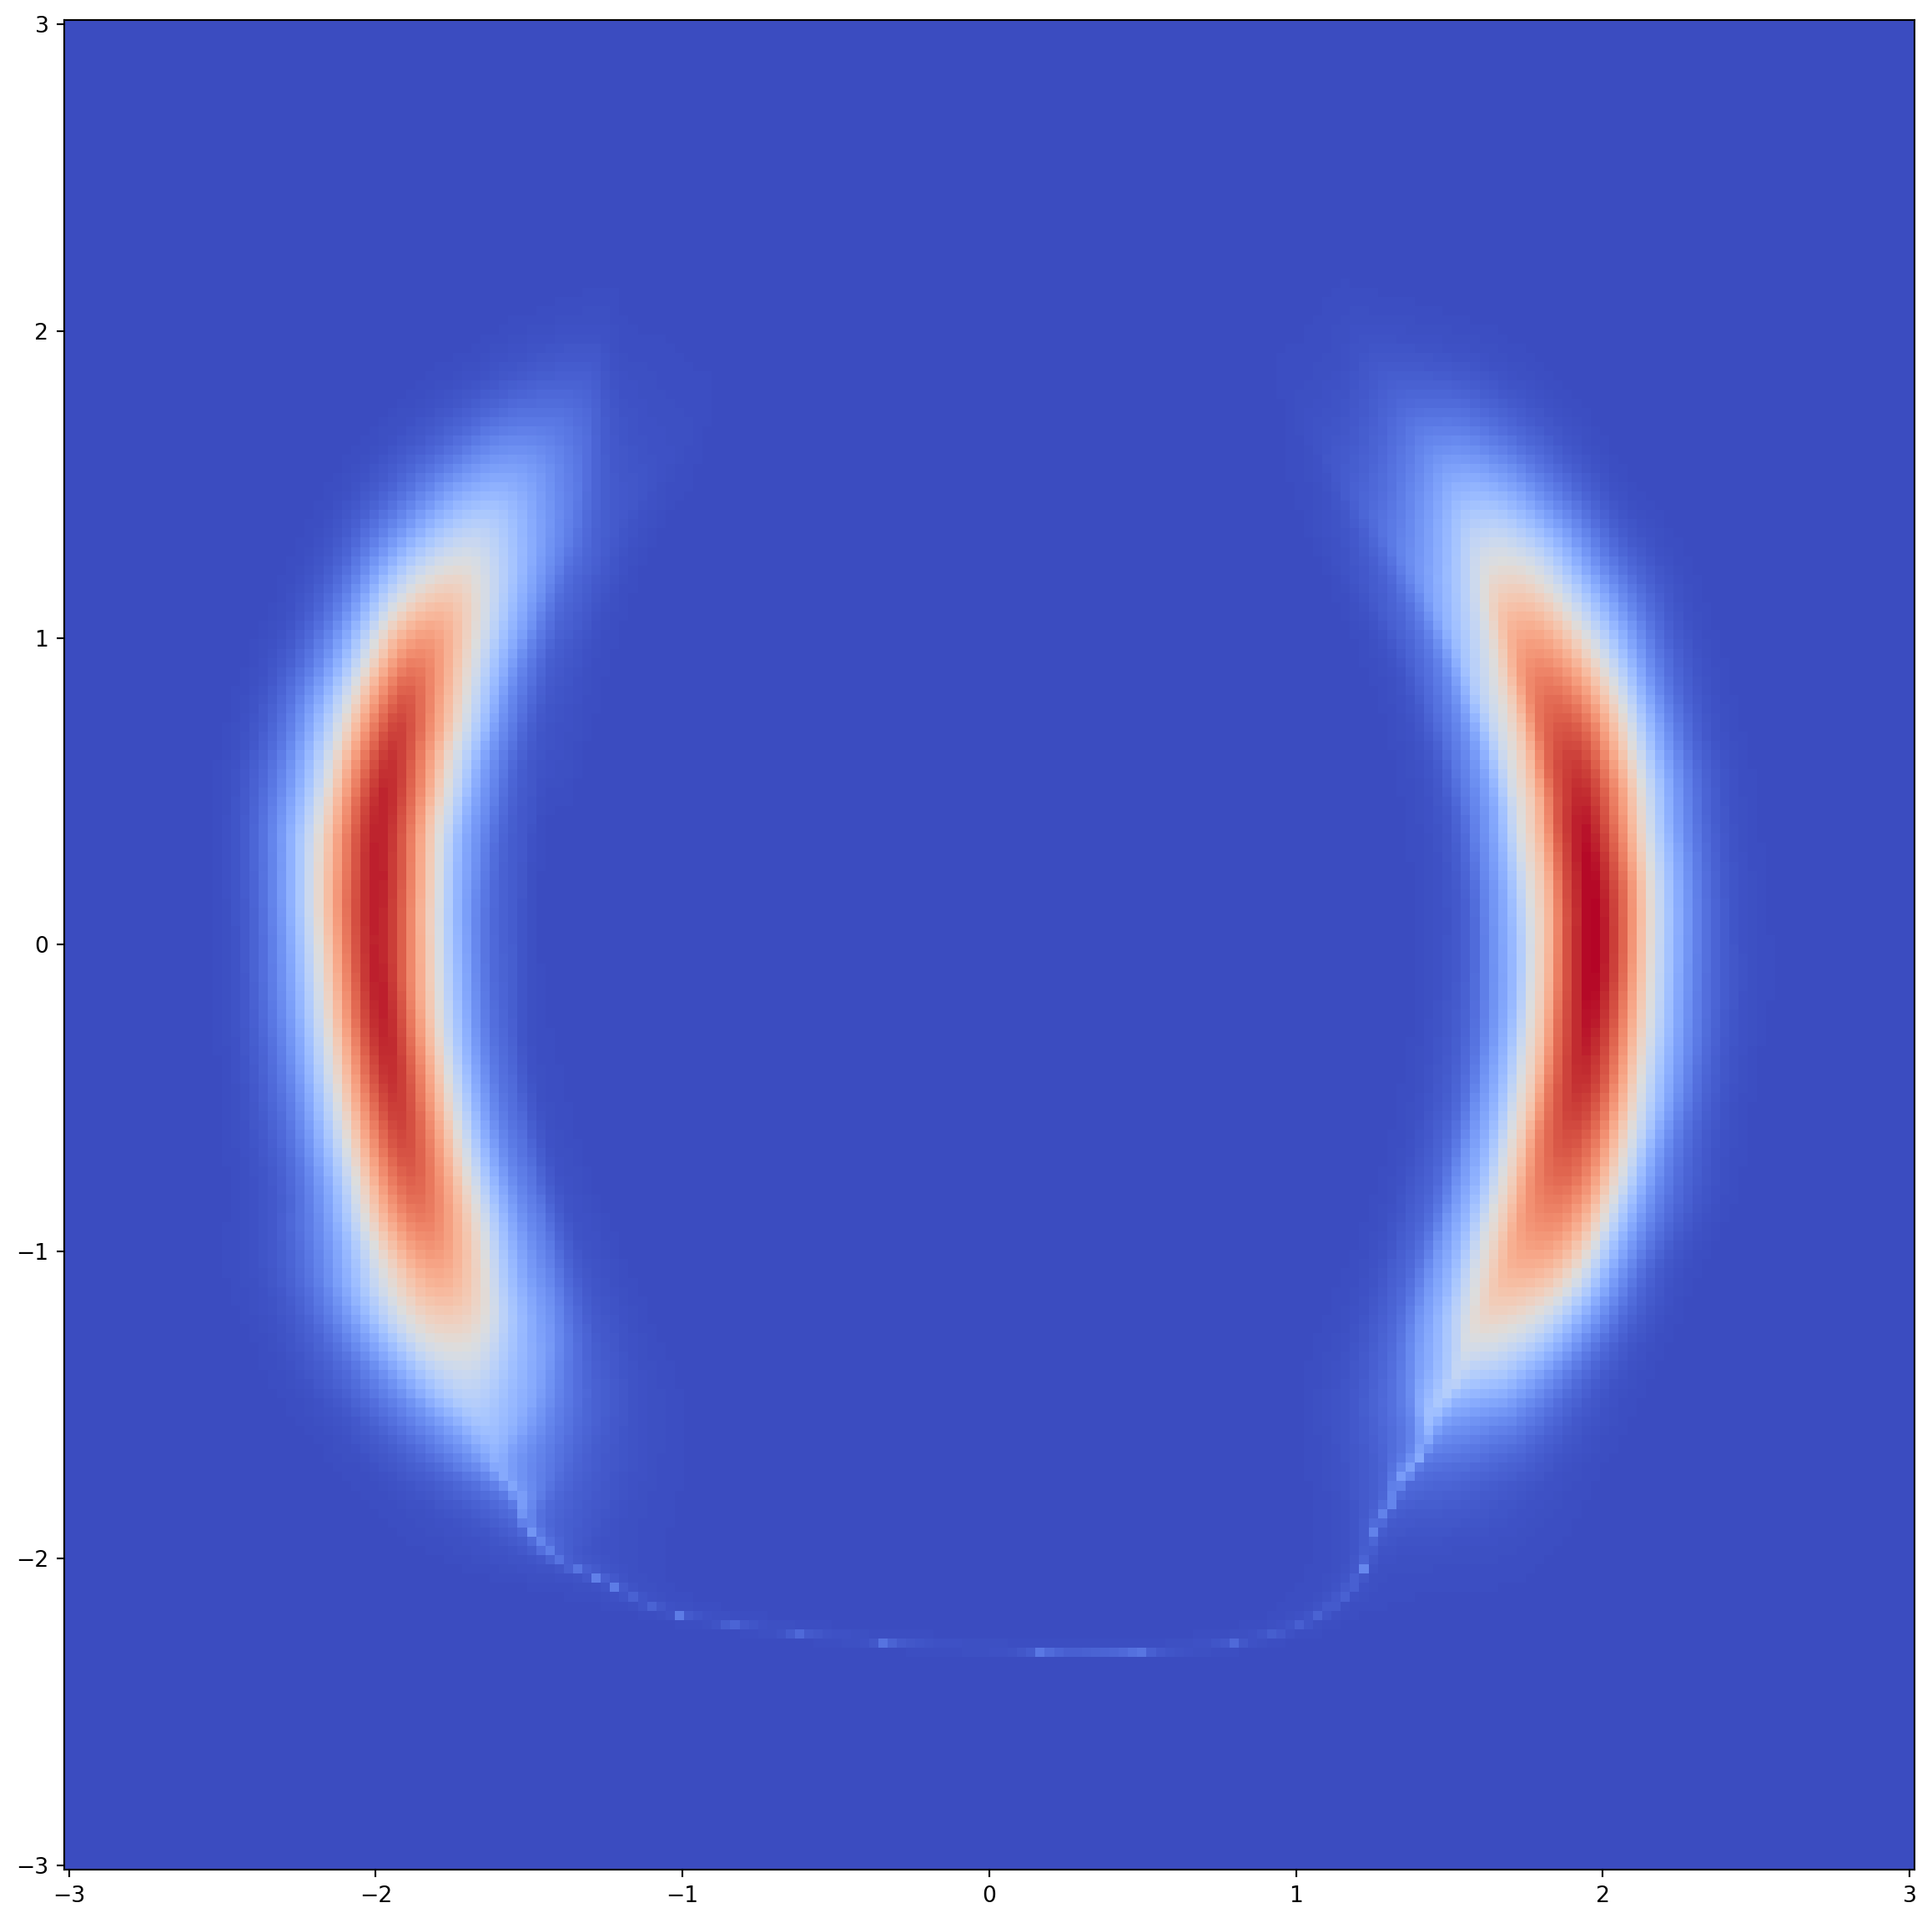

 88%|████████▊ | 3500/4000 [04:31<01:28,  5.68it/s]

 88%|████████▊ | 3502/4000 [04:31<01:12,  6.86it/s]

 88%|████████▊ | 3504/4000 [04:31<01:01,  8.03it/s]

 88%|████████▊ | 3506/4000 [04:32<00:54,  9.14it/s]

 88%|████████▊ | 3508/4000 [04:32<00:48, 10.08it/s]

 88%|████████▊ | 3510/4000 [04:32<00:44, 10.90it/s]

 88%|████████▊ | 3512/4000 [04:32<00:42, 11.58it/s]

 88%|████████▊ | 3514/4000 [04:32<00:40, 12.10it/s]

 88%|████████▊ | 3516/4000 [04:32<00:38, 12.47it/s]

 88%|████████▊ | 3518/4000 [04:33<00:37, 12.75it/s]

 88%|████████▊ | 3520/4000 [04:33<00:37, 12.94it/s]

 88%|████████▊ | 3522/4000 [04:33<00:36, 12.96it/s]

 88%|████████▊ | 3524/4000 [04:33<00:36, 13.08it/s]

 88%|████████▊ | 3526/4000 [04:33<00:36, 13.12it/s]

 88%|████████▊ | 3528/4000 [04:33<00:35, 13.18it/s]

 88%|████████▊ | 3530/4000 [04:33<00:35, 13.25it/s]

 88%|████████▊ | 3532/4000 [04:34<00:35, 13.26it/s]

 88%|████████▊ | 3534/4000 [04:34<00:35, 13.21it/s]

 88%|████████▊ | 3536/4000 [04:34<00:35, 13.19it/s]

 88%|████████▊ | 3538/4000 [04:34<00:34, 13.23it/s]

 88%|████████▊ | 3540/4000 [04:34<00:34, 13.28it/s]

 89%|████████▊ | 3542/4000 [04:34<00:34, 13.32it/s]

 89%|████████▊ | 3544/4000 [04:34<00:34, 13.19it/s]

 89%|████████▊ | 3546/4000 [04:35<00:34, 13.11it/s]

 89%|████████▊ | 3548/4000 [04:35<00:37, 11.91it/s]

 89%|████████▉ | 3550/4000 [04:35<00:37, 12.02it/s]

 89%|████████▉ | 3552/4000 [04:35<00:36, 12.32it/s]

 89%|████████▉ | 3554/4000 [04:35<00:35, 12.63it/s]

 89%|████████▉ | 3556/4000 [04:35<00:34, 12.87it/s]

 89%|████████▉ | 3558/4000 [04:36<00:33, 13.03it/s]

 89%|████████▉ | 3560/4000 [04:36<00:33, 13.15it/s]

 89%|████████▉ | 3562/4000 [04:36<00:33, 13.21it/s]

 89%|████████▉ | 3564/4000 [04:36<00:33, 13.19it/s]

 89%|████████▉ | 3566/4000 [04:36<00:32, 13.27it/s]

 89%|████████▉ | 3568/4000 [04:36<00:32, 13.31it/s]

 89%|████████▉ | 3570/4000 [04:37<00:32, 13.22it/s]

 89%|████████▉ | 3572/4000 [04:37<00:32, 13.23it/s]

 89%|████████▉ | 3574/4000 [04:37<00:34, 12.21it/s]

 89%|████████▉ | 3576/4000 [04:37<00:34, 12.46it/s]

 89%|████████▉ | 3578/4000 [04:37<00:33, 12.76it/s]

 90%|████████▉ | 3580/4000 [04:37<00:32, 12.93it/s]

 90%|████████▉ | 3582/4000 [04:37<00:31, 13.11it/s]

 90%|████████▉ | 3584/4000 [04:38<00:31, 13.18it/s]

 90%|████████▉ | 3586/4000 [04:38<00:31, 13.24it/s]

 90%|████████▉ | 3588/4000 [04:38<00:30, 13.32it/s]

 90%|████████▉ | 3590/4000 [04:38<00:30, 13.40it/s]

 90%|████████▉ | 3592/4000 [04:38<00:30, 13.46it/s]

 90%|████████▉ | 3594/4000 [04:38<00:30, 13.46it/s]

 90%|████████▉ | 3596/4000 [04:38<00:29, 13.49it/s]

 90%|████████▉ | 3598/4000 [04:39<00:29, 13.48it/s]

 90%|█████████ | 3600/4000 [04:39<00:30, 13.32it/s]

 90%|█████████ | 3602/4000 [04:39<00:30, 13.21it/s]

 90%|█████████ | 3604/4000 [04:39<00:29, 13.31it/s]

 90%|█████████ | 3606/4000 [04:39<00:31, 12.67it/s]

 90%|█████████ | 3608/4000 [04:39<00:30, 12.76it/s]

 90%|█████████ | 3610/4000 [04:40<00:30, 12.90it/s]

 90%|█████████ | 3612/4000 [04:40<00:29, 13.06it/s]

 90%|█████████ | 3614/4000 [04:40<00:29, 13.18it/s]

 90%|█████████ | 3616/4000 [04:40<00:28, 13.29it/s]

 90%|█████████ | 3618/4000 [04:40<00:28, 13.39it/s]

 90%|█████████ | 3620/4000 [04:40<00:28, 13.48it/s]

 91%|█████████ | 3622/4000 [04:40<00:28, 13.48it/s]

 91%|█████████ | 3624/4000 [04:41<00:27, 13.49it/s]

 91%|█████████ | 3626/4000 [04:41<00:27, 13.51it/s]

 91%|█████████ | 3628/4000 [04:41<00:27, 13.48it/s]

 91%|█████████ | 3630/4000 [04:41<00:27, 13.51it/s]

 91%|█████████ | 3632/4000 [04:41<00:27, 13.50it/s]

 91%|█████████ | 3634/4000 [04:41<00:27, 13.48it/s]

 91%|█████████ | 3636/4000 [04:41<00:26, 13.52it/s]

 91%|█████████ | 3638/4000 [04:42<00:26, 13.54it/s]

 91%|█████████ | 3640/4000 [04:42<00:26, 13.55it/s]

 91%|█████████ | 3642/4000 [04:42<00:26, 13.54it/s]

 91%|█████████ | 3644/4000 [04:42<00:26, 13.55it/s]

 91%|█████████ | 3646/4000 [04:42<00:26, 13.57it/s]

 91%|█████████ | 3648/4000 [04:42<00:25, 13.60it/s]

 91%|█████████▏| 3650/4000 [04:43<00:25, 13.57it/s]

 91%|█████████▏| 3652/4000 [04:43<00:25, 13.58it/s]

 91%|█████████▏| 3654/4000 [04:43<00:25, 13.58it/s]

 91%|█████████▏| 3656/4000 [04:43<00:25, 13.54it/s]

 91%|█████████▏| 3658/4000 [04:43<00:25, 13.57it/s]

 92%|█████████▏| 3660/4000 [04:43<00:25, 13.58it/s]

 92%|█████████▏| 3662/4000 [04:43<00:24, 13.60it/s]

 92%|█████████▏| 3664/4000 [04:44<00:24, 13.59it/s]

 92%|█████████▏| 3666/4000 [04:44<00:24, 13.57it/s]

 92%|█████████▏| 3668/4000 [04:44<00:24, 13.51it/s]

 92%|█████████▏| 3670/4000 [04:44<00:24, 13.51it/s]

 92%|█████████▏| 3672/4000 [04:44<00:24, 13.54it/s]

 92%|█████████▏| 3674/4000 [04:44<00:24, 13.54it/s]

 92%|█████████▏| 3676/4000 [04:44<00:23, 13.55it/s]

 92%|█████████▏| 3678/4000 [04:45<00:23, 13.55it/s]

 92%|█████████▏| 3680/4000 [04:45<00:23, 13.53it/s]

 92%|█████████▏| 3682/4000 [04:45<00:23, 13.55it/s]

 92%|█████████▏| 3684/4000 [04:45<00:23, 13.54it/s]

 92%|█████████▏| 3686/4000 [04:45<00:23, 13.56it/s]

 92%|█████████▏| 3688/4000 [04:45<00:22, 13.57it/s]

 92%|█████████▏| 3690/4000 [04:45<00:22, 13.54it/s]

 92%|█████████▏| 3692/4000 [04:46<00:22, 13.56it/s]

 92%|█████████▏| 3694/4000 [04:46<00:22, 13.53it/s]

 92%|█████████▏| 3696/4000 [04:46<00:22, 13.50it/s]

 92%|█████████▏| 3698/4000 [04:46<00:22, 13.55it/s]

 92%|█████████▎| 3700/4000 [04:46<00:22, 13.43it/s]

 93%|█████████▎| 3702/4000 [04:46<00:22, 13.41it/s]

 93%|█████████▎| 3704/4000 [04:47<00:22, 13.34it/s]

 93%|█████████▎| 3706/4000 [04:47<00:25, 11.74it/s]

 93%|█████████▎| 3708/4000 [04:47<00:24, 12.08it/s]

 93%|█████████▎| 3710/4000 [04:47<00:23, 12.36it/s]

 93%|█████████▎| 3712/4000 [04:47<00:22, 12.61it/s]

 93%|█████████▎| 3714/4000 [04:47<00:22, 12.82it/s]

 93%|█████████▎| 3716/4000 [04:47<00:21, 12.92it/s]

 93%|█████████▎| 3718/4000 [04:48<00:21, 13.03it/s]

 93%|█████████▎| 3720/4000 [04:48<00:21, 13.08it/s]

 93%|█████████▎| 3722/4000 [04:48<00:21, 13.17it/s]

 93%|█████████▎| 3724/4000 [04:48<00:20, 13.25it/s]

 93%|█████████▎| 3726/4000 [04:48<00:20, 13.30it/s]

 93%|█████████▎| 3728/4000 [04:48<00:20, 13.30it/s]

 93%|█████████▎| 3730/4000 [04:49<00:20, 13.33it/s]

 93%|█████████▎| 3732/4000 [04:49<00:20, 13.33it/s]

 93%|█████████▎| 3734/4000 [04:49<00:19, 13.35it/s]

 93%|█████████▎| 3736/4000 [04:49<00:19, 13.38it/s]

 93%|█████████▎| 3738/4000 [04:49<00:19, 13.39it/s]

 94%|█████████▎| 3740/4000 [04:49<00:19, 13.39it/s]

 94%|█████████▎| 3742/4000 [04:49<00:19, 13.39it/s]

 94%|█████████▎| 3744/4000 [04:50<00:19, 13.42it/s]

 94%|█████████▎| 3746/4000 [04:50<00:18, 13.41it/s]

 94%|█████████▎| 3748/4000 [04:50<00:18, 13.41it/s]

 94%|█████████▍| 3750/4000 [04:50<00:18, 13.37it/s]

 94%|█████████▍| 3752/4000 [04:50<00:18, 13.40it/s]

 94%|█████████▍| 3754/4000 [04:50<00:18, 13.40it/s]

 94%|█████████▍| 3756/4000 [04:50<00:18, 13.46it/s]

 94%|█████████▍| 3758/4000 [04:51<00:18, 13.44it/s]

 94%|█████████▍| 3760/4000 [04:51<00:17, 13.39it/s]

 94%|█████████▍| 3762/4000 [04:51<00:17, 13.41it/s]

 94%|█████████▍| 3764/4000 [04:51<00:18, 13.10it/s]

 94%|█████████▍| 3766/4000 [04:51<00:17, 13.14it/s]

 94%|█████████▍| 3768/4000 [04:51<00:17, 13.16it/s]

 94%|█████████▍| 3770/4000 [04:52<00:17, 13.08it/s]

 94%|█████████▍| 3772/4000 [04:52<00:17, 13.05it/s]

 94%|█████████▍| 3774/4000 [04:52<00:17, 13.14it/s]

 94%|█████████▍| 3776/4000 [04:52<00:16, 13.19it/s]

 94%|█████████▍| 3778/4000 [04:52<00:16, 13.16it/s]

 94%|█████████▍| 3780/4000 [04:52<00:16, 13.22it/s]

 95%|█████████▍| 3782/4000 [04:52<00:16, 13.27it/s]

 95%|█████████▍| 3784/4000 [04:53<00:16, 13.31it/s]

 95%|█████████▍| 3786/4000 [04:53<00:16, 13.31it/s]

 95%|█████████▍| 3788/4000 [04:53<00:15, 13.33it/s]

 95%|█████████▍| 3790/4000 [04:53<00:16, 12.51it/s]

 95%|█████████▍| 3792/4000 [04:53<00:16, 12.74it/s]

 95%|█████████▍| 3794/4000 [04:53<00:15, 12.94it/s]

 95%|█████████▍| 3796/4000 [04:54<00:18, 10.80it/s]

 95%|█████████▍| 3798/4000 [04:54<00:17, 11.41it/s]

 95%|█████████▌| 3800/4000 [04:54<00:16, 11.94it/s]

 95%|█████████▌| 3802/4000 [04:54<00:16, 12.34it/s]

 95%|█████████▌| 3804/4000 [04:54<00:15, 12.56it/s]

 95%|█████████▌| 3806/4000 [04:54<00:15, 12.81it/s]

 95%|█████████▌| 3808/4000 [04:55<00:14, 13.02it/s]

 95%|█████████▌| 3810/4000 [04:55<00:14, 13.14it/s]

 95%|█████████▌| 3812/4000 [04:55<00:14, 13.19it/s]

 95%|█████████▌| 3814/4000 [04:55<00:14, 13.22it/s]

 95%|█████████▌| 3816/4000 [04:55<00:13, 13.27it/s]

 95%|█████████▌| 3818/4000 [04:55<00:13, 13.28it/s]

 96%|█████████▌| 3820/4000 [04:55<00:13, 13.30it/s]

 96%|█████████▌| 3822/4000 [04:56<00:13, 13.36it/s]

 96%|█████████▌| 3824/4000 [04:56<00:13, 13.37it/s]

 96%|█████████▌| 3826/4000 [04:56<00:12, 13.39it/s]

 96%|█████████▌| 3828/4000 [04:56<00:12, 13.41it/s]

 96%|█████████▌| 3830/4000 [04:56<00:12, 13.42it/s]

 96%|█████████▌| 3832/4000 [04:56<00:12, 13.44it/s]

 96%|█████████▌| 3834/4000 [04:56<00:12, 13.44it/s]

 96%|█████████▌| 3836/4000 [04:57<00:12, 13.40it/s]

 96%|█████████▌| 3838/4000 [04:57<00:12, 13.36it/s]

 96%|█████████▌| 3840/4000 [04:57<00:11, 13.39it/s]

 96%|█████████▌| 3842/4000 [04:57<00:11, 13.38it/s]

 96%|█████████▌| 3844/4000 [04:57<00:11, 13.36it/s]

 96%|█████████▌| 3846/4000 [04:57<00:11, 13.40it/s]

 96%|█████████▌| 3848/4000 [04:58<00:11, 13.40it/s]

 96%|█████████▋| 3850/4000 [04:58<00:11, 13.38it/s]

 96%|█████████▋| 3852/4000 [04:58<00:11, 13.38it/s]

 96%|█████████▋| 3854/4000 [04:58<00:10, 13.39it/s]

 96%|█████████▋| 3856/4000 [04:58<00:10, 13.41it/s]

 96%|█████████▋| 3858/4000 [04:58<00:10, 13.42it/s]

 96%|█████████▋| 3860/4000 [04:58<00:10, 13.39it/s]

 97%|█████████▋| 3862/4000 [04:59<00:10, 13.37it/s]

 97%|█████████▋| 3864/4000 [04:59<00:10, 13.35it/s]

 97%|█████████▋| 3866/4000 [04:59<00:10, 13.37it/s]

 97%|█████████▋| 3868/4000 [04:59<00:09, 13.39it/s]

 97%|█████████▋| 3870/4000 [04:59<00:09, 13.23it/s]

 97%|█████████▋| 3872/4000 [04:59<00:09, 13.25it/s]

 97%|█████████▋| 3874/4000 [04:59<00:09, 13.28it/s]

 97%|█████████▋| 3876/4000 [05:00<00:09, 13.36it/s]

 97%|█████████▋| 3878/4000 [05:00<00:09, 13.32it/s]

 97%|█████████▋| 3880/4000 [05:00<00:08, 13.35it/s]

 97%|█████████▋| 3882/4000 [05:00<00:08, 13.36it/s]

 97%|█████████▋| 3884/4000 [05:00<00:08, 13.25it/s]

 97%|█████████▋| 3886/4000 [05:00<00:08, 13.23it/s]

 97%|█████████▋| 3888/4000 [05:01<00:08, 13.31it/s]

 97%|█████████▋| 3890/4000 [05:01<00:08, 13.35it/s]

 97%|█████████▋| 3892/4000 [05:01<00:08, 13.41it/s]

 97%|█████████▋| 3894/4000 [05:01<00:07, 13.43it/s]

 97%|█████████▋| 3896/4000 [05:01<00:07, 13.46it/s]

 97%|█████████▋| 3898/4000 [05:01<00:07, 13.44it/s]

 98%|█████████▊| 3900/4000 [05:01<00:07, 13.45it/s]

 98%|█████████▊| 3902/4000 [05:02<00:07, 13.46it/s]

 98%|█████████▊| 3904/4000 [05:02<00:07, 13.45it/s]

 98%|█████████▊| 3906/4000 [05:02<00:06, 13.46it/s]

 98%|█████████▊| 3908/4000 [05:02<00:06, 13.39it/s]

 98%|█████████▊| 3910/4000 [05:02<00:06, 13.40it/s]

 98%|█████████▊| 3912/4000 [05:02<00:06, 13.35it/s]

 98%|█████████▊| 3914/4000 [05:02<00:06, 13.38it/s]

 98%|█████████▊| 3916/4000 [05:03<00:06, 13.38it/s]

 98%|█████████▊| 3918/4000 [05:03<00:06, 13.39it/s]

 98%|█████████▊| 3920/4000 [05:03<00:05, 13.44it/s]

 98%|█████████▊| 3922/4000 [05:03<00:05, 13.44it/s]

 98%|█████████▊| 3924/4000 [05:03<00:05, 13.44it/s]

 98%|█████████▊| 3926/4000 [05:03<00:05, 13.43it/s]

 98%|█████████▊| 3928/4000 [05:04<00:05, 13.46it/s]

 98%|█████████▊| 3930/4000 [05:04<00:05, 13.47it/s]

 98%|█████████▊| 3932/4000 [05:04<00:05, 13.47it/s]

 98%|█████████▊| 3934/4000 [05:04<00:04, 13.43it/s]

 98%|█████████▊| 3936/4000 [05:04<00:04, 13.40it/s]

 98%|█████████▊| 3938/4000 [05:04<00:04, 13.40it/s]

 98%|█████████▊| 3940/4000 [05:04<00:04, 13.39it/s]

 99%|█████████▊| 3942/4000 [05:05<00:04, 13.36it/s]

 99%|█████████▊| 3944/4000 [05:05<00:04, 13.34it/s]

 99%|█████████▊| 3946/4000 [05:05<00:04, 13.35it/s]

 99%|█████████▊| 3948/4000 [05:05<00:03, 13.30it/s]

 99%|█████████▉| 3950/4000 [05:05<00:03, 13.30it/s]

 99%|█████████▉| 3952/4000 [05:05<00:03, 13.35it/s]

 99%|█████████▉| 3954/4000 [05:05<00:03, 13.36it/s]

 99%|█████████▉| 3956/4000 [05:06<00:03, 13.23it/s]

 99%|█████████▉| 3958/4000 [05:06<00:03, 13.27it/s]

 99%|█████████▉| 3960/4000 [05:06<00:02, 13.34it/s]

 99%|█████████▉| 3962/4000 [05:06<00:02, 13.39it/s]

 99%|█████████▉| 3964/4000 [05:06<00:02, 13.43it/s]

 99%|█████████▉| 3966/4000 [05:06<00:02, 13.44it/s]

 99%|█████████▉| 3968/4000 [05:07<00:02, 13.44it/s]

 99%|█████████▉| 3970/4000 [05:07<00:02, 13.46it/s]

 99%|█████████▉| 3972/4000 [05:07<00:02, 13.48it/s]

 99%|█████████▉| 3974/4000 [05:07<00:01, 13.51it/s]

 99%|█████████▉| 3976/4000 [05:07<00:01, 13.49it/s]

 99%|█████████▉| 3978/4000 [05:07<00:01, 13.46it/s]

100%|█████████▉| 3980/4000 [05:07<00:01, 13.48it/s]

100%|█████████▉| 3982/4000 [05:08<00:01, 13.47it/s]

100%|█████████▉| 3984/4000 [05:08<00:01, 13.48it/s]

100%|█████████▉| 3986/4000 [05:08<00:01, 13.50it/s]

100%|█████████▉| 3988/4000 [05:08<00:00, 13.48it/s]

100%|█████████▉| 3990/4000 [05:08<00:00, 13.47it/s]

100%|█████████▉| 3992/4000 [05:08<00:00, 13.45it/s]

100%|█████████▉| 3994/4000 [05:08<00:00, 13.44it/s]

100%|█████████▉| 3996/4000 [05:09<00:00, 13.40it/s]

100%|█████████▉| 3998/4000 [05:09<00:00, 13.43it/s]

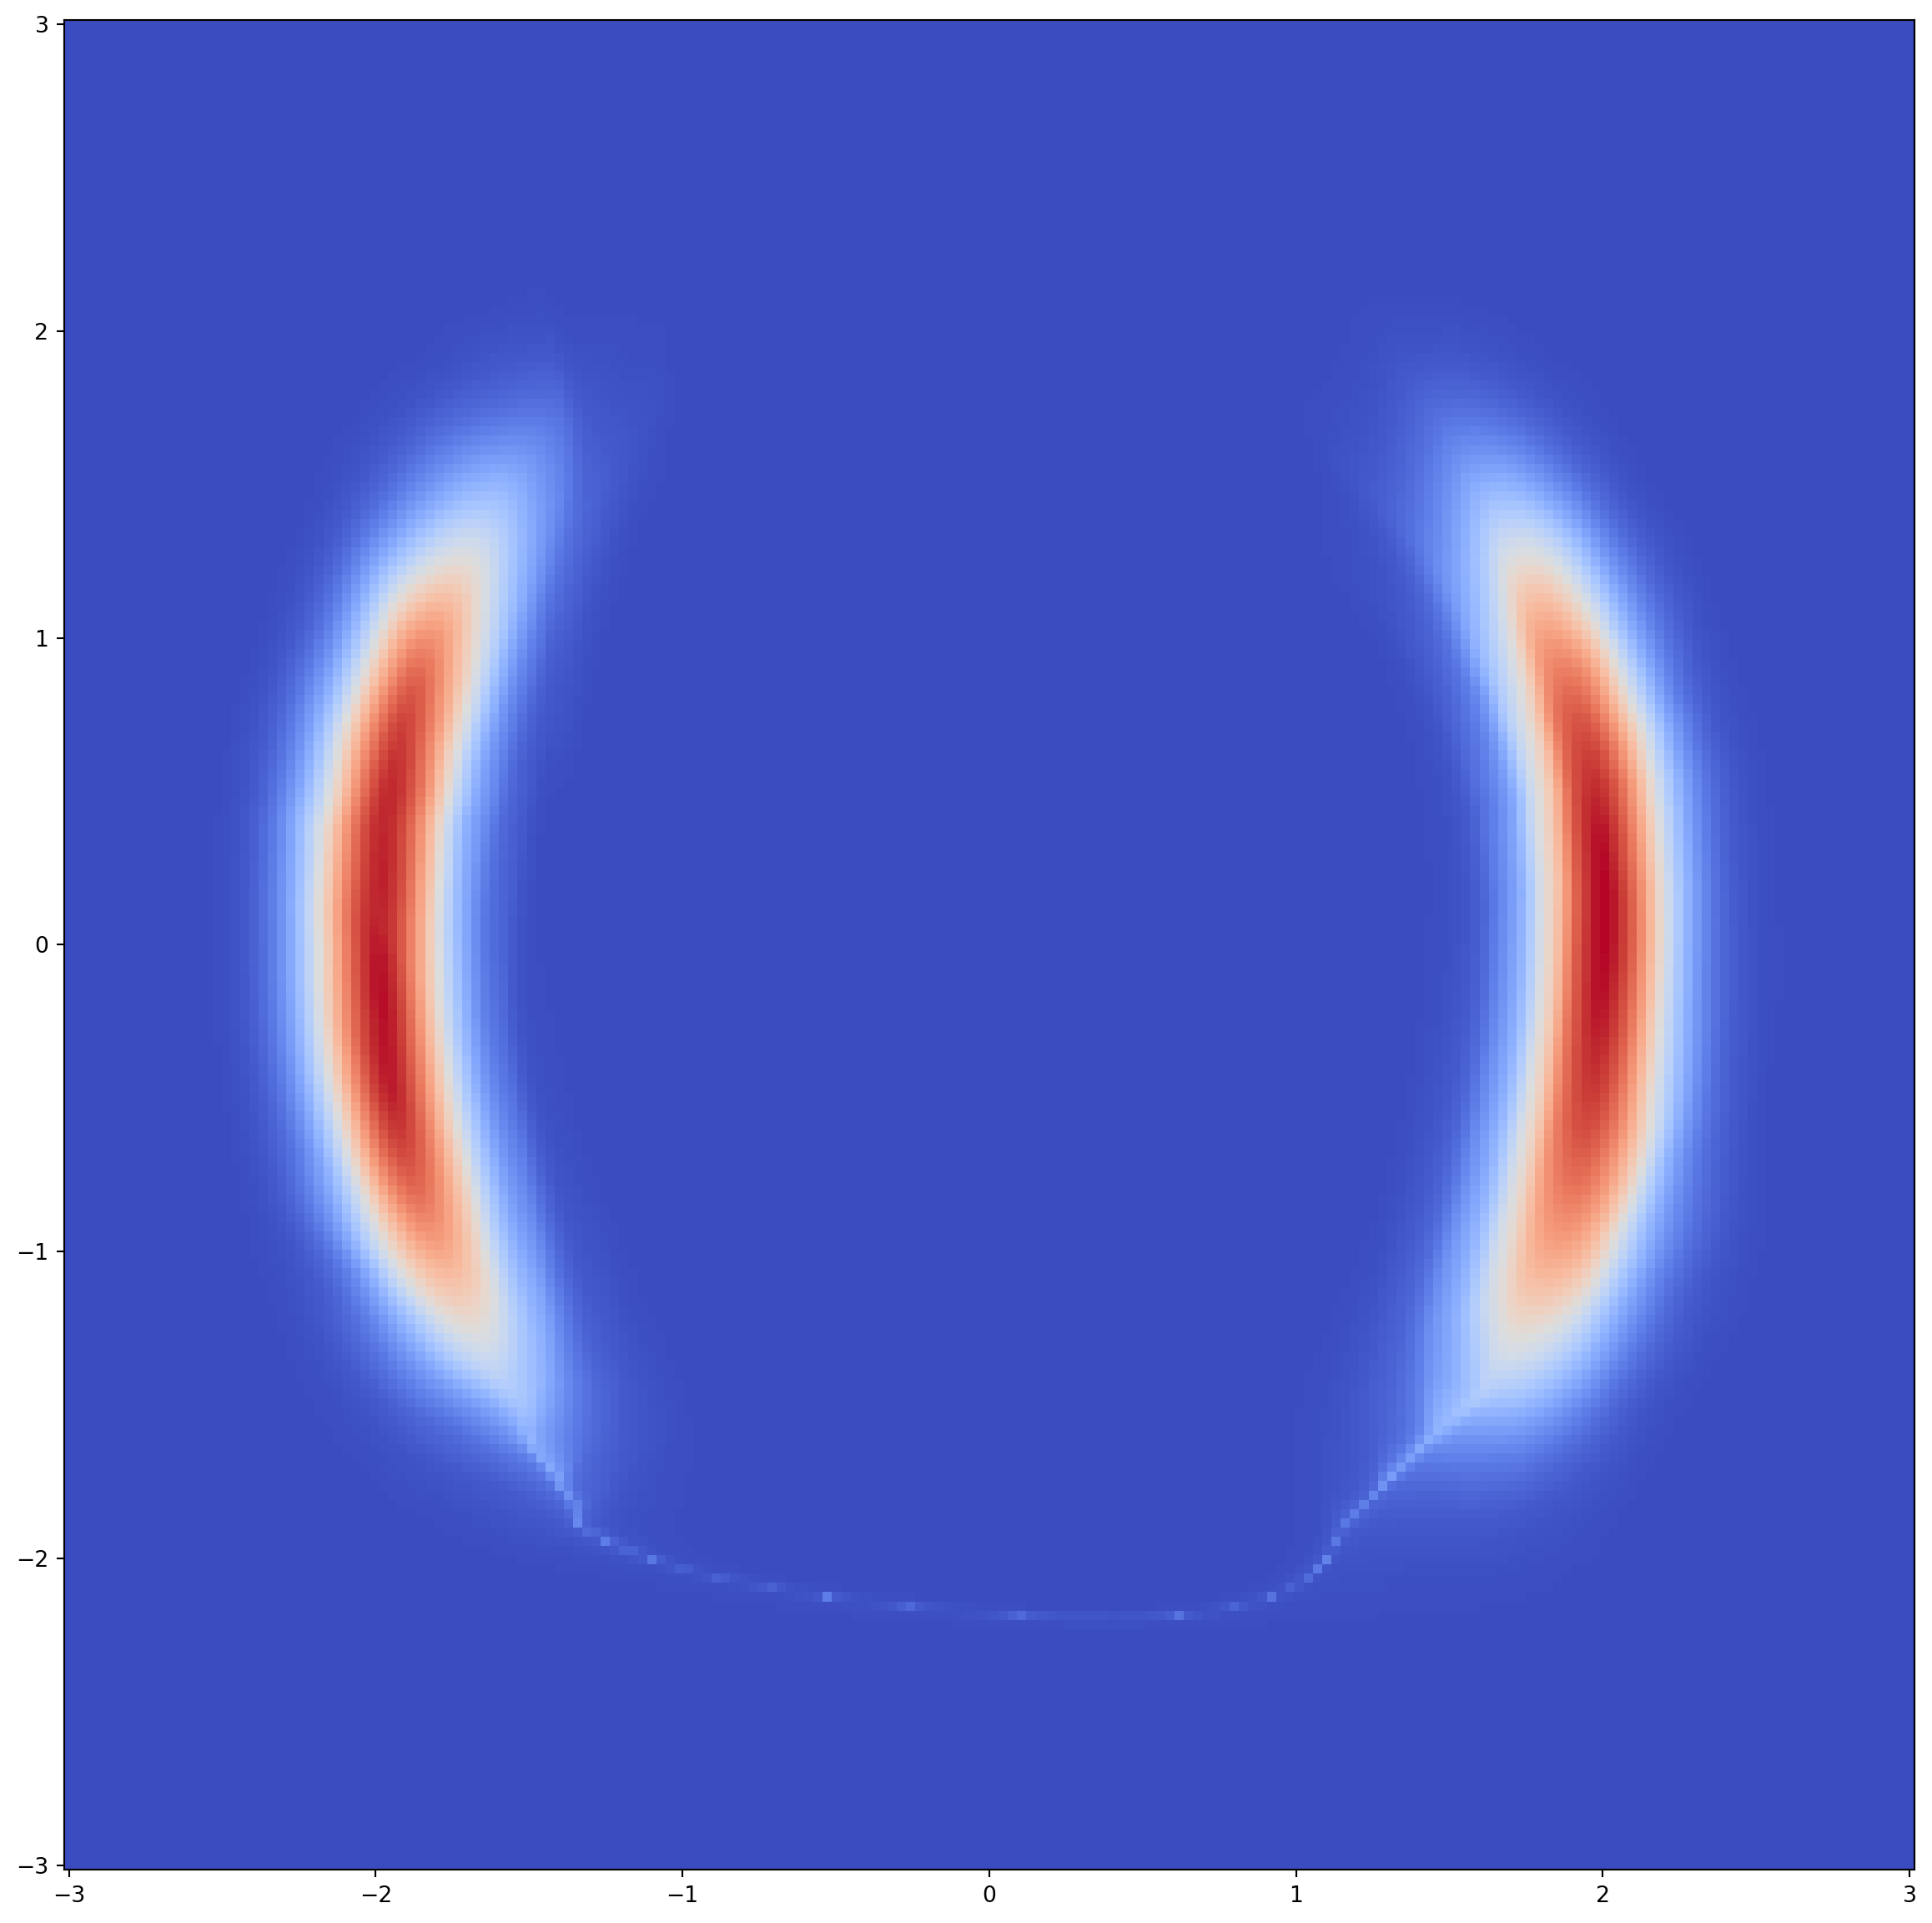

100%|██████████| 4000/4000 [05:10<00:00,  5.73it/s]

100%|██████████| 4000/4000 [05:10<00:00, 12.90it/s]

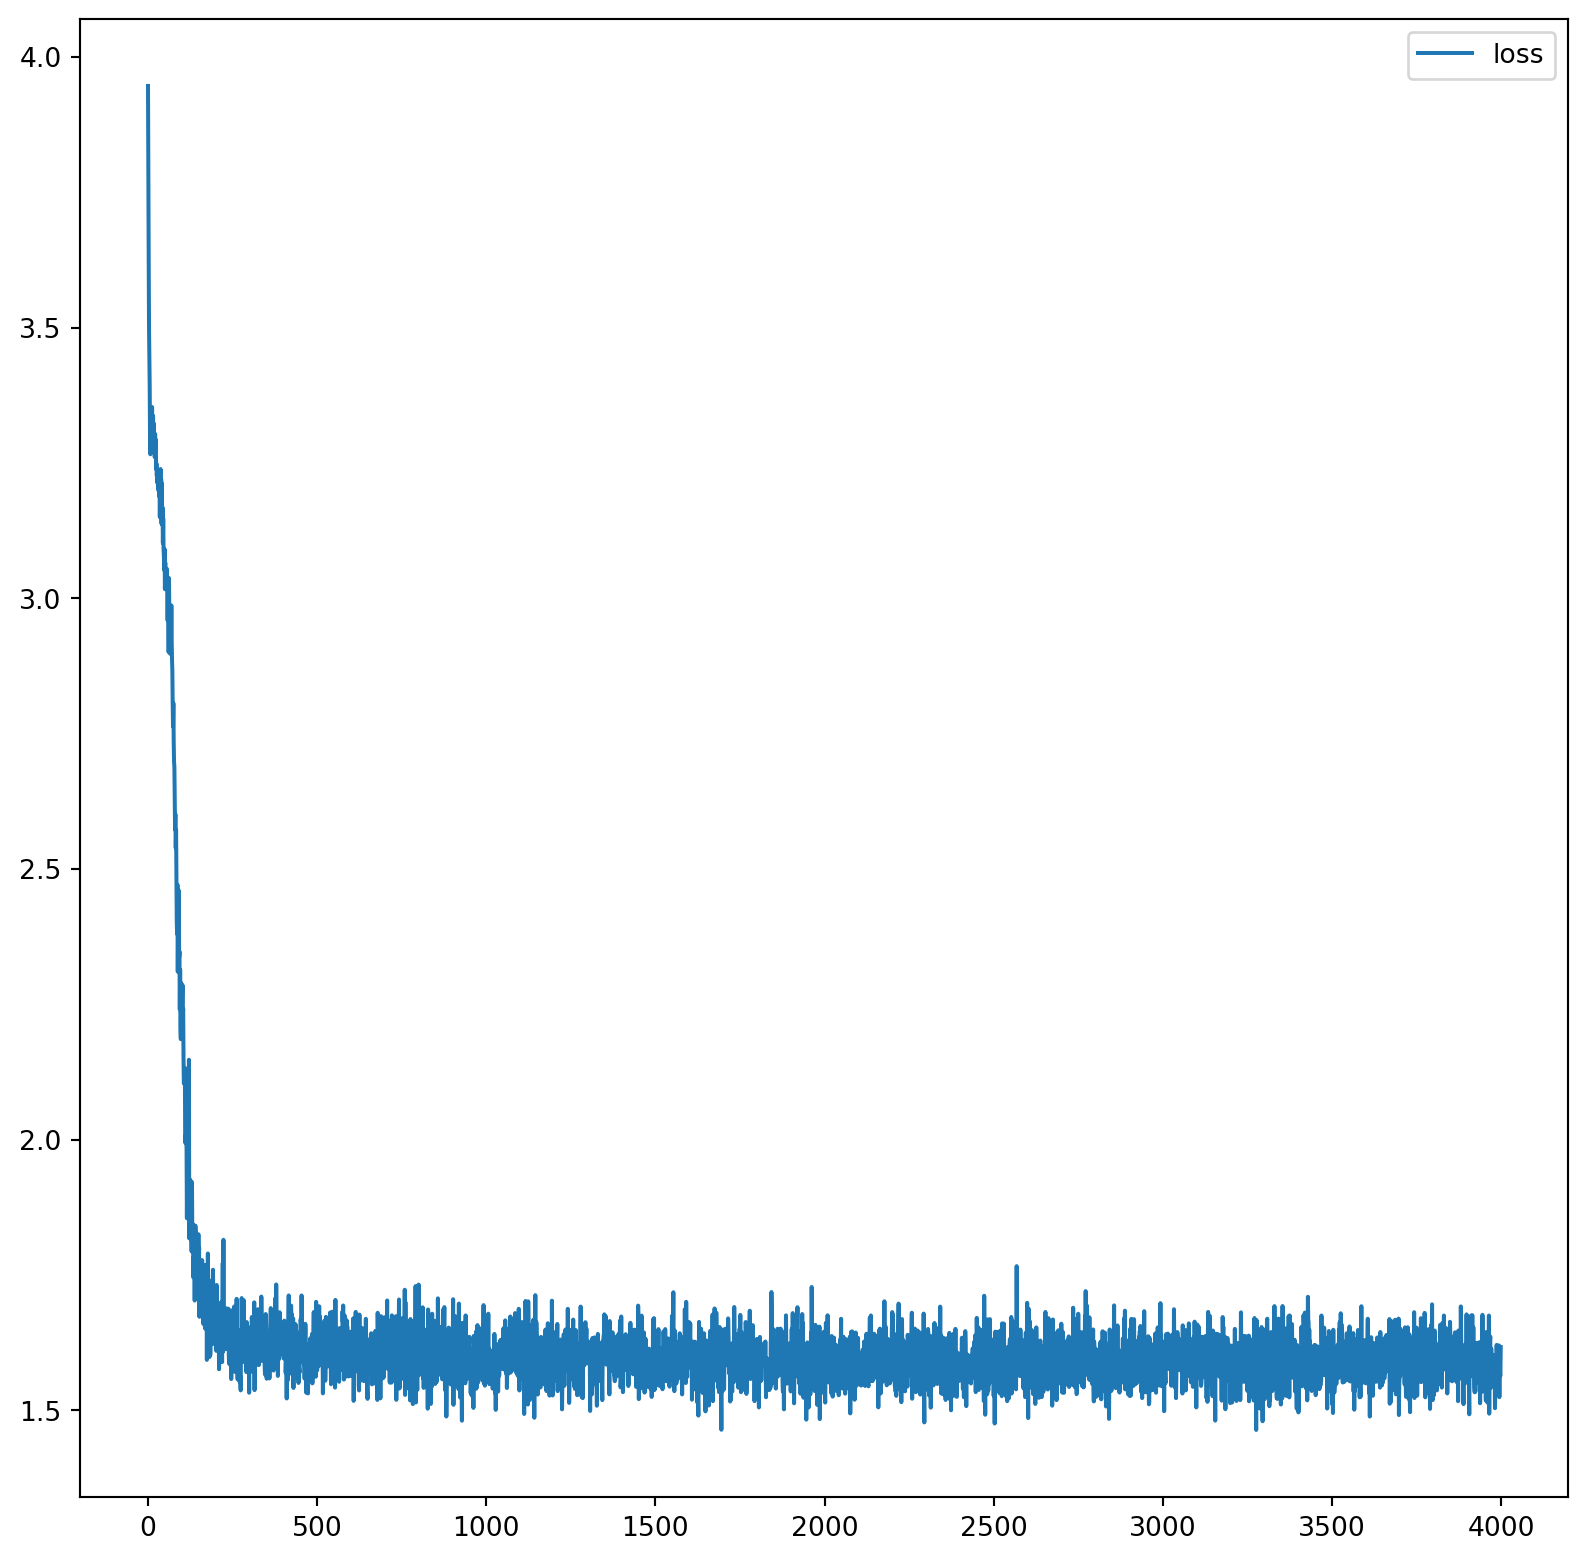

In [7]:
#| layout-ncol: 4
#| layout-nrow: 2
# Train model
max_iter = 4000
num_samples = 2 ** 9
show_iter = 500


loss_hist = np.array([])

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

for it in tqdm(range(max_iter)):
    optimizer.zero_grad()
    
    # Get training samples
    x = target.sample(num_samples).to(device)
    
    # Compute loss
    loss = model.forward_kld(x)
    
    # Do backprop and optimizer step
    if ~(torch.isnan(loss) | torch.isinf(loss)):
        loss.backward()
        optimizer.step()
    
    # Log loss
    loss_hist = np.append(loss_hist, loss.to('cpu').data.numpy())
    
    # Plot learned distribution
    if (it + 1) % show_iter == 0:
        model.eval()
        log_prob = model.log_prob(zz)
        model.train()
        prob = torch.exp(log_prob.to('cpu').view(*xx.shape))
        prob[torch.isnan(prob)] = 0

        plt.figure(figsize=(15, 15))
        plt.pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')
        plt.gca().set_aspect('equal', 'box')
        plt.show()

# Plot loss
plt.figure(figsize=(10, 10))
plt.plot(loss_hist, label='loss')
plt.legend()
plt.show()

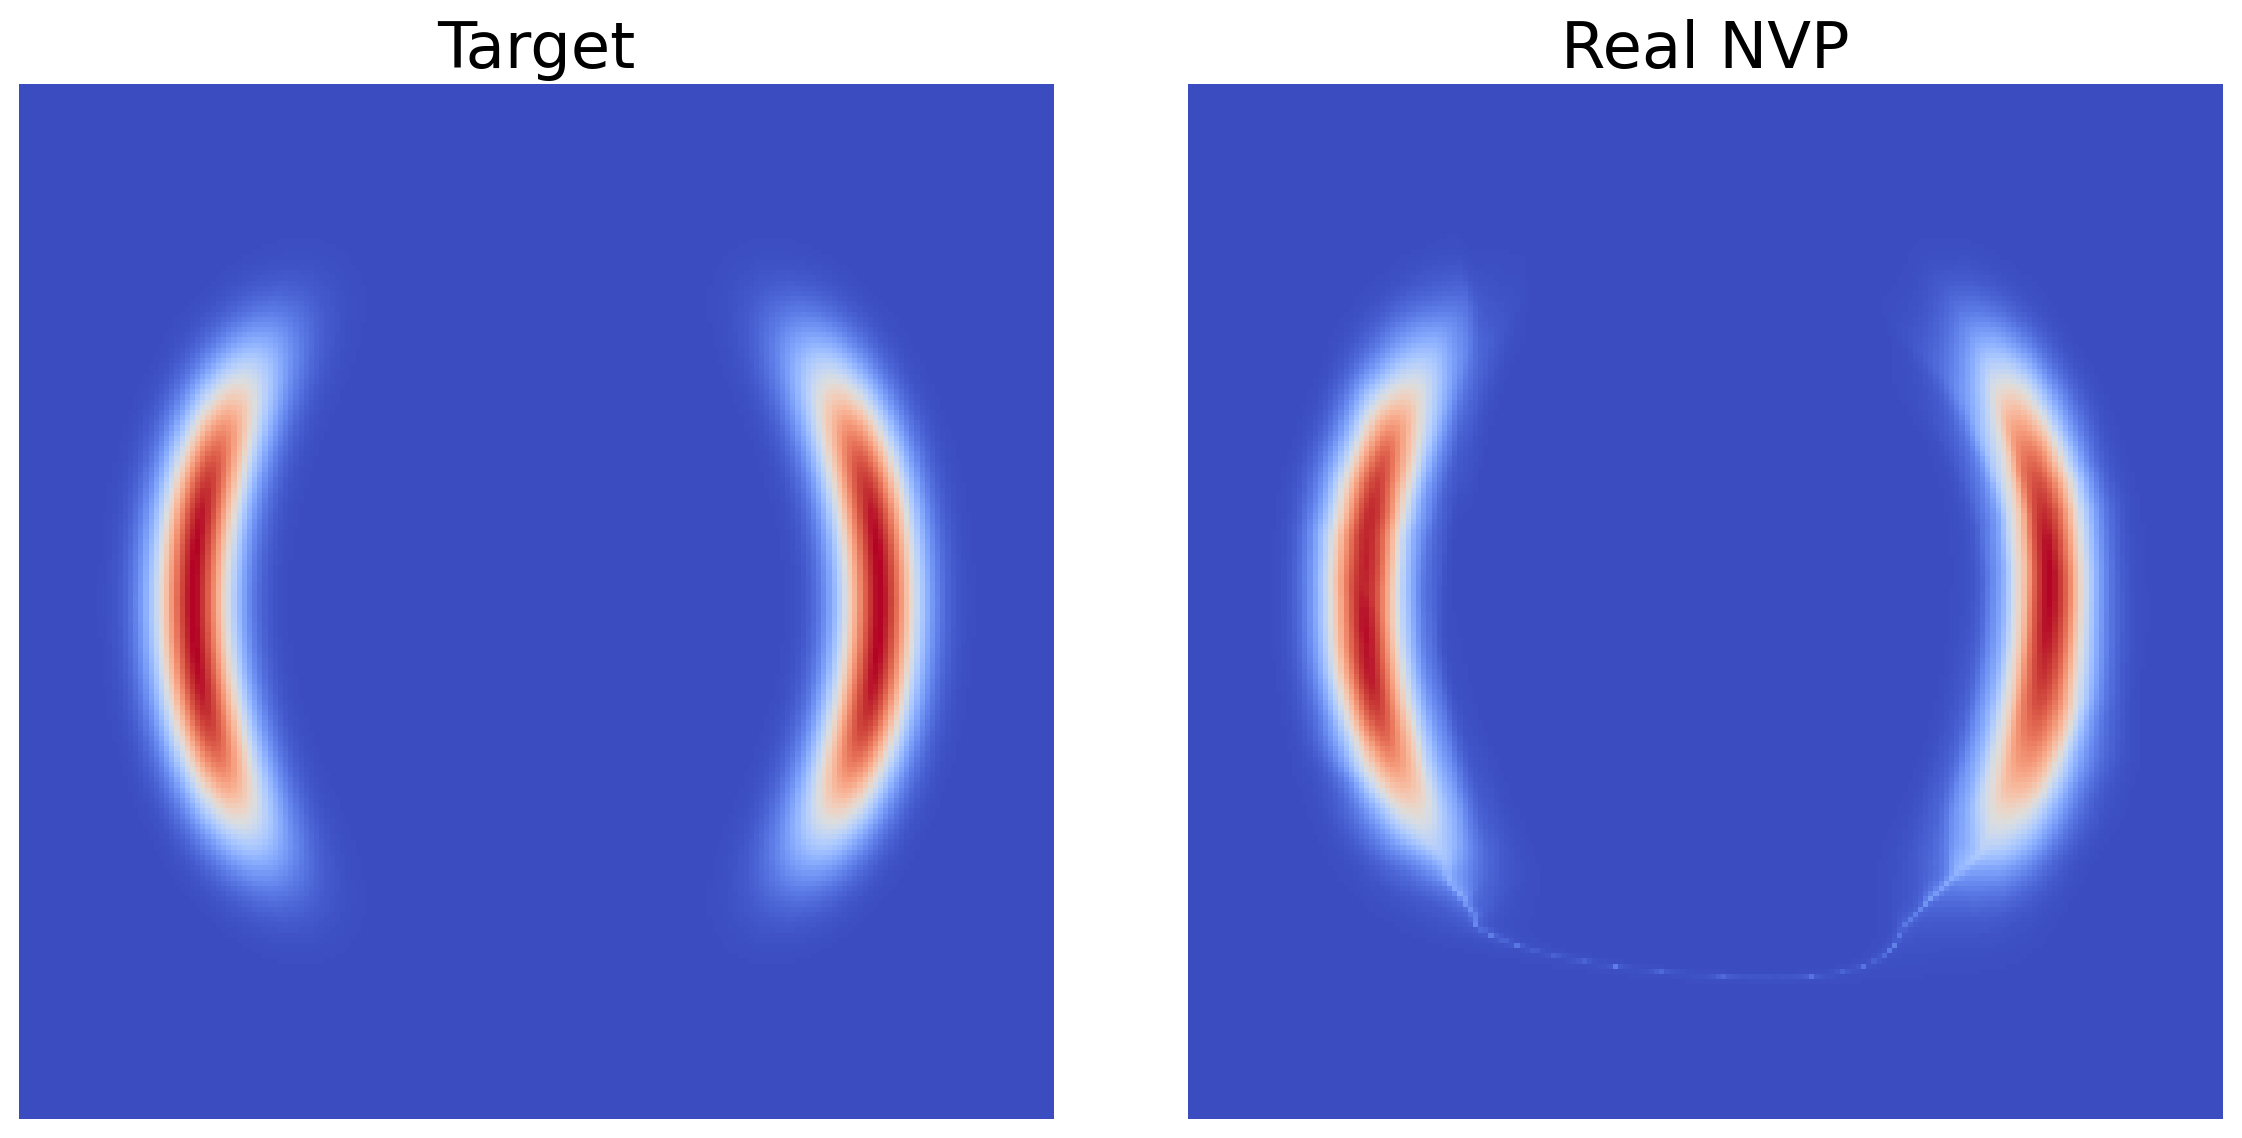

In [8]:
# Plot target distribution
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 7))

log_prob = target.log_prob(zz).to('cpu').view(*xx.shape)
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

ax[0].pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')

ax[0].set_aspect('equal', 'box')
ax[0].set_axis_off()
ax[0].set_title('Target', fontsize=24)

# Plot learned distribution
model.eval()
log_prob = model.log_prob(zz).to('cpu').view(*xx.shape)
model.train()
prob = torch.exp(log_prob)
prob[torch.isnan(prob)] = 0

ax[1].pcolormesh(xx, yy, prob.data.numpy(), cmap='coolwarm')

ax[1].set_aspect('equal', 'box')
ax[1].set_axis_off()
ax[1].set_title('Real NVP', fontsize=24)
# plt.savefig("./Files/NF2.png")
plt.subplots_adjust(wspace=0.1)
plt.show()